In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./CWC23_all_innings.csv")

In [3]:
df.describe()

bb_bf         runs        wkts  wicketball_prob  runs_per_ball  \
count  1408.000000  1408.000000  562.000000      1408.000000    1408.000000   
mean     35.305398    33.237216    1.204626         0.070574       0.898755   
std      25.248709    28.056329    1.198237         0.152535       0.471051   
min       0.000000     0.000000    0.000000         0.000000       0.000000   
25%      13.750000    11.000000    0.000000         0.010724       0.621350   
50%      32.000000    29.000000    1.000000         0.032258       0.879005   
75%      54.000000    49.000000    2.000000         0.062500       1.130819   
max     143.000000   201.000000    7.000000         1.000000       6.000000   

            overs        mdns        econ         inns          4s  \
count  562.000000  562.000000  562.000000  1408.000000  846.000000   
mean     7.342527    0.256228    5.946637     1.470881    2.605201   
std      2.679736    0.532547    2.141566     0.499329    3.146922   
min      0.300000    0.000000    1.350000     1.000000    0.000000   
25%      5.550000    0.000000    4.500000     1.000000    0.000000   
50%      8.000000    0.000000    5.675000     1.000000    2.000000   
75%     10.000000    0.000000    7.120000     2.000000    4.000000   
max     10.000000    3.000000   16.000000     2.000000   21.000000   

               6s          sr     not_out        mins  
count  846.000000  846.000000  846.000000  846.000000  
mean     0.751773   83.716596    0.151300   42.721040  
std      1.504184   52.475444    0.358553   41.576908  
min      0.000000    0.000000    0.000000    1.000000  
25%      0.000000   51.610000    0.000000   12.000000  
50%      0.000000   81.810000    0.000000   28.000000  
75%      1.000000  107.020000    0.000000   60.000000  
max     11.000000  600.000000    1.000000  217.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
df.head()

team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 NaN NaN NaN      NaN   NaN  
2   10.0   1.0   4.8     1 NaN NaN NaN      NaN   NaN  
3   10.0   0.0   4.9     1 NaN NaN NaN      NaN   NaN  
4   10.0   0.0   4.9     1 NaN NaN NaN      NaN   NaN

In [6]:
team_performance = df.groupby('team').agg({
    'runs': ['sum', 'mean'],
    'wkts': ['sum', 'mean'],
    'bb_bf': ['sum', 'mean'],
})

# Analyze runs scored, wickets taken, and batting/bowling styles
# (assuming 'bat_or_bowl' indicates style)
batting_teams = df[df['bat_or_bowl'] == 'bat']
bowling_teams = df[df['bat_or_bowl'] == 'bowl']

avg_runs_batting = batting_teams.groupby('team')['runs'].mean()
avg_wickets_bowling = bowling_teams.groupby('team')['wkts'].mean()

# Identify top-performing teams and their strengths
top_run_scorers = team_performance['runs']['sum'].sort_values(ascending=False).head(3)
top_wicket_takers = team_performance['wkts']['sum'].sort_values(ascending=False).head(3)

print("Top run-scoring teams:")
print(top_run_scorers)

print("\nTop wicket-taking teams:")
print(top_wicket_takers)

# Further analysis (examples)
# - Compare batting and bowling averages across teams
# - Analyze strike rates and economy rates
# - Explore correlations between performance metrics

print("\nAverage runs scored by batting teams:")
print(avg_runs_batting)

print("\nAverage wickets taken by bowling teams:")
print(avg_wickets_bowling)

Top run-scoring teams:
team
NZ     5376
AUS    5234
SA     5097
Name: sum, dtype: int64

Top wicket-taking teams:
team
IND    94.0
SA     88.0
AUS    77.0
Name: sum, dtype: float64

Average runs scored by batting teams:
team
AFG    26.891892
AUS    29.268817
BAN    21.842697
ENG    21.785714
IND    42.575758
NED    17.632653
NZ     33.481481
PAK    29.210526
SA     31.873563
SL     23.119048
Name: runs, dtype: float64

Average wickets taken by bowling teams:
team
AFG    0.963636
AUS    1.241935
BAN    0.980769
ENG    1.226415
IND    1.620690
NED    1.067797
NZ     1.126984
PAK    1.250000
SA     1.629630
SL     0.925926
Name: wkts, dtype: float64


C:\Users\vatsa\AppData\Local\Temp\ipykernel_39804\1427188309.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='runs', data=team_performance, palette='viridis')


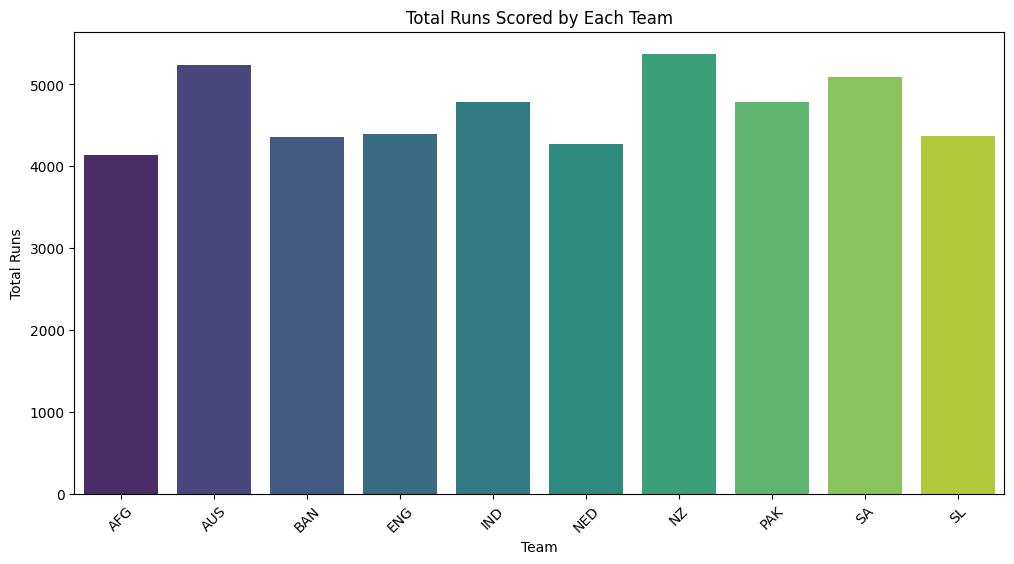

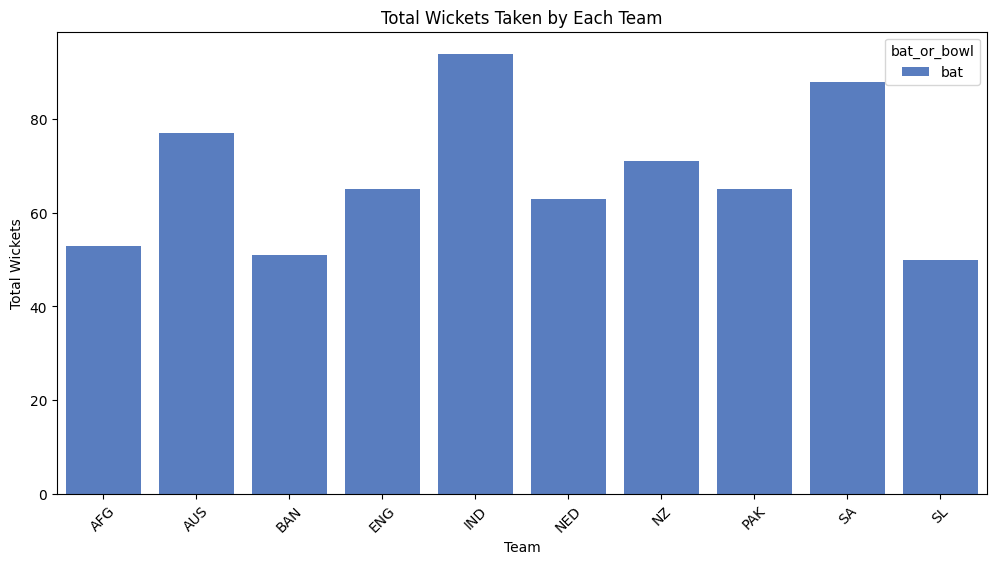

In [7]:
# Explore team-wise performance metrics
team_performance = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.value_counts().index[0]  # Most frequent value of bat_or_bowl
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='runs', data=team_performance, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='wkts', hue='bat_or_bowl', data=team_performance, palette='muted')
plt.title('Total Wickets Taken by Each Team')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.show()

In [9]:
team_averages = df.groupby('team').agg({
  'runs': 'mean',
  'wkts': 'mean',
  'econ': 'mean',
  'sr': 'mean'
})

# Analyze Batting/Bowling Styles (use runs_per_bal instead of sr for bowling)
df_bowling = df[df['bat_or_bowl'] == 'bowl']
team_bowling_style = df_bowling.groupby('team').agg({'runs_per_ball': 'mean'})

# Identify Top Teams (assuming higher runs, lower economy, and higher wickets are better)
top_teams = team_averages.sort_values(by=['runs', 'econ', 'wkts'], ascending=[False, True, False])[:5]  # Top 5 teams
print("Top Teams",top_teams)

# Analyze Top Team Players (explore further using top_teams.index)
top_team_players = df[df['team'].isin(top_teams.index)]
print("Top Team players",top_team_players)

Top Teams            runs      wkts      econ          sr
team                                           
IND   38.572581  1.620690  4.963793  100.259545
PAK   37.390625  1.250000  6.286923   85.479342
NZ    37.333333  1.126984  6.237143   97.041605
SA    36.148936  1.629630  5.682778   98.443218
AUS   33.767742  1.241935  5.661129   85.571290
Top Team players      team                     player bat_or_bowl  bb_bf  runs  wkts  \
0     PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
2      NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3      NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
9     PAK   Mohammad Wasim (1) (PAK)        bowl     60    60   3.0   
10     SA             G Coetzee (SA)        bowl     60    62   3.0   
...   ...                        ...         ...    ...   ...   ...   
1403   NZ            MJ Santner (NZ)        bowl     60    51   0.0   
1404  AUS              A Zampa (AUS)        bowl     42    55   0.0  

In [12]:
team_performance = df.groupby('team').agg({
    'runs': ['sum', 'mean'],
    'wkts': ['sum', 'mean'],
    'bb_bf': ['sum', 'mean'],
})

# Top run-scoring teams and their strengths (using highest run scorer)
top_run_scorers = team_performance['runs']['sum'].sort_values(ascending=False)
top_run_scorer_per_team = df[df['team'].isin(top_run_scorers.index)]
top_run_scorer_per_team = top_run_scorer_per_team.groupby('team').apply(lambda x: x.nlargest(1, 'runs')).reset_index(drop=True)[['team', 'player', 'runs']]

print("Top run-scoring teams and their top run scorer:")
# print('TOP:',top_run_scorers)
print('TOP:',top_run_scorer_per_team)

# Top wicket-taking teams and their strengths (using bowler with most wickets)
top_wicket_takers = team_performance['wkts']['sum'].sort_values(ascending=False)
top_wicket_taker_per_team = df[df['team'].isin(top_wicket_takers.index)]
top_wicket_taker_per_team = top_wicket_taker_per_team.groupby('team').apply(lambda x: x.nlargest(1, 'wkts')).reset_index(drop=True)[['team', 'player', 'wkts']]


print("\nTop wicket-taking teams and their leading wicket taker:")
print(top_wicket_taker_per_team)

Top run-scoring teams and their top run scorer:
TOP:   team                 player  runs
0  AFG   Ibrahim Zadran (AFG)   129
1  AUS       GJ Maxwell (AUS)   201
2  BAN      Mahmudullah (BAN)   111
3  ENG         DJ Malan (ENG)   140
4  IND        RG Sharma (IND)   131
5  NED     BFW de Leede (NED)   115
6   NZ         DP Conway (NZ)   152
7  PAK  Mohammad Rizwan (PAK)   131
8   SA         Q de Kock (SA)   174
9   SL        BKG Mendis (SL)   122

Top wicket-taking teams and their leading wicket taker:
  team                     player  wkts
0  AFG     Fazalhaq Farooqi (AFG)   4.0
1  AUS              A Zampa (AUS)   4.0
2  BAN         Mahedi Hasan (BAN)   4.0
3  ENG           RJW Topley (ENG)   4.0
4  IND       Mohammed Shami (IND)   7.0
5  NED      PA van Meekeren (NED)   4.0
6   NZ            MJ Santner (NZ)   5.0
7  PAK  Shaheen Shah Afridi (PAK)   5.0
8   SA             G Coetzee (SA)   4.0
9   SL          D Madushanka (SL)   5.0


In [11]:
team_data = (
    df.groupby('team')
    .agg(
        total_runs=('runs', sum),
        avg_runs_per_innings=('runs', lambda x: x.mean() / df['inns'].mean()),
        total_wickets=('wkts', sum),
        bowling_avg=('runs', lambda x: x.sum() / df['wkts'].sum()),
        economy_rate=('runs', lambda x: x.sum() / (df['overs'].sum() * 6)),
    )
    .reset_index()
)
# Batting/Bowling Style Analysis
team_data['avg_strike_rate'] = df.groupby('team')['sr'].mean()

# Identify Top Performers & Strengths (Further Analysis recommended)
# You can define criteria based on your needs and analyze team_data for top performers

print("Team data with calculated metrics:")
print(team_data.to_string())

Team data with calculated metrics:
  team  total_runs  avg_runs_per_innings  total_wickets  bowling_avg  economy_rate  avg_strike_rate
0  AFG        4134             21.787295           53.0     6.106352      0.166970              NaN
1  AUS        5234             22.957499           77.0     7.731167      0.211398              NaN
2  BAN        4358             21.013126           51.0     6.437223      0.176017              NaN
3  ENG        4396             19.792620           65.0     6.493353      0.177552              NaN
4  IND        4783             26.224140           94.0     7.064993      0.193182              NaN
5  NED        4268             18.481930           63.0     6.304284      0.172382              NaN
6   NZ        5376             25.381619           71.0     7.940916      0.217133              NaN
7  PAK        4786             25.420570           65.0     7.069424      0.193303              NaN
8   SA        5097             24.576389           88.0     7.528

C:\Users\vatsa\AppData\Local\Temp\ipykernel_39804\2806992720.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('team')
C:\Users\vatsa\AppData\Local\Temp\ipykernel_39804\2806992720.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('team')


In [13]:
team_performance = df.groupby('team').agg({
    'runs': ['sum', 'mean'],
    'wkts': ['sum', 'mean'],
    'bb_bf': ['sum', 'mean'],
})

# Top run-scoring teams and their strengths (using highest run scorer)
top_run_scorers = team_performance['runs']['sum'].sort_values(ascending=False)
top_run_scorer_per_team = df[df['team'].isin(top_run_scorers.index)]
top_run_scorer_per_team = top_run_scorer_per_team.groupby('team').apply(lambda x: x.nlargest(1, 'runs')).reset_index(drop=True)[['team', 'player', 'runs']]

print("Top run-scoring teams and their top run scorer:")
# print('TOP:',top_run_scorers)
print('TOP:',top_run_scorer_per_team)

# Top wicket-taking teams and their strengths (using bowler with most wickets)
top_wicket_takers = team_performance['wkts']['sum'].sort_values(ascending=False)
top_wicket_taker_per_team = df[df['team'].isin(top_wicket_takers.index)]
top_wicket_taker_per_team = top_wicket_taker_per_team.groupby('team').apply(lambda x: x.nlargest(1, 'wkts')).reset_index(drop=True)[['team', 'player', 'wkts']]


print("\nTop wicket-taking teams and their leading wicket taker:")
print(top_wicket_taker_per_team)

Top run-scoring teams and their top run scorer:
TOP:   team                 player  runs
0  AFG   Ibrahim Zadran (AFG)   129
1  AUS       GJ Maxwell (AUS)   201
2  BAN      Mahmudullah (BAN)   111
3  ENG         DJ Malan (ENG)   140
4  IND        RG Sharma (IND)   131
5  NED     BFW de Leede (NED)   115
6   NZ         DP Conway (NZ)   152
7  PAK  Mohammad Rizwan (PAK)   131
8   SA         Q de Kock (SA)   174
9   SL        BKG Mendis (SL)   122

Top wicket-taking teams and their leading wicket taker:
  team                     player  wkts
0  AFG     Fazalhaq Farooqi (AFG)   4.0
1  AUS              A Zampa (AUS)   4.0
2  BAN         Mahedi Hasan (BAN)   4.0
3  ENG           RJW Topley (ENG)   4.0
4  IND       Mohammed Shami (IND)   7.0
5  NED      PA van Meekeren (NED)   4.0
6   NZ            MJ Santner (NZ)   5.0
7  PAK  Shaheen Shah Afridi (PAK)   5.0
8   SA             G Coetzee (SA)   4.0
9   SL          D Madushanka (SL)   5.0


In [14]:
# Task 2: Player Performance Analysis

# Top Batsmen (assuming not out batters contribute)
top_batsmen = df.groupby('player').agg({
  'runs': 'sum',
  'inns': 'count',
  '4s': 'sum',
  '6s': 'sum',
  'not_out': 'sum'  # assuming there is a column 'not_out' indicating if a player was not out
}).query('not_out > 0').sort_values(by='runs', ascending=False)[:10]  # Top 10 batsmen

top_batsmen['avg'] = top_batsmen['runs'] / (top_batsmen['inns'] - top_batsmen['not_out'])
print("TOP BT",top_batsmen)
# Top Bowlers
top_bowlers = df_bowling.groupby('player').agg({
  'wkts': 'sum',
  'bb_bf': 'sum',
  'mdns': 'sum'
}).sort_values(by='wkts', ascending=False)[:10]  # Top 10 bowlers

top_bowlers['avg'] = top_bowlers['wkts'] / (top_bowlers['bb_bf'] / 6).replace(0, 1)  # Replace 0 with 1 to avoid division by zero
print("TOP BW",top_bowlers)

TOP BT                           runs  inns    4s    6s  not_out        avg
player                                                              
R Ravindra (NZ)            971    19  55.0  17.0      1.0  53.944444
V Kohli (IND)              726    12  64.0   9.0      3.0  80.666667
GJ Maxwell (AUS)           693    15  40.0  22.0      2.0  53.307692
Azmatullah Omarzai (AFG)   623    17  26.0  13.0      2.0  41.533333
LV van Beek (NED)          616    16   9.0   3.0      2.0  44.000000
PJ Cummins (AUS)           609    18  13.0   5.0      4.0  43.500000
M Jansen (SA)              607    17   9.0   9.0      3.0  43.357143
DJ Mitchell (NZ)           564    11  48.0  22.0      1.0  56.400000
MA Starc (AUS)             560    17   7.0   1.0      1.0  35.000000
D Madushanka (SL)          553    12   4.0   0.0      1.0  50.272727
TOP BW                            wkts  bb_bf  mdns       avg
player                                                
Mohammed Shami (IND)       23.0    251   3.0  0.

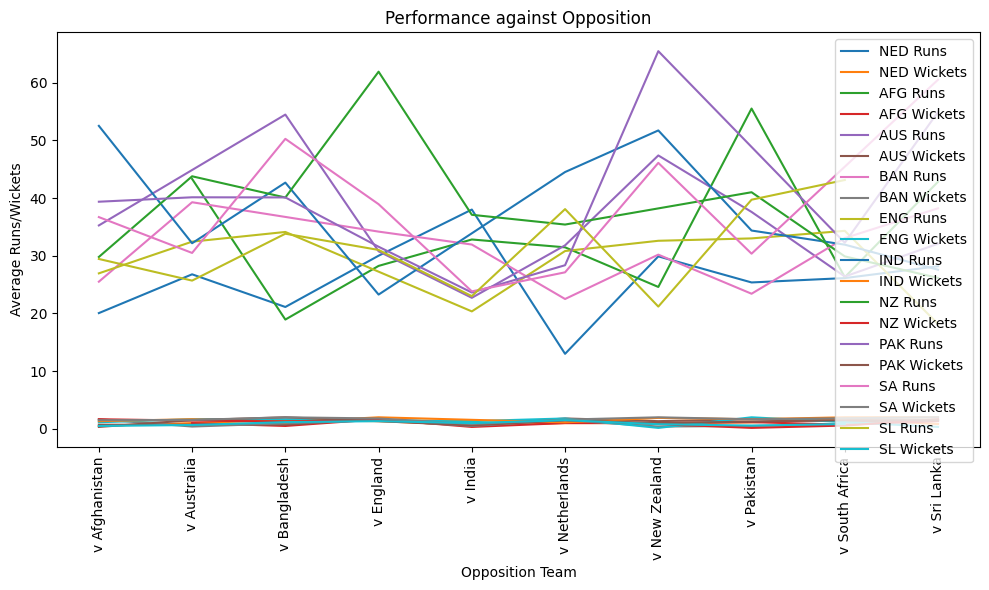

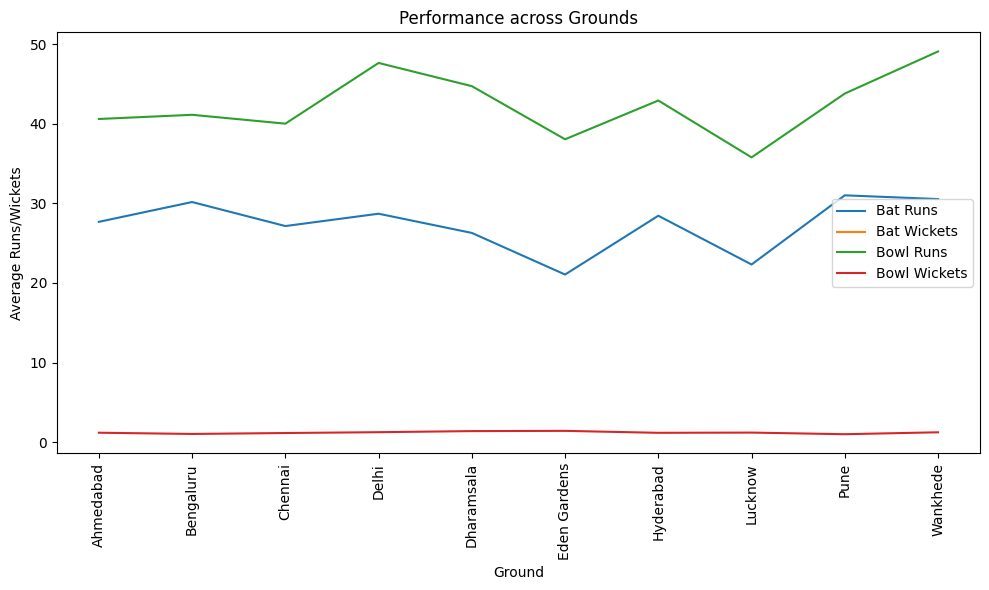

In [19]:
# Task 3: Opposition and Ground Analysis
import matplotlib.pyplot as plt

# Opposition Analysis
opposition_analysis = df.groupby(['team', 'opposition']).agg({
  'runs': 'mean',
  'wkts': 'mean'
}).reset_index()

# Filter teams with enough data for meaningful comparison
team_counts = opposition_analysis['team'].value_counts()
teams_with_enough_data = team_counts[team_counts > 2].index
opposition_analysis_filtered = opposition_analysis[opposition_analysis['team'].isin(teams_with_enough_data)]

# Performance across Grounds
ground_analysis = df.groupby(['ground', 'bat_or_bowl']).agg({
  'runs': 'mean',
  'wkts': 'mean'
}).reset_index()

# Plotting Opposition Analysis
plt.figure(figsize=(10, 6))
for team in teams_with_enough_data:
    team_data = opposition_analysis_filtered[opposition_analysis_filtered['team'] == team]
    plt.plot(team_data['opposition'], team_data['runs'], label=team + ' Runs')
    plt.plot(team_data['opposition'], team_data['wkts'], label=team + ' Wickets')

plt.xlabel('Opposition Team')
plt.ylabel('Average Runs/Wickets')
plt.title('Performance against Opposition')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Ground Analysis
plt.figure(figsize=(10, 6))
for bat_or_bowl in ['bat', 'bowl']:
    ground_data = ground_analysis[ground_analysis['bat_or_bowl'] == bat_or_bowl]
    plt.plot(ground_data['ground'], ground_data['runs'], label=bat_or_bowl.capitalize() + ' Runs')
    plt.plot(ground_data['ground'], ground_data['wkts'], label=bat_or_bowl.capitalize() + ' Wickets')

plt.xlabel('Ground')
plt.ylabel('Average Runs/Wickets')
plt.title('Performance across Grounds')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

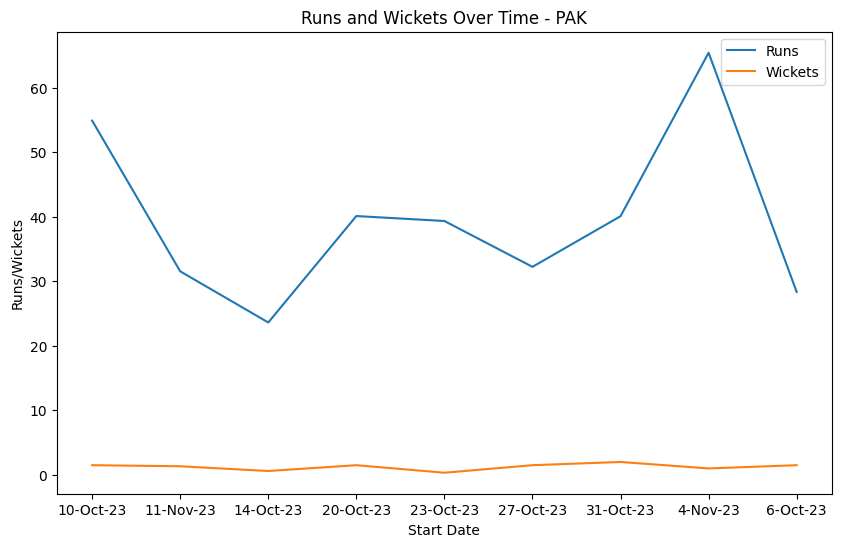

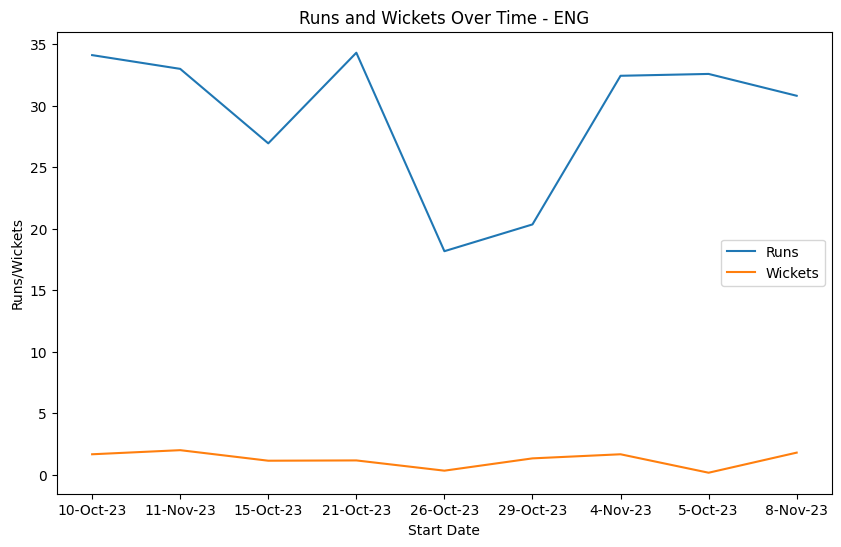

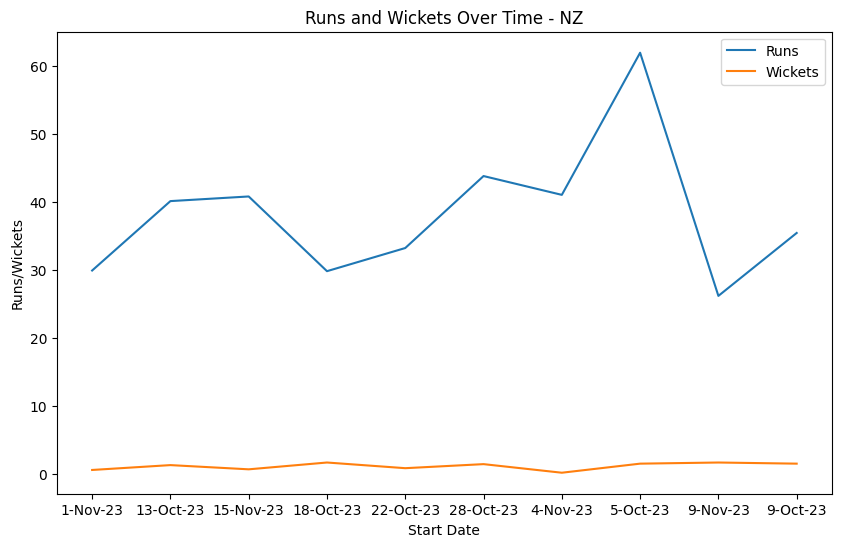

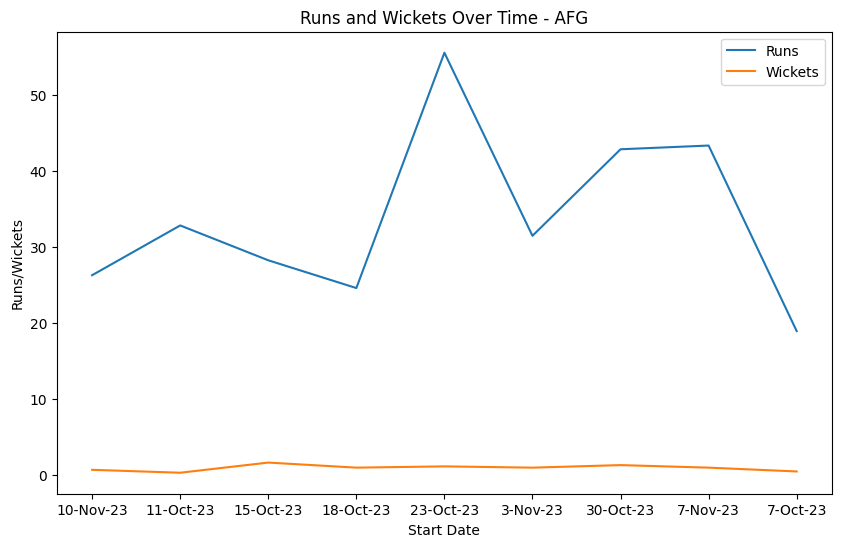

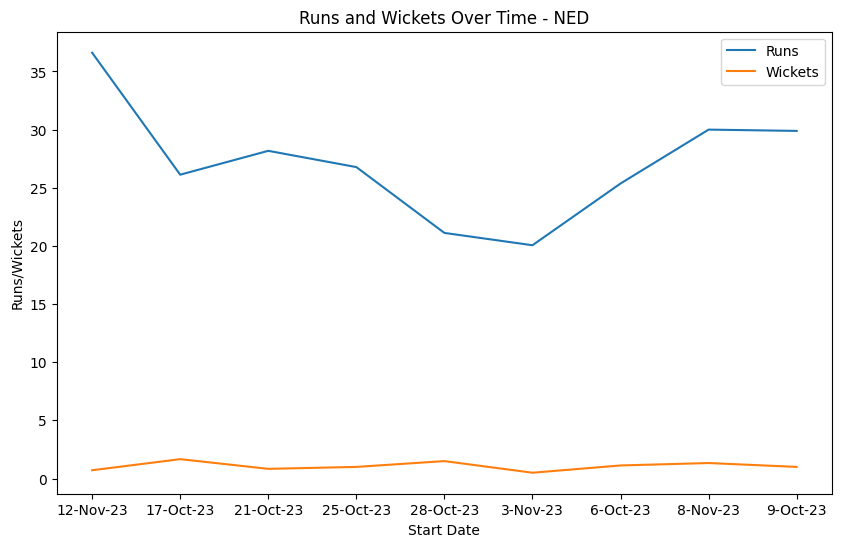

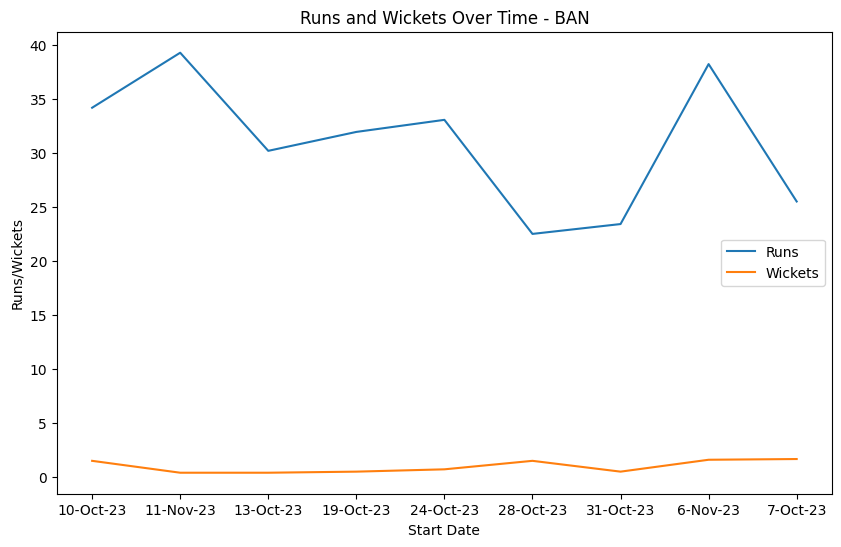

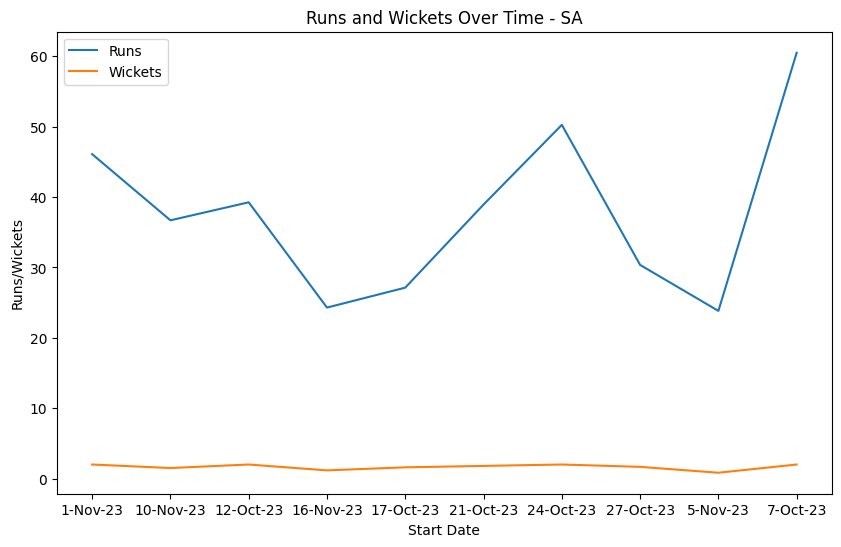

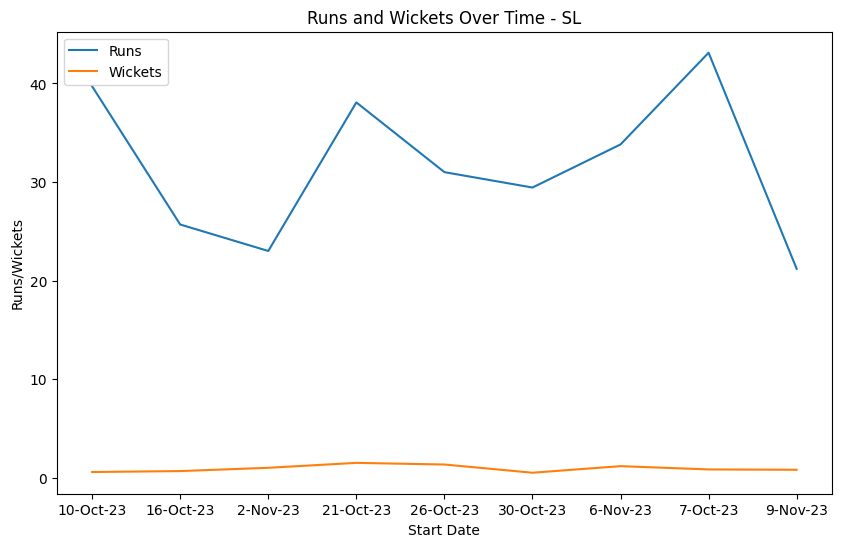

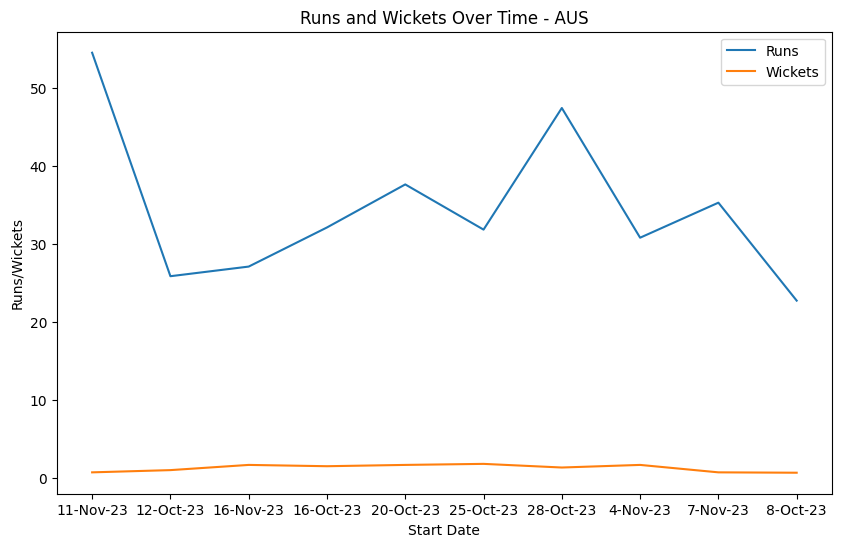

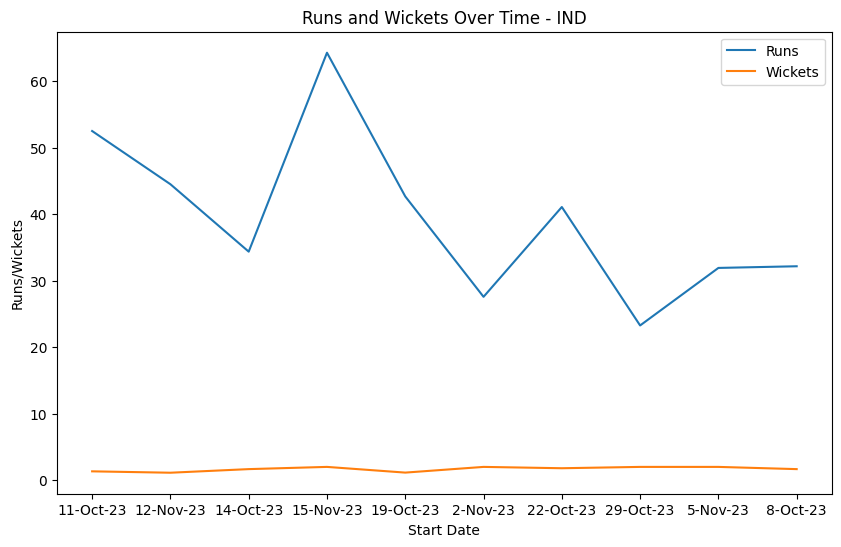

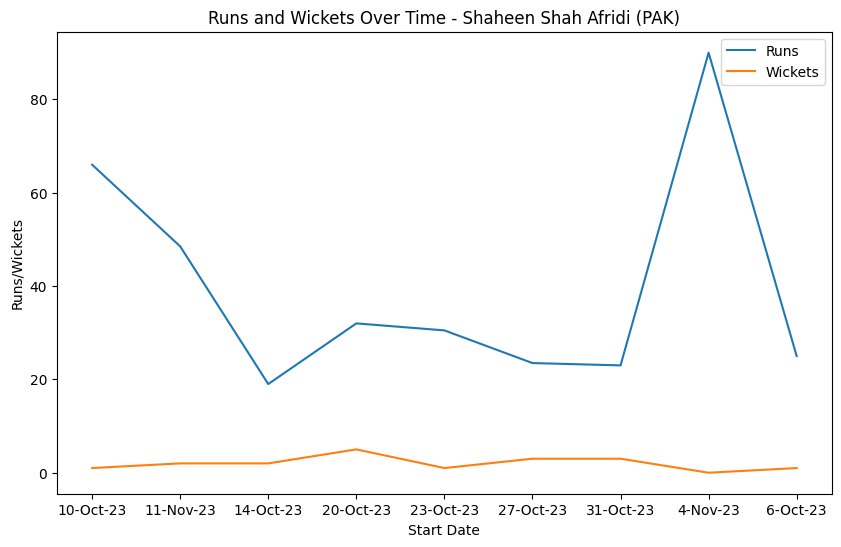

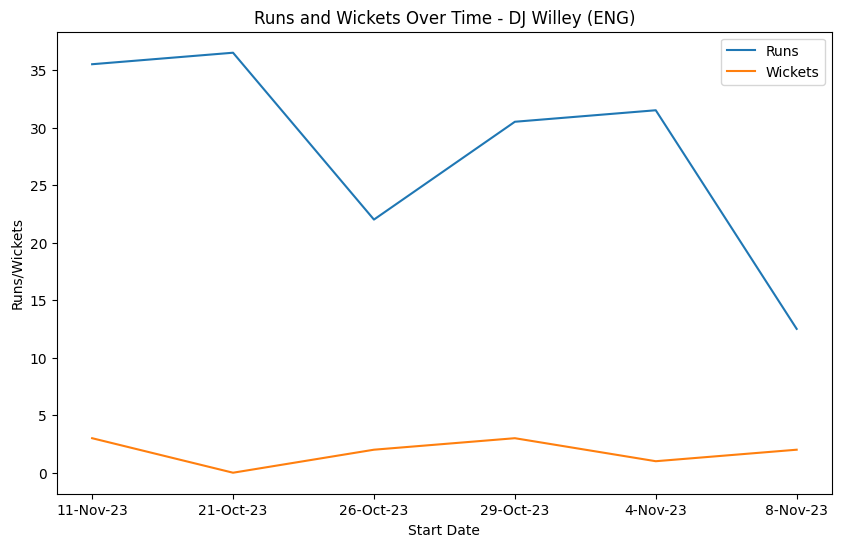

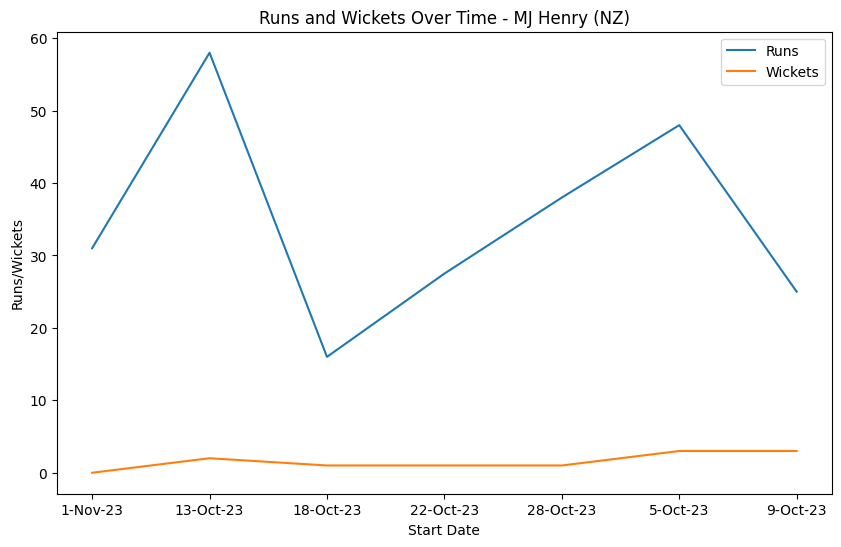

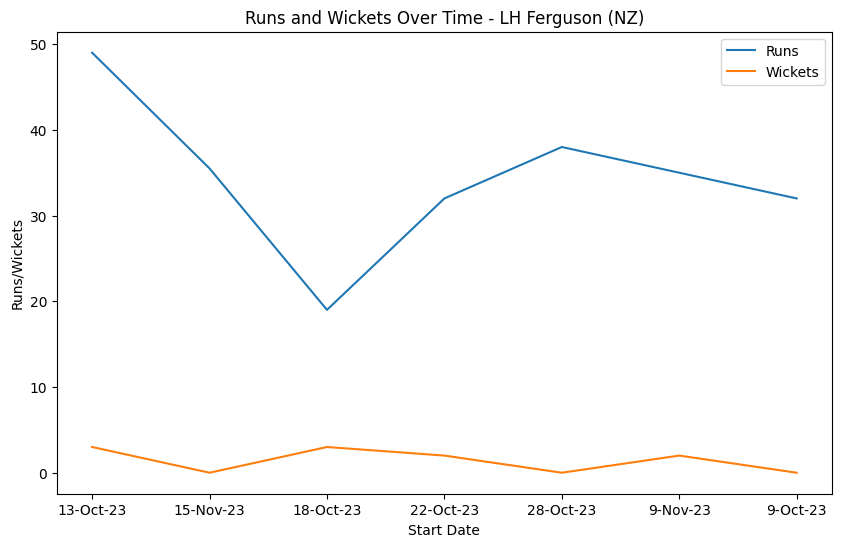

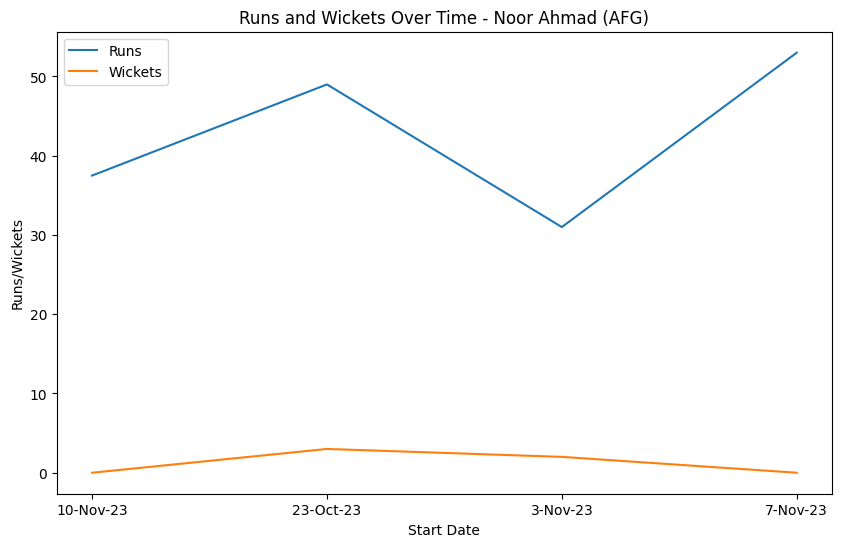

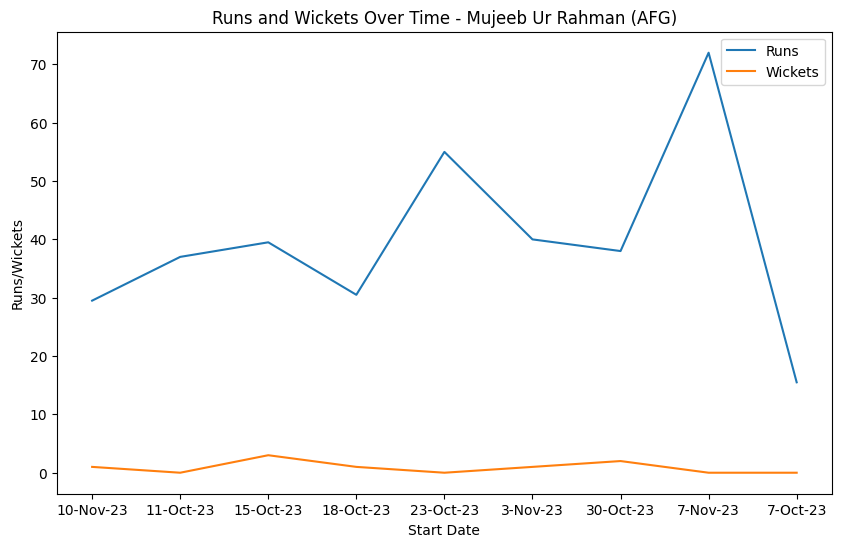

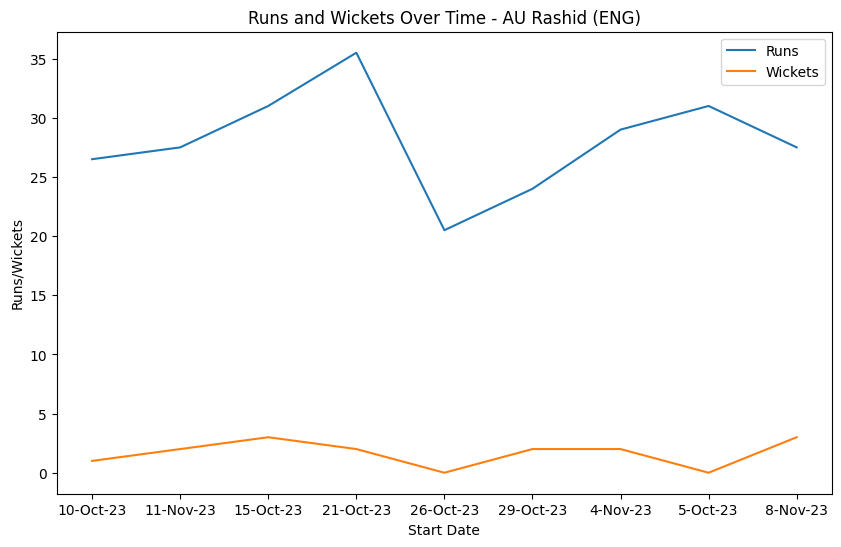

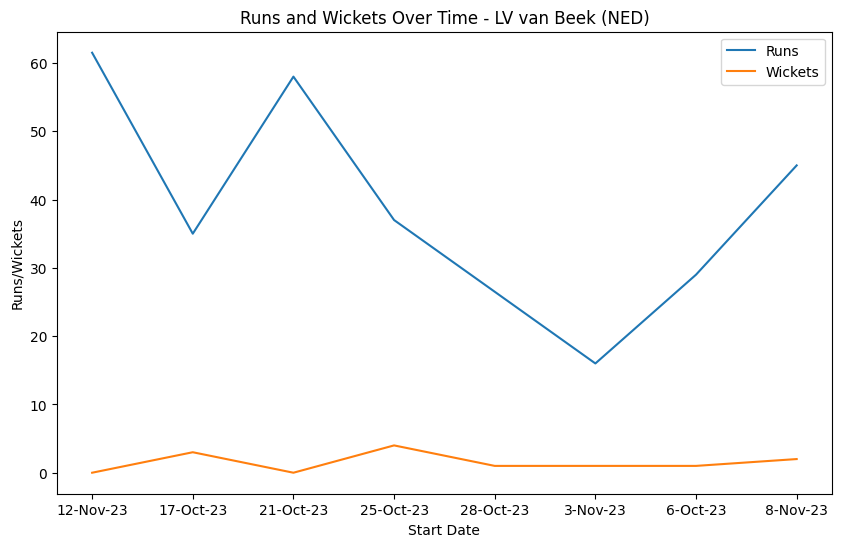

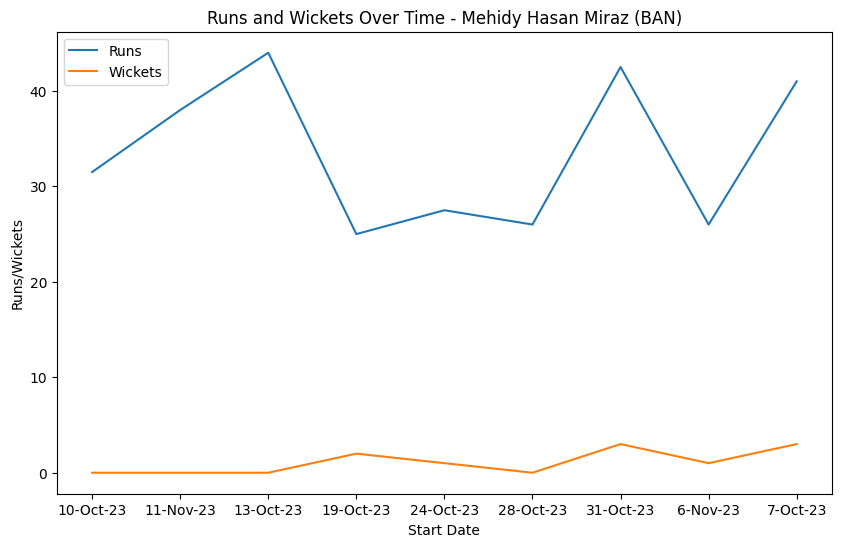

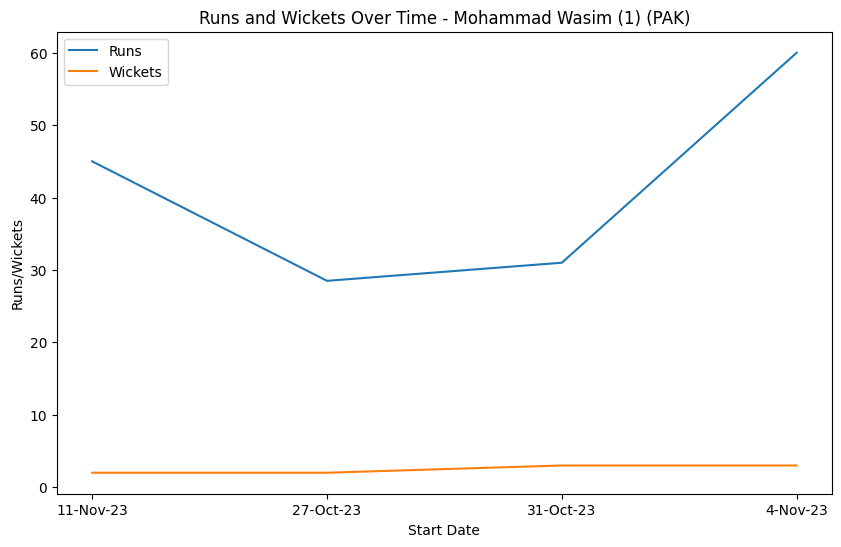

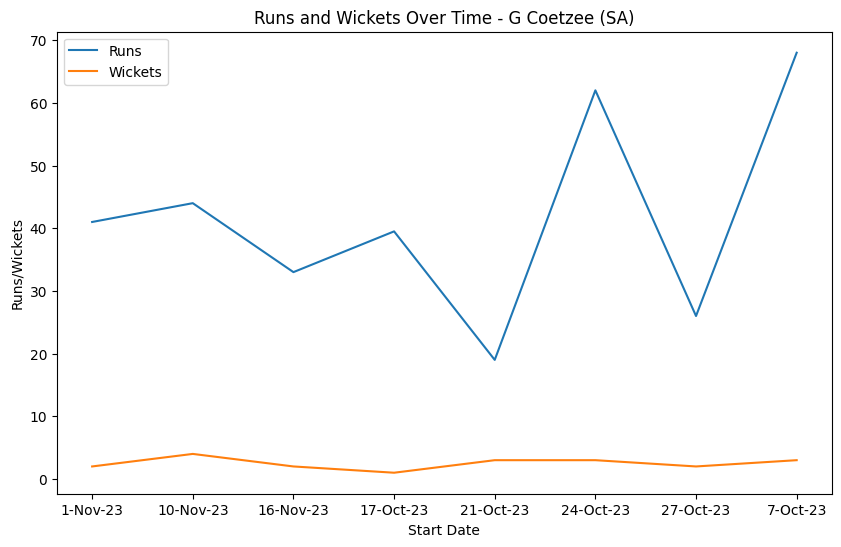

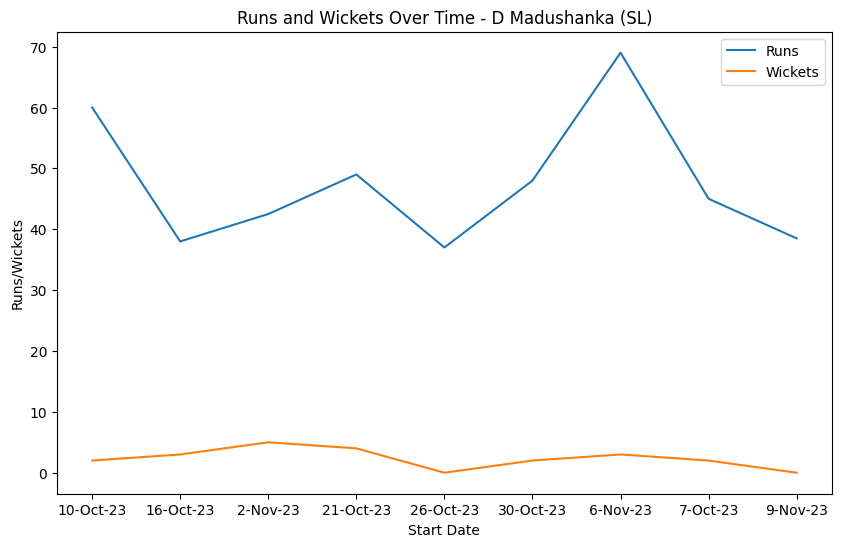

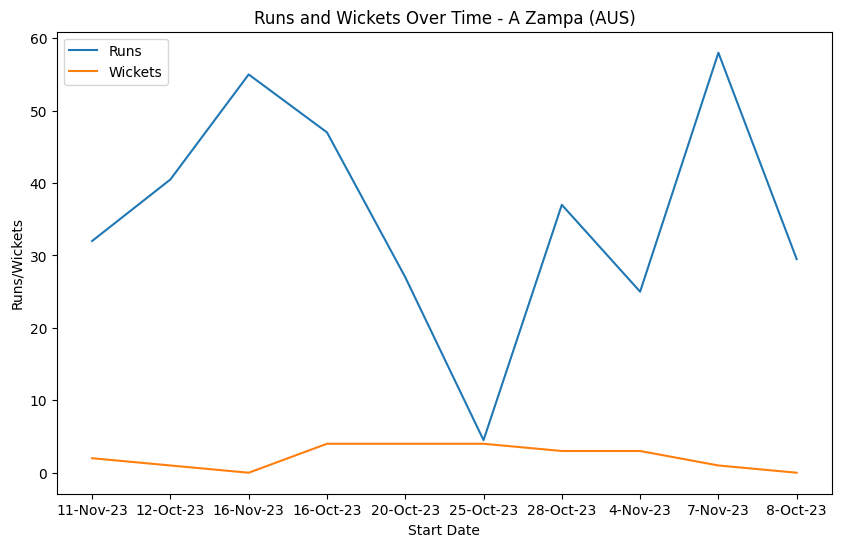

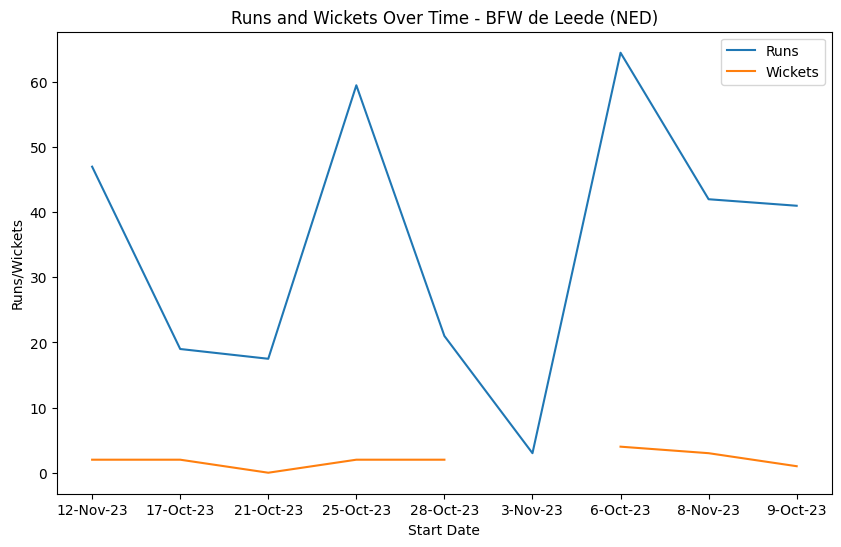

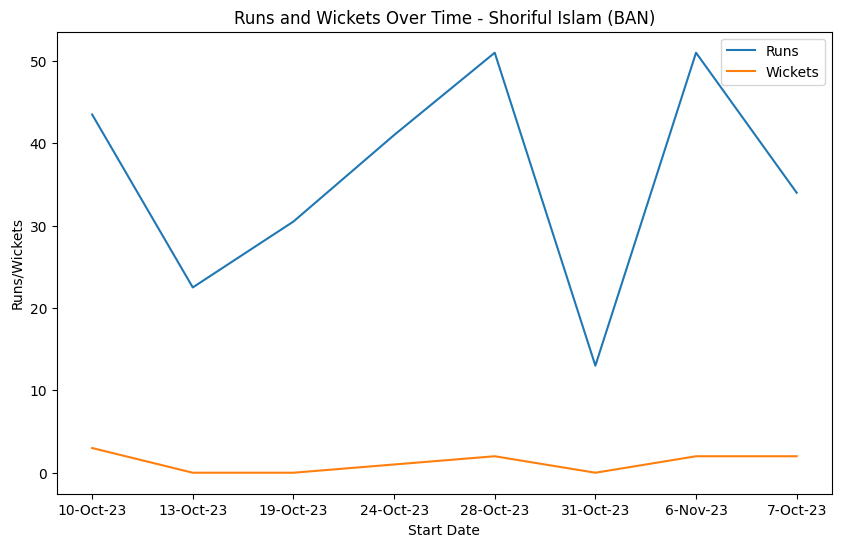

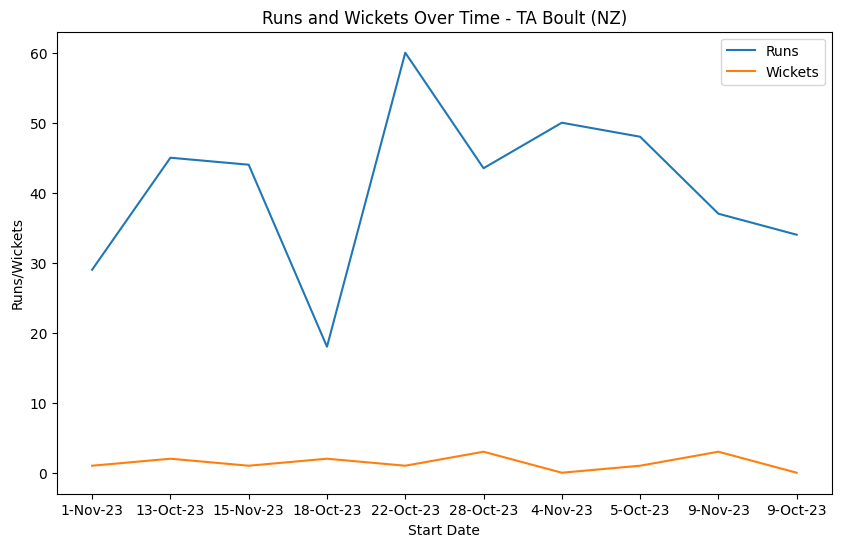

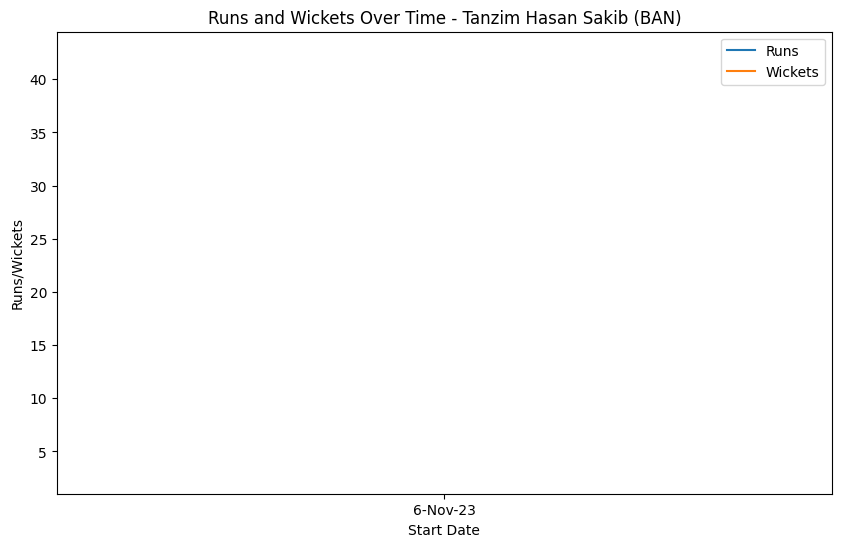

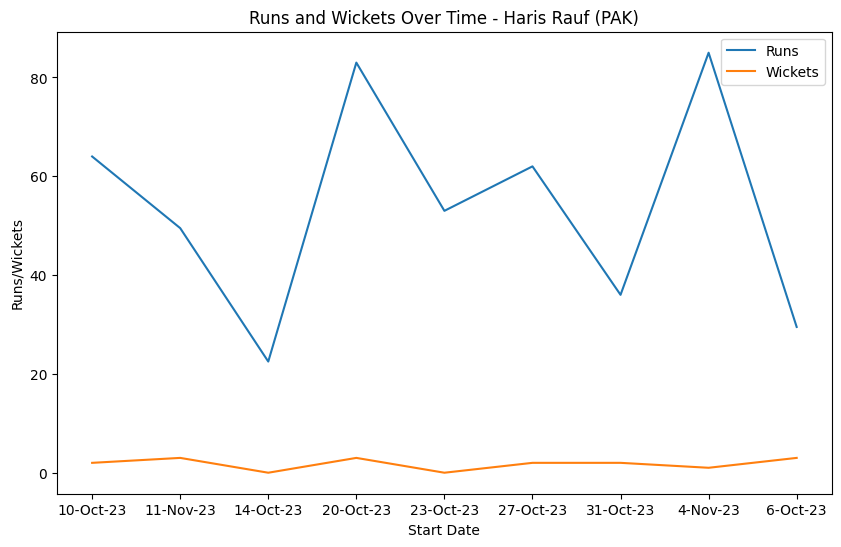

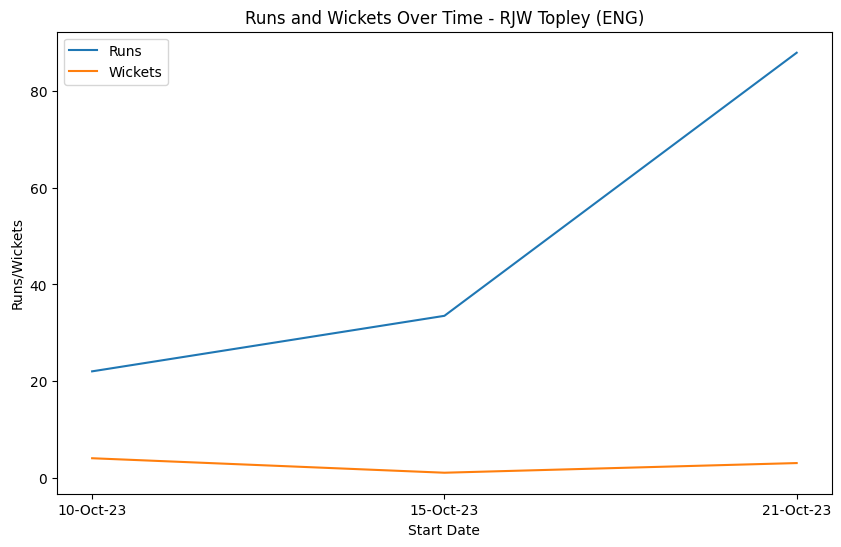

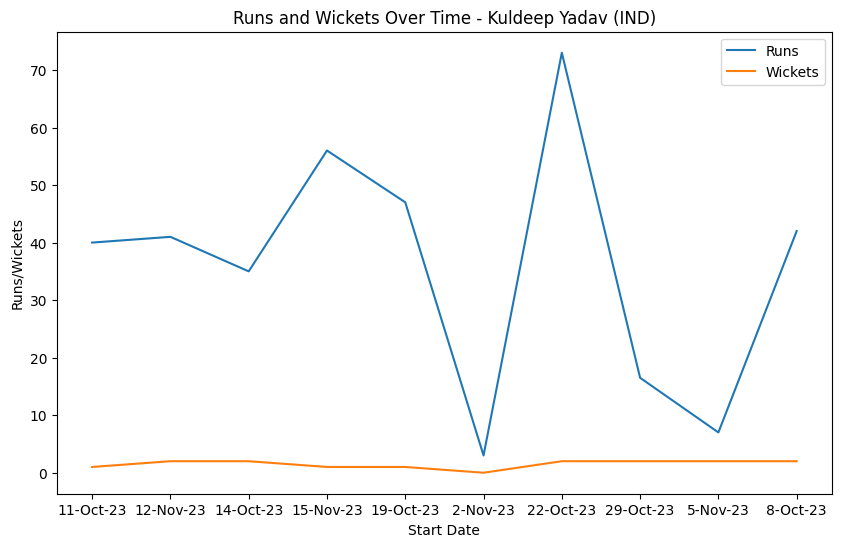

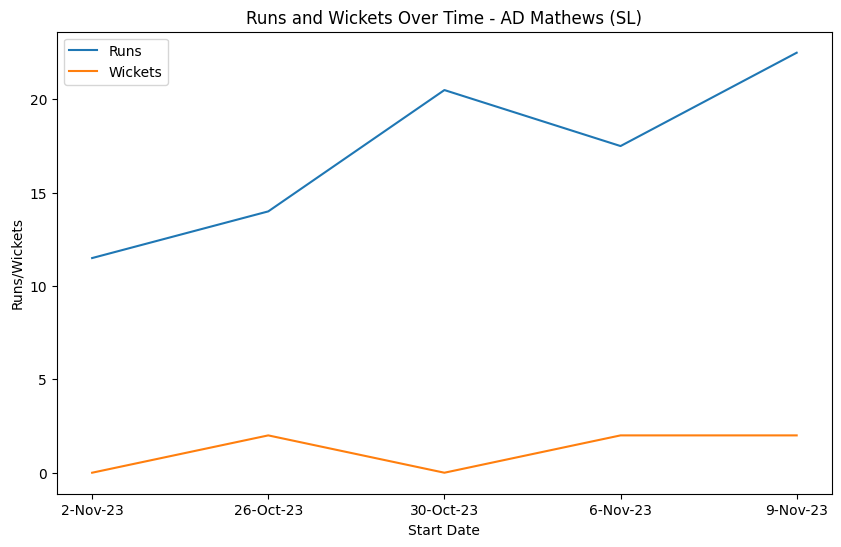

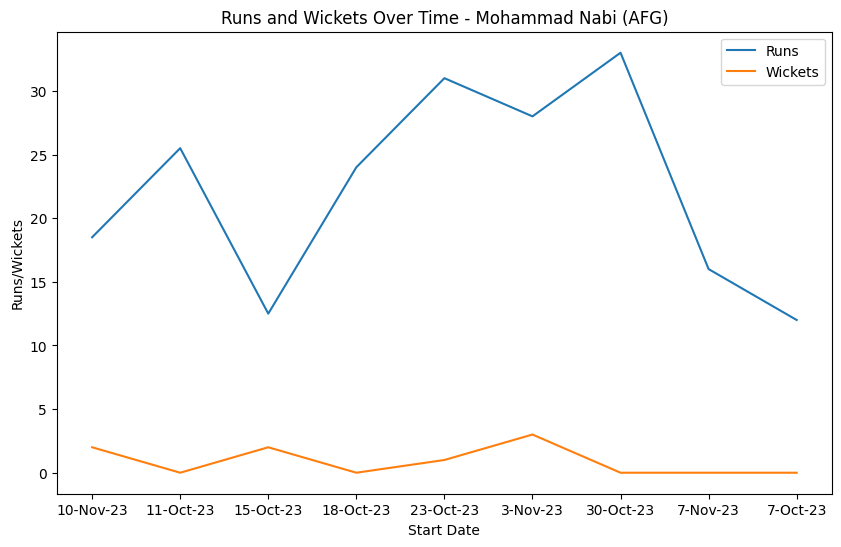

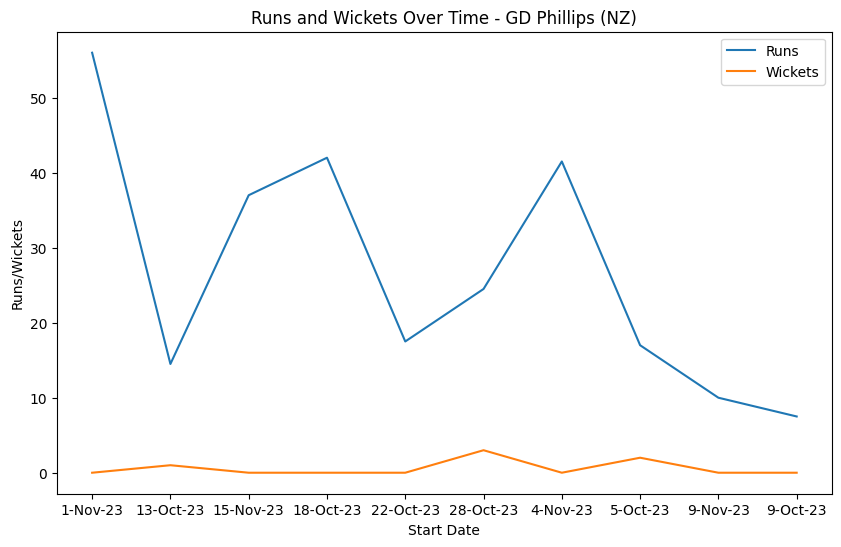

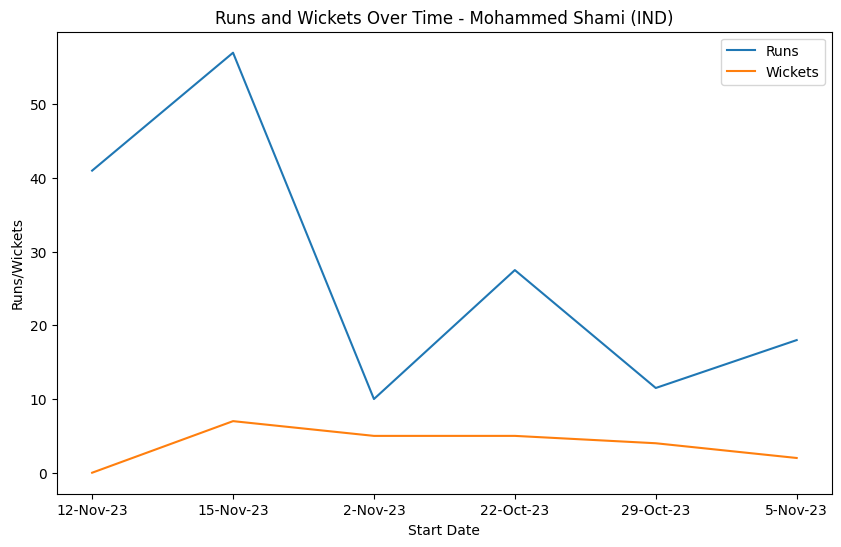

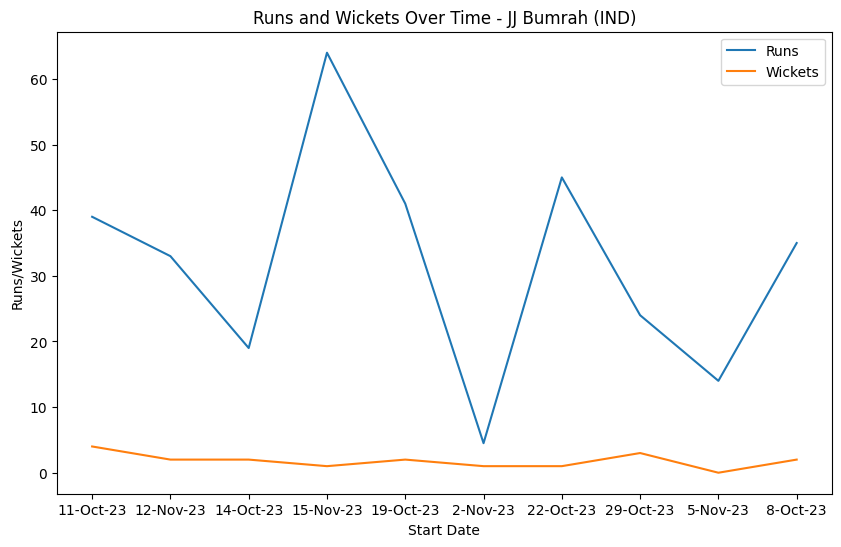

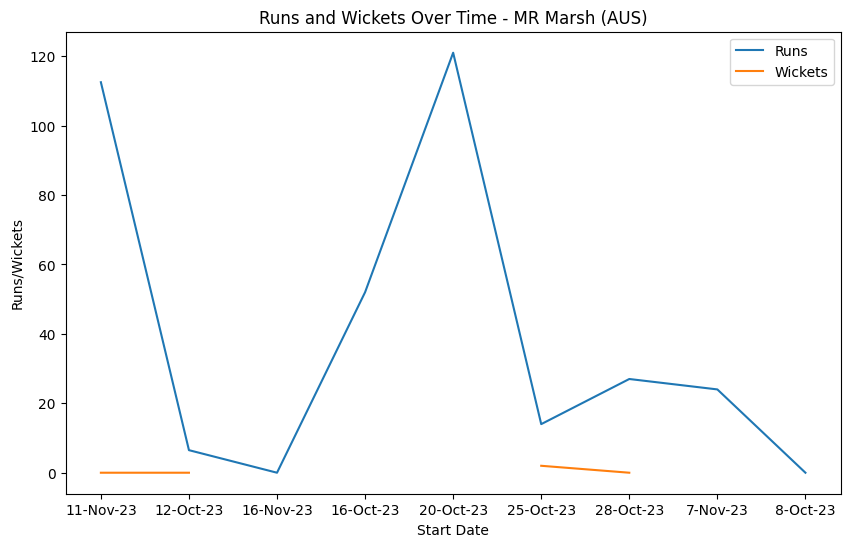

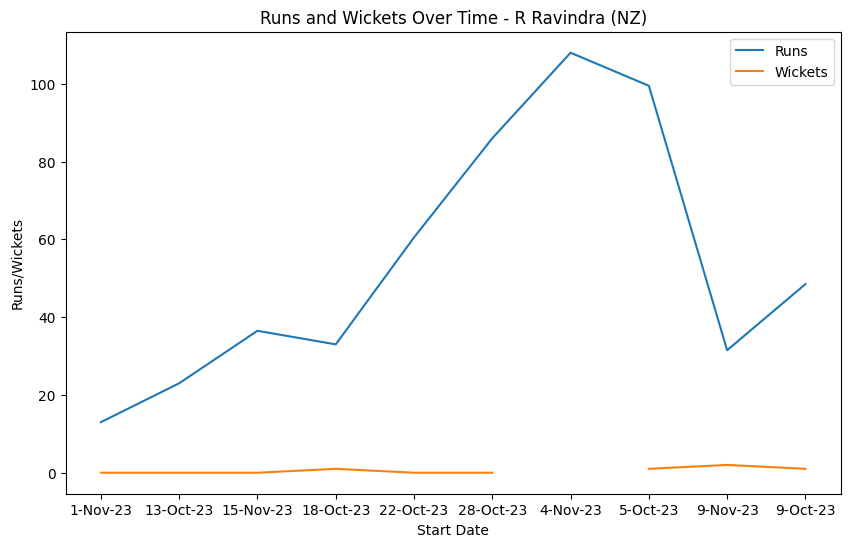

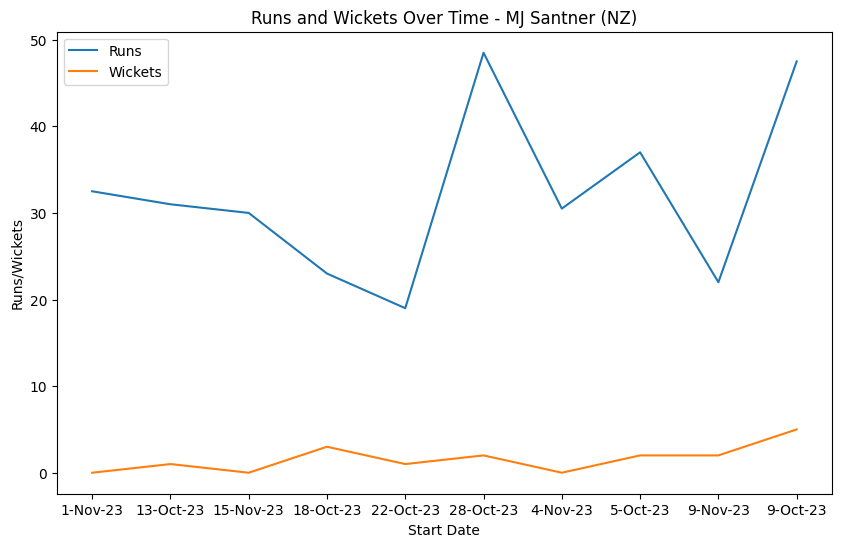

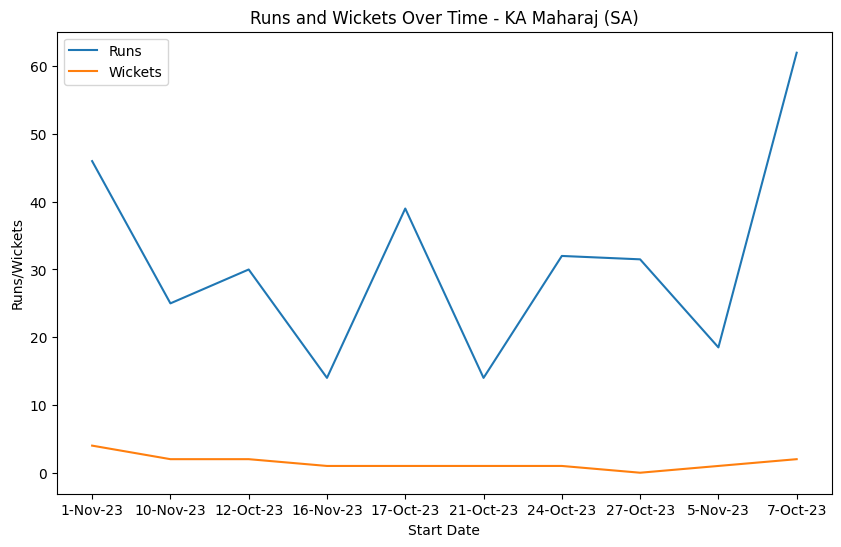

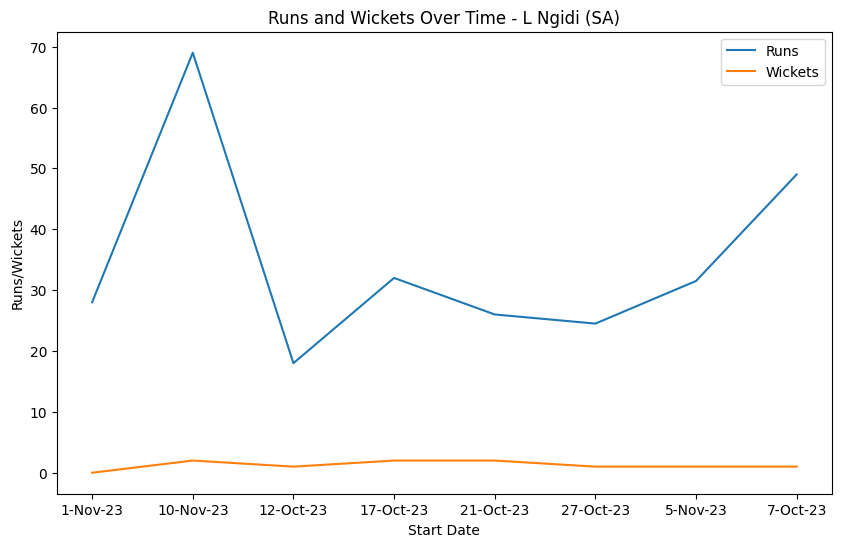

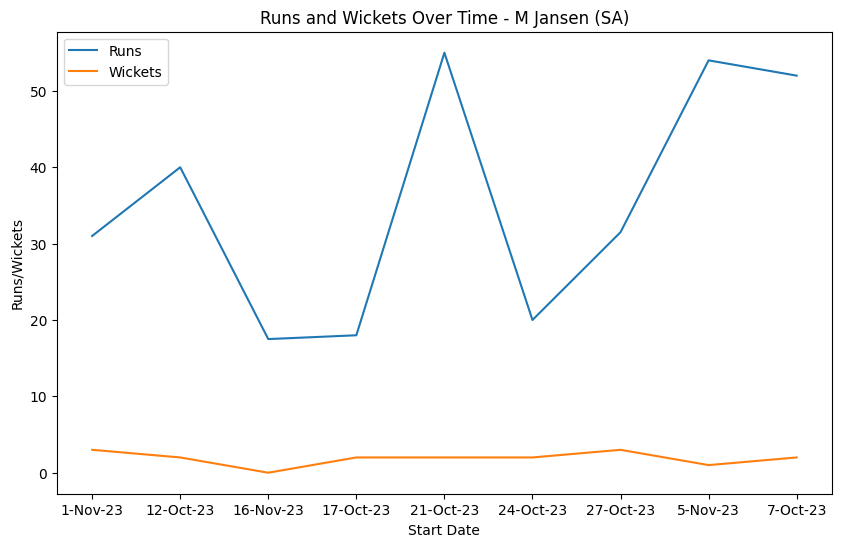

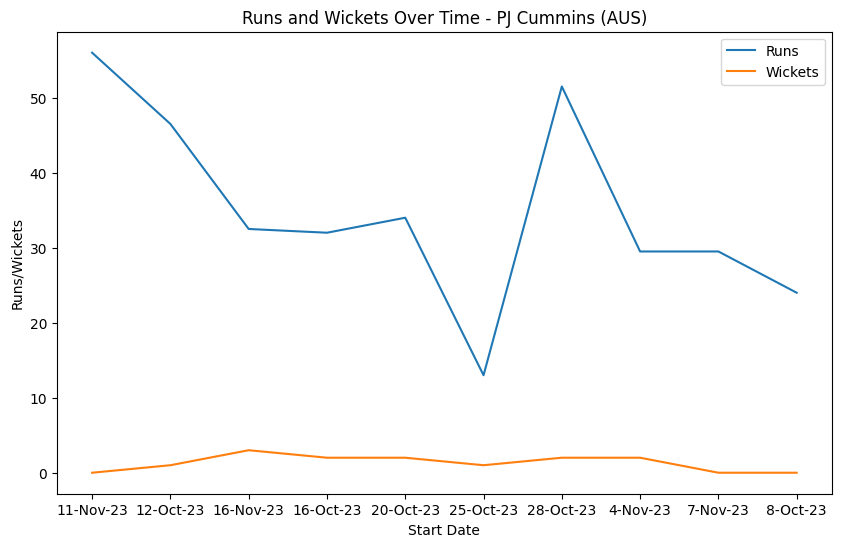

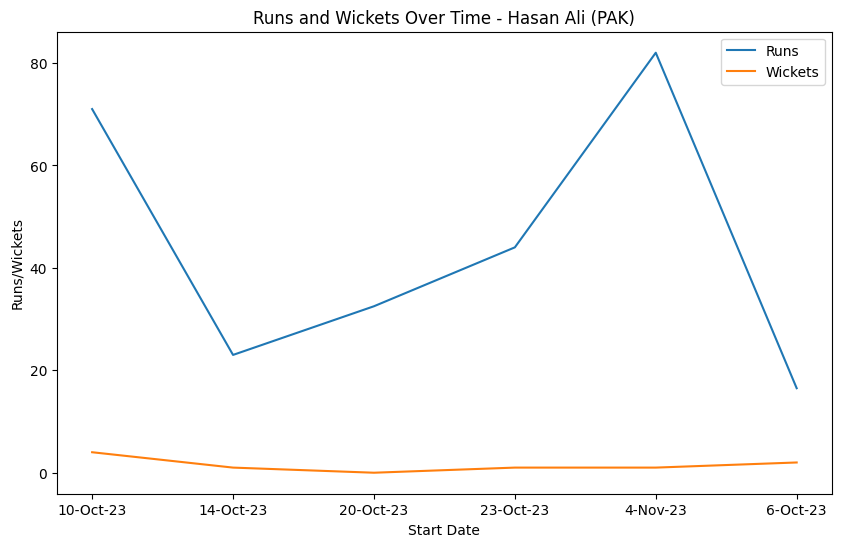

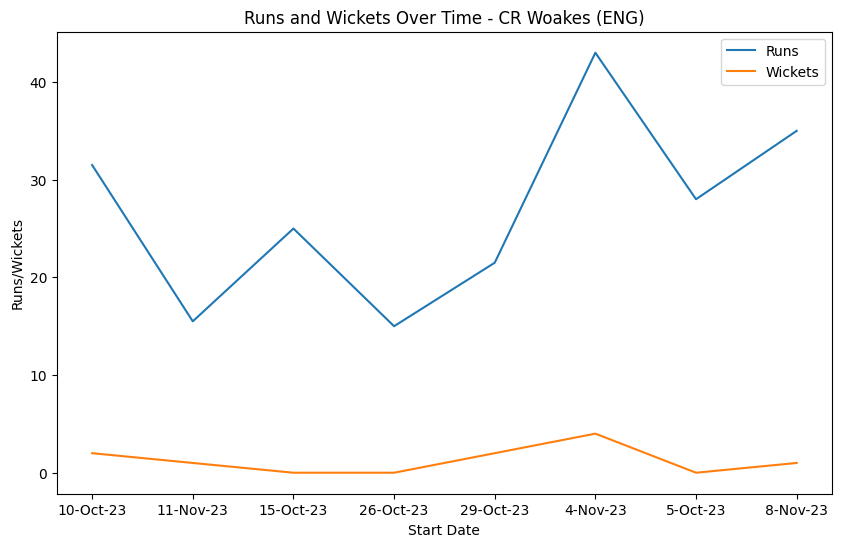

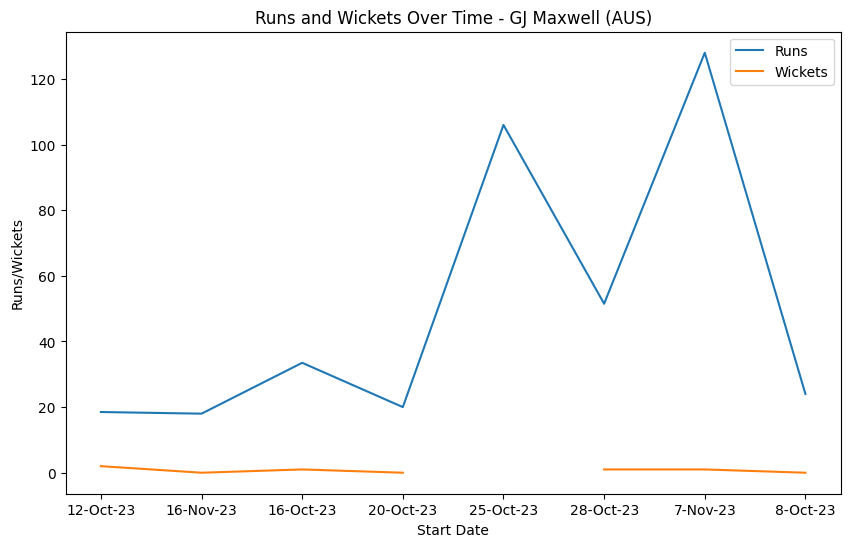

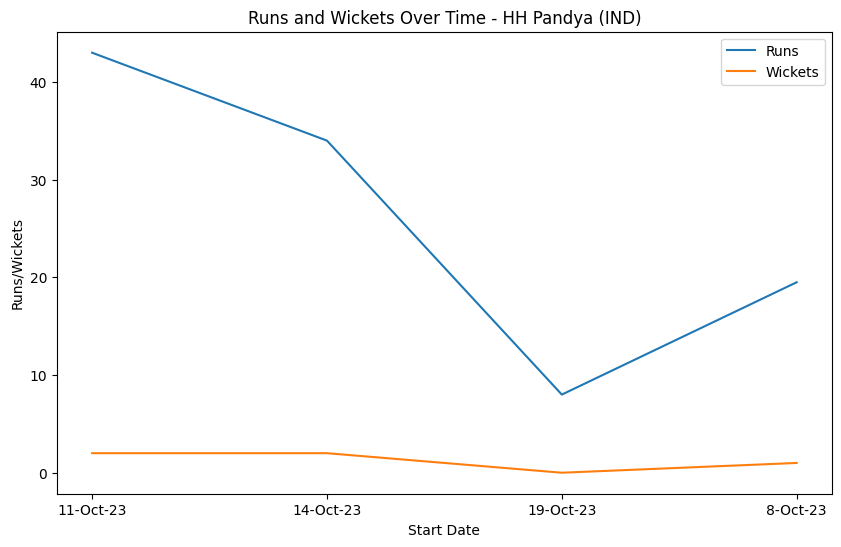

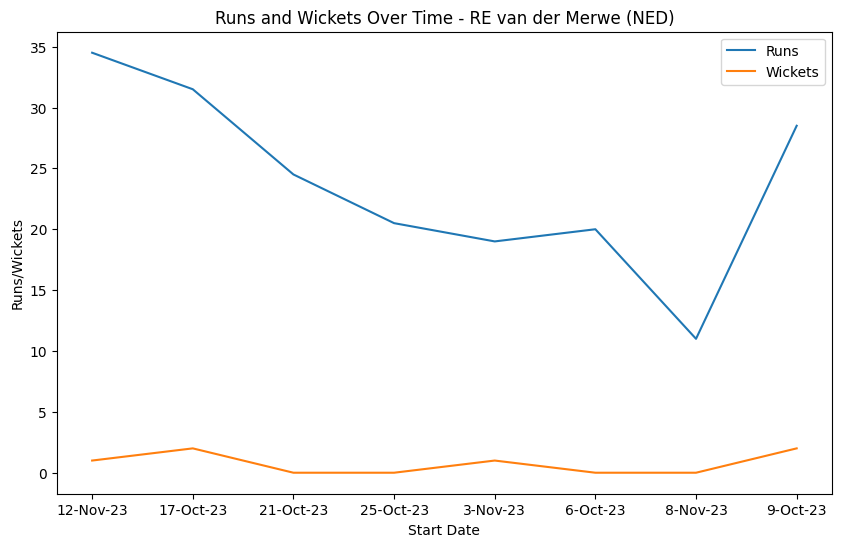

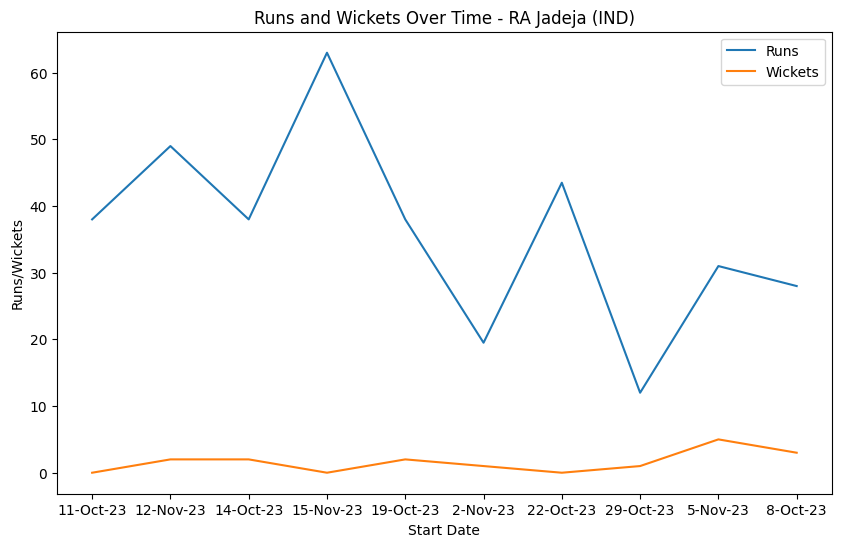

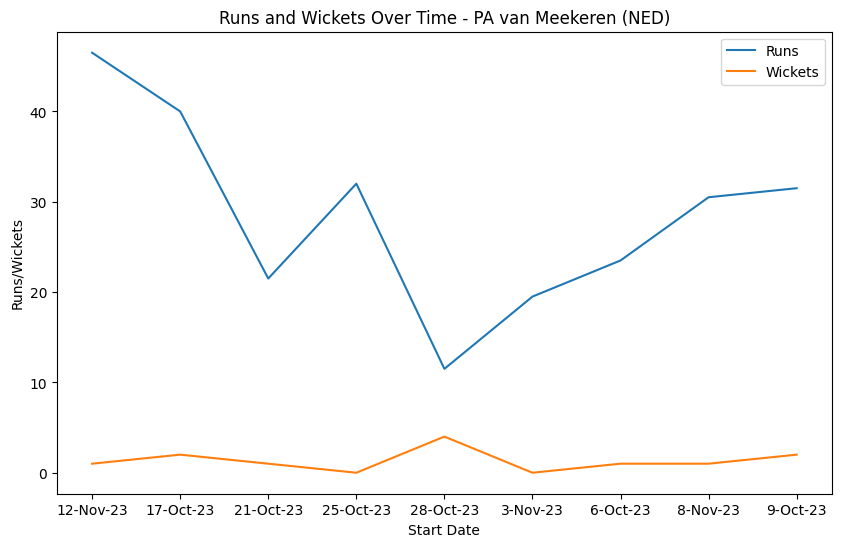

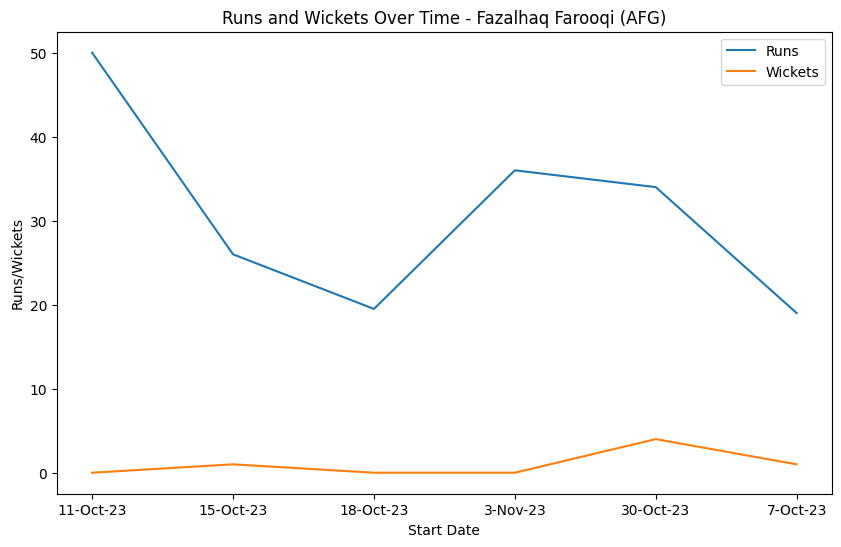

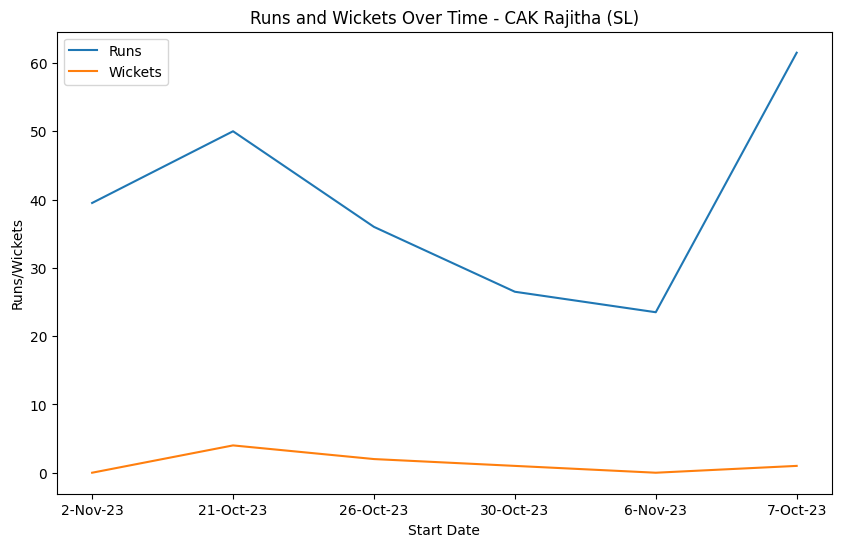

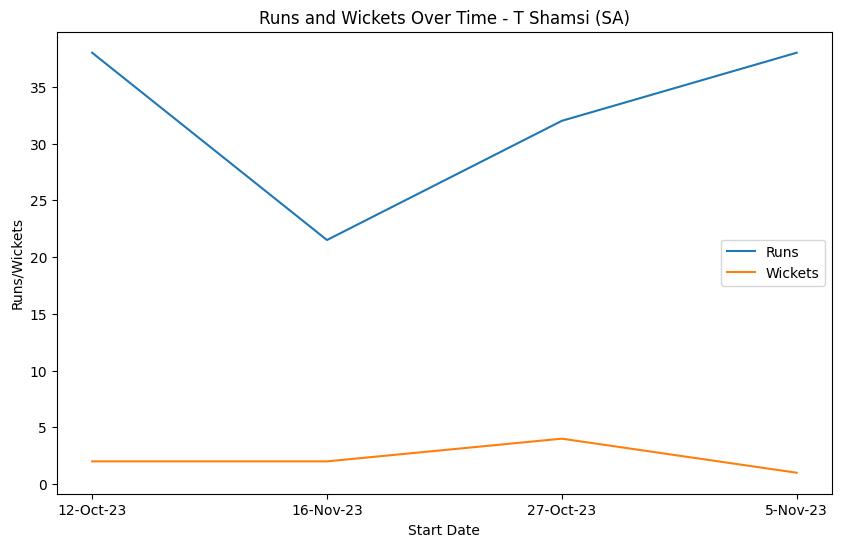

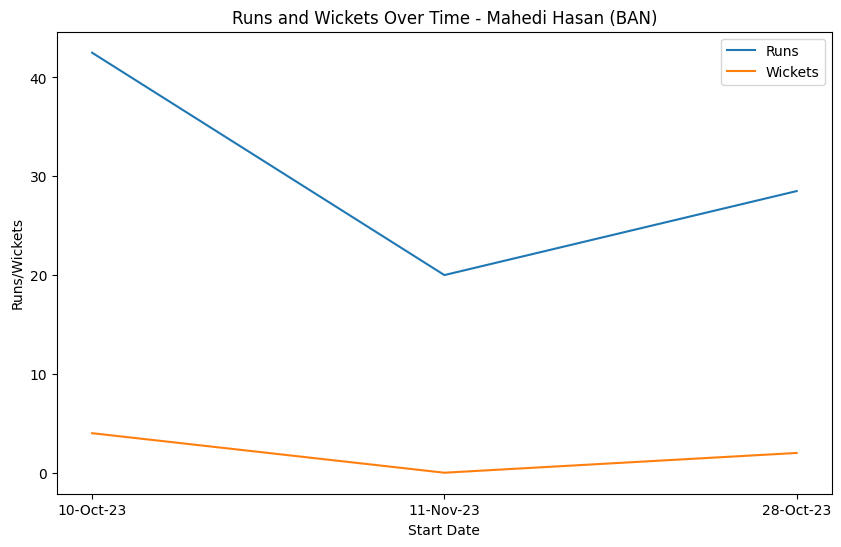

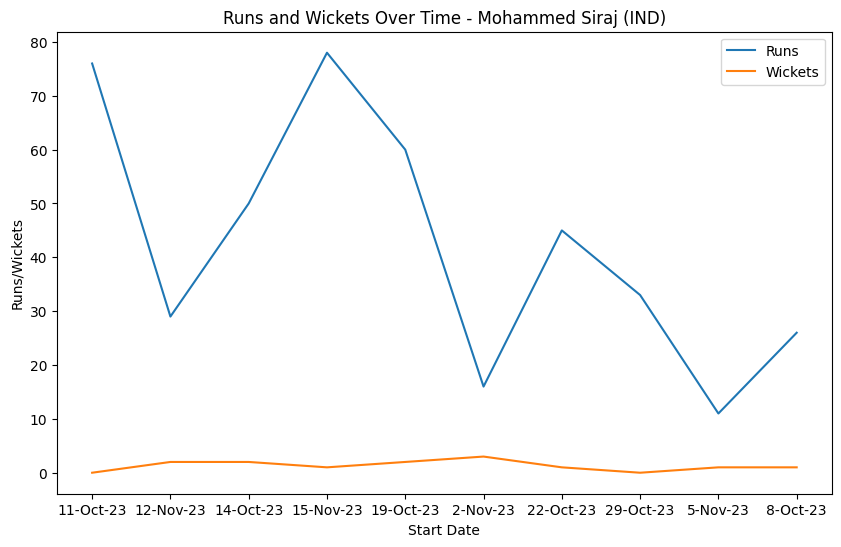

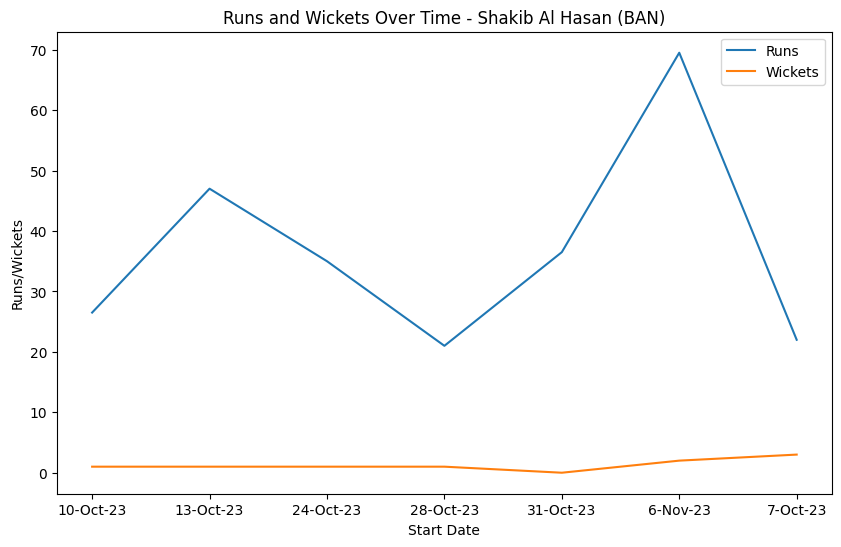

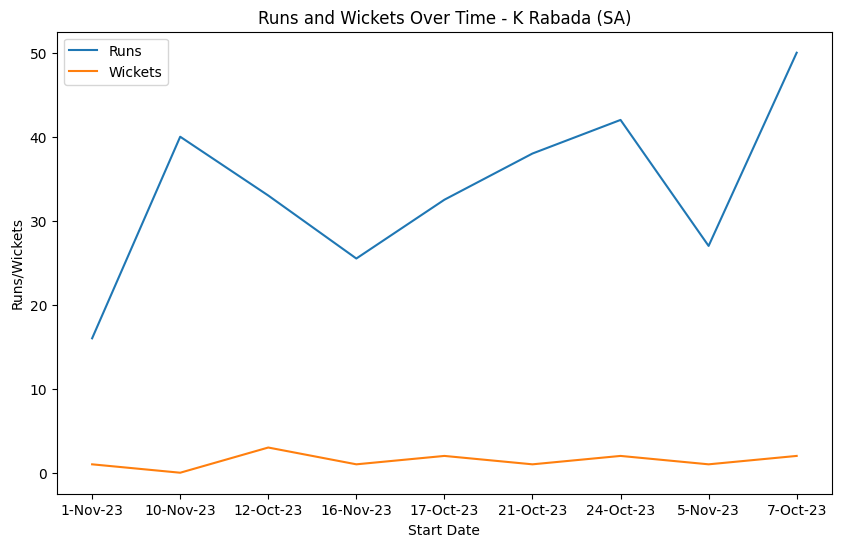

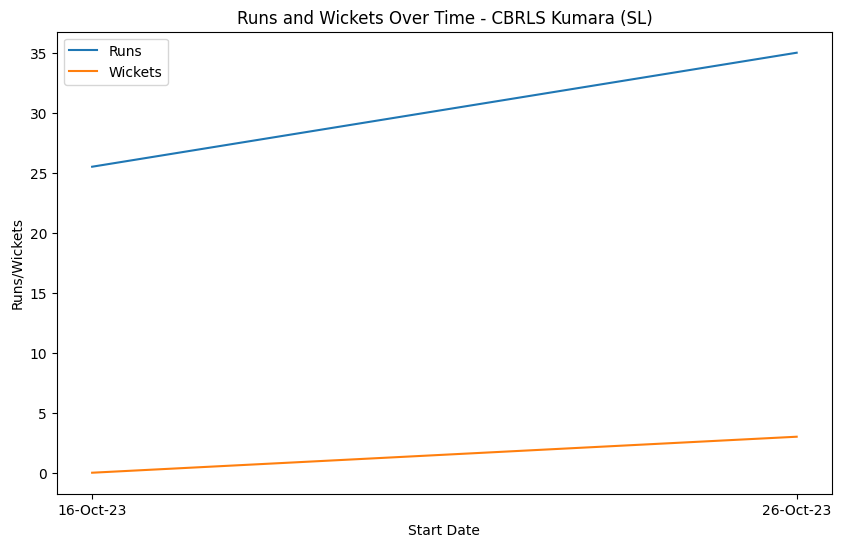

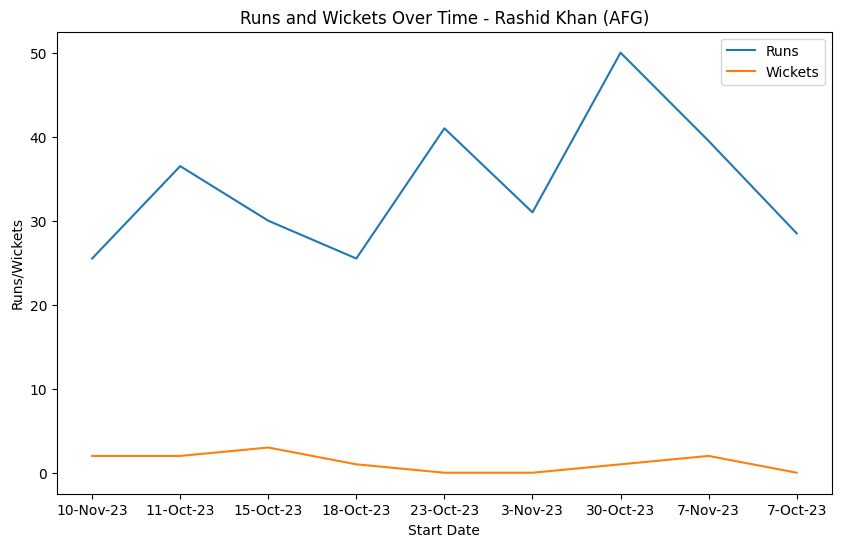

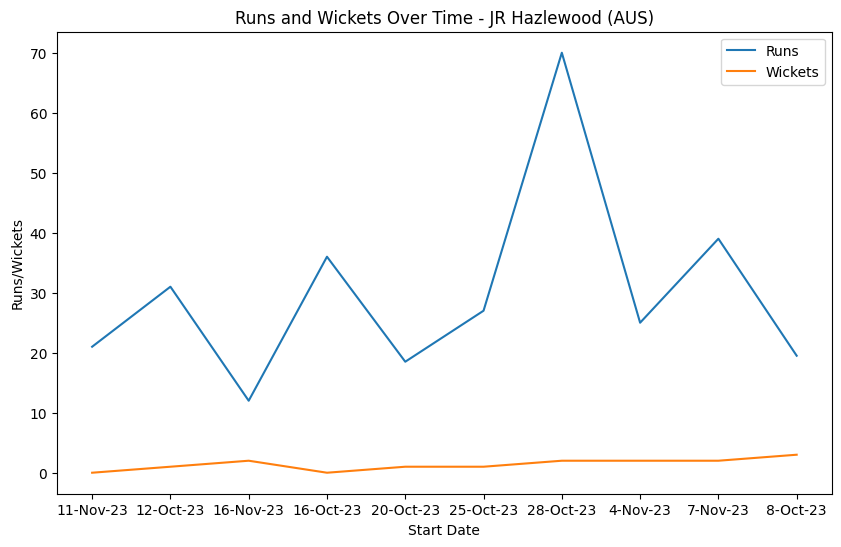

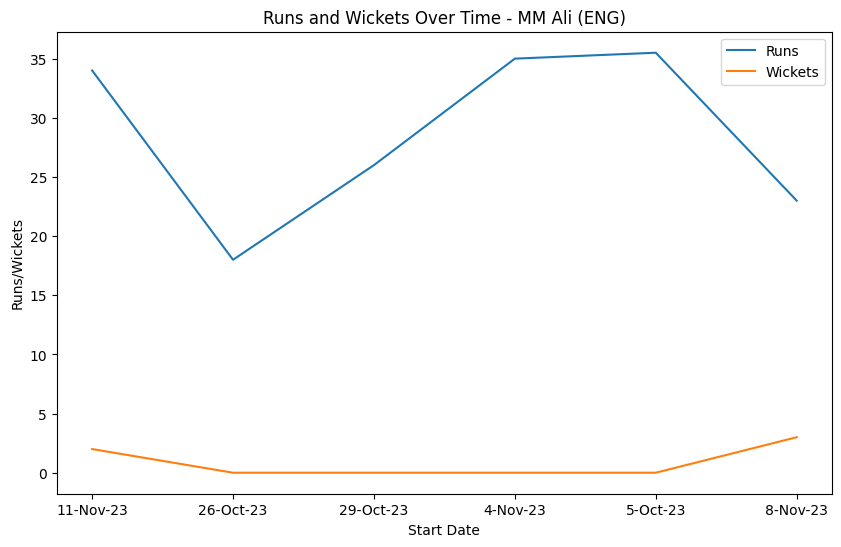

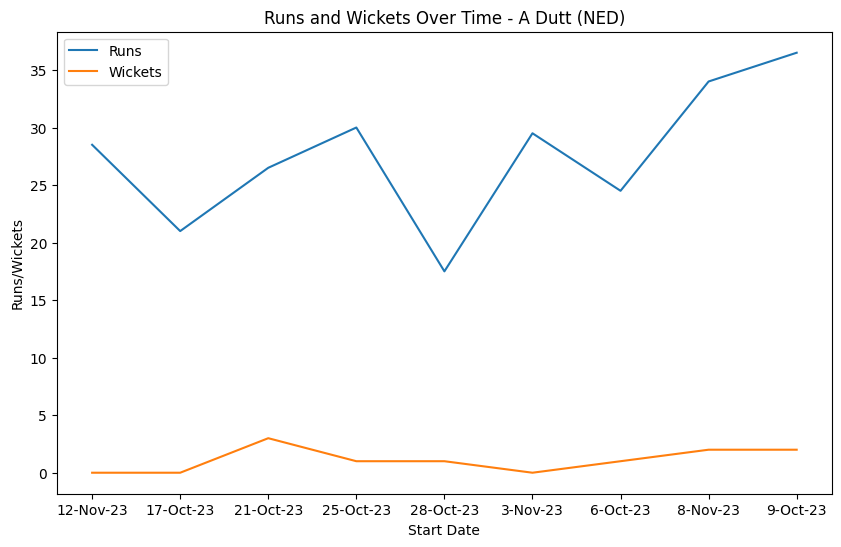

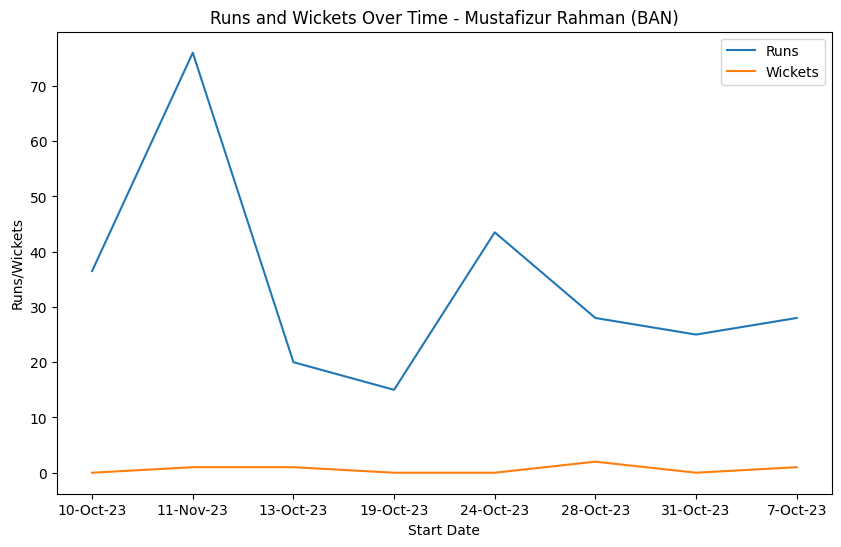

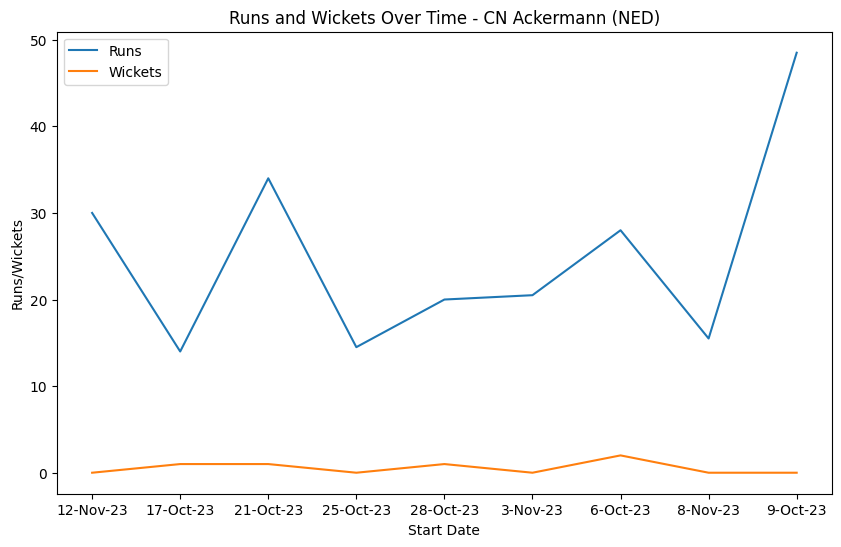

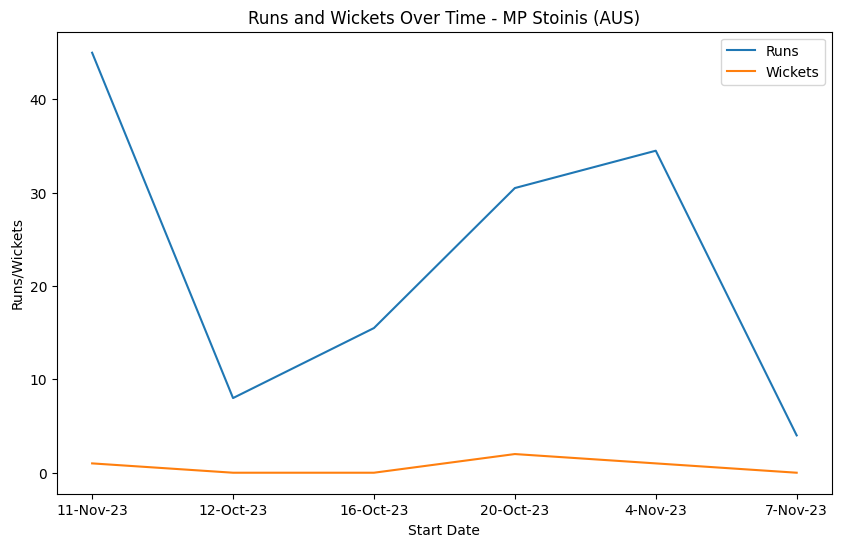

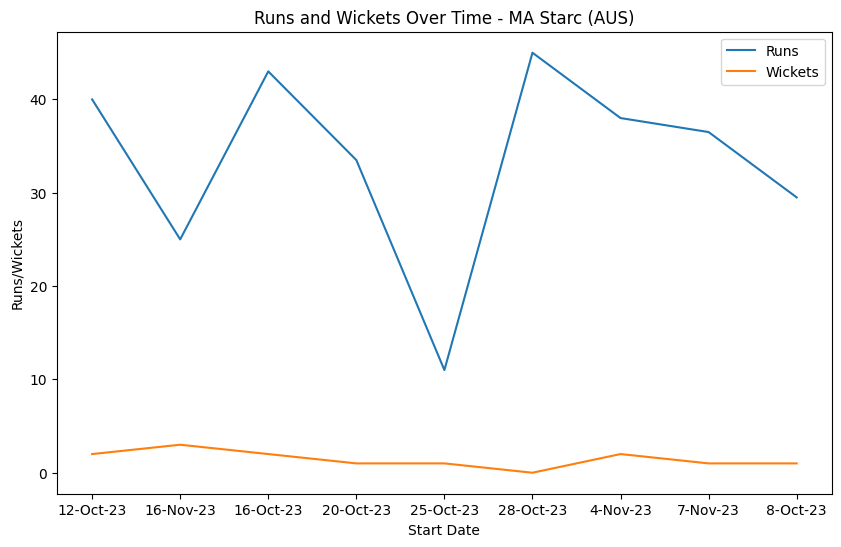

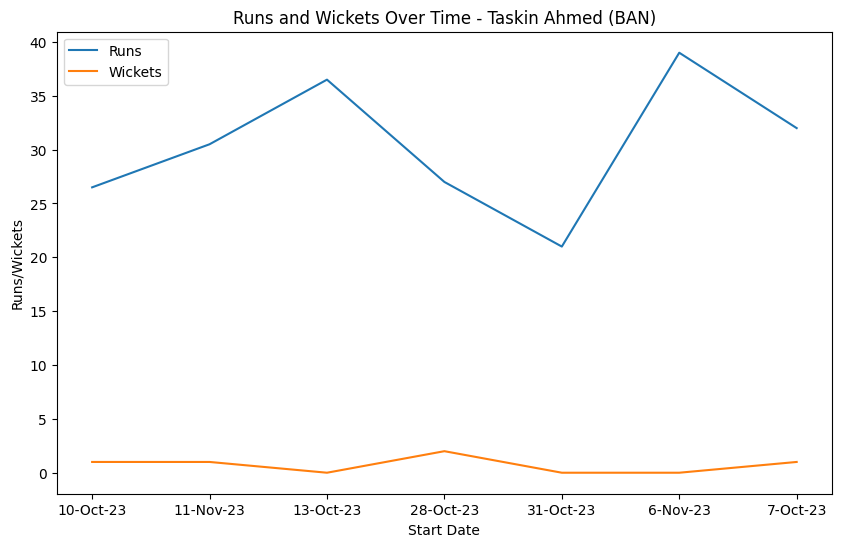

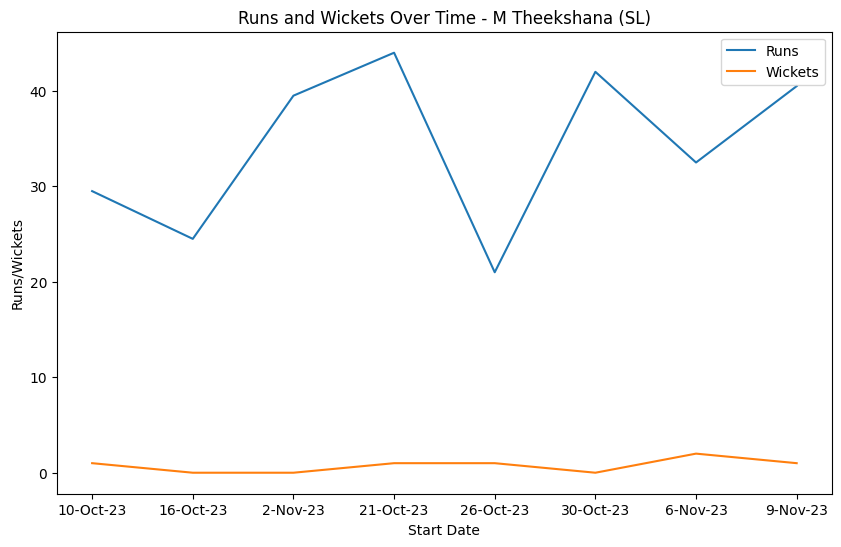

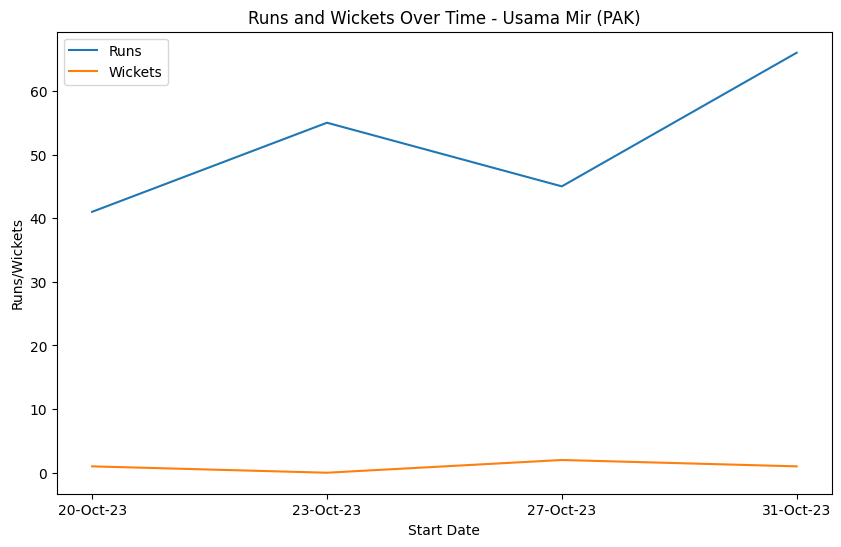

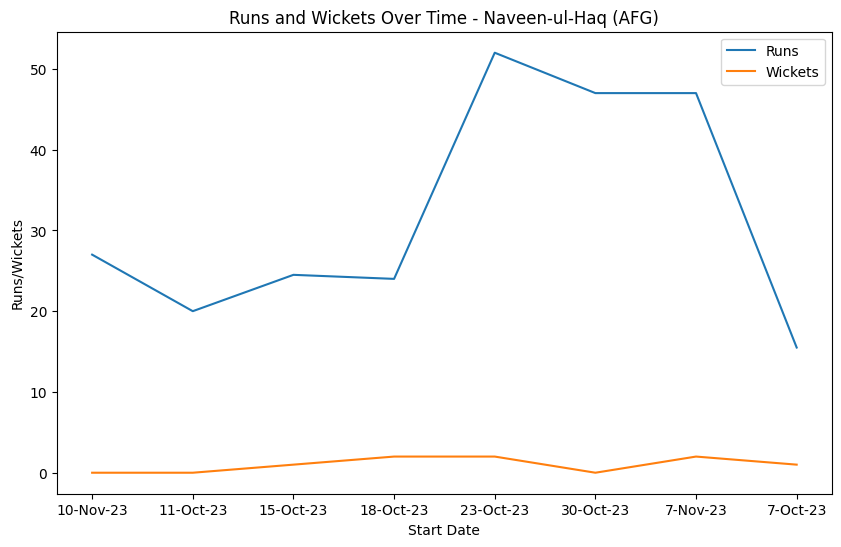

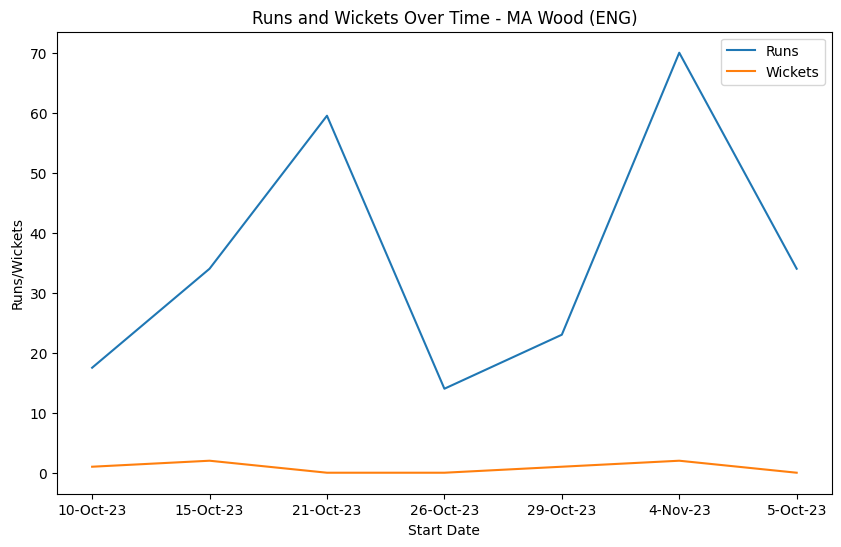

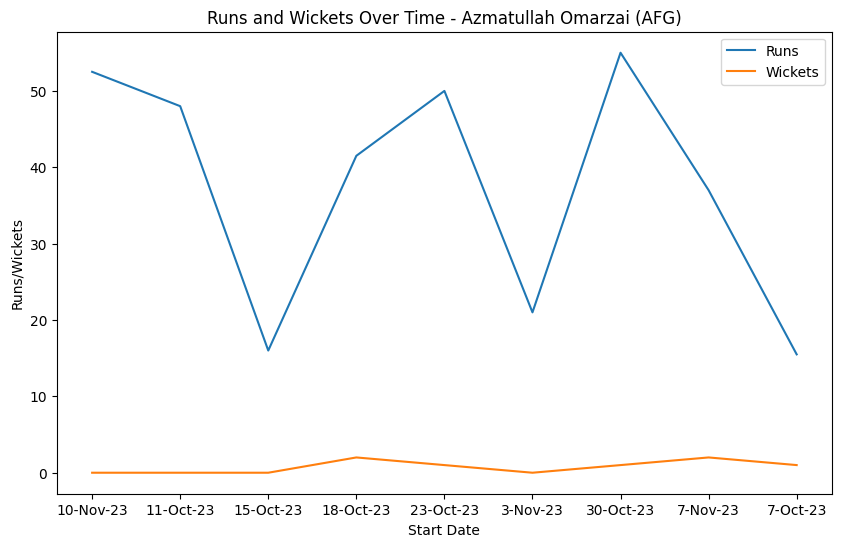

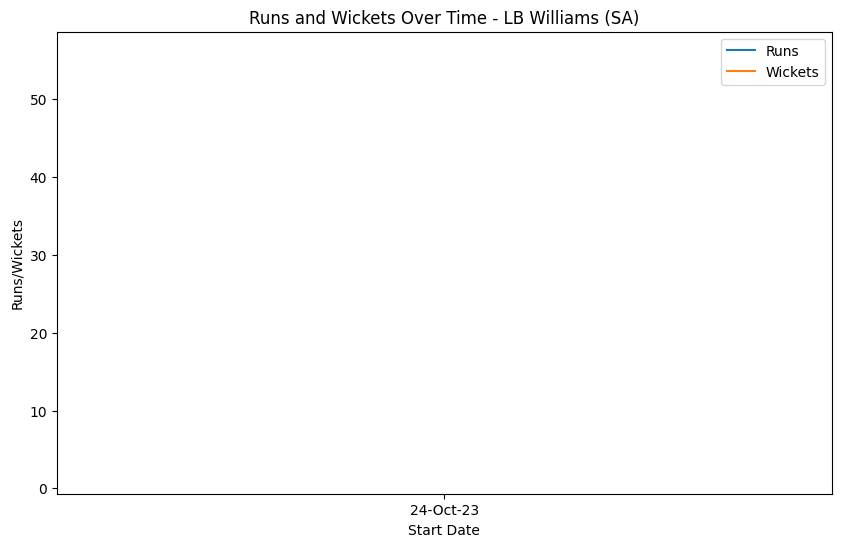

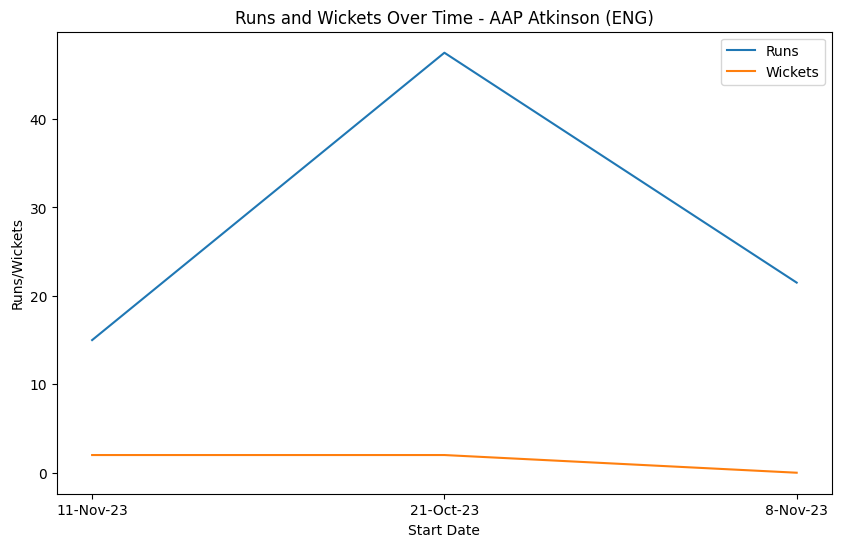

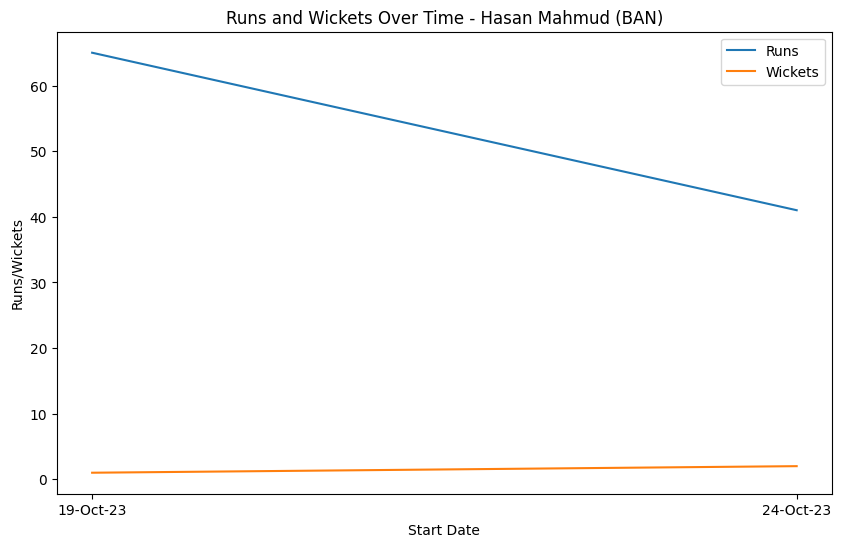

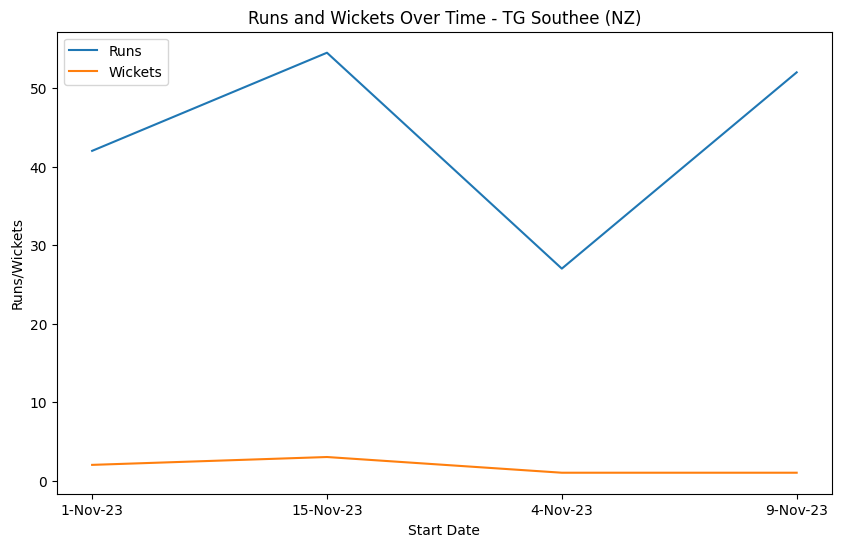

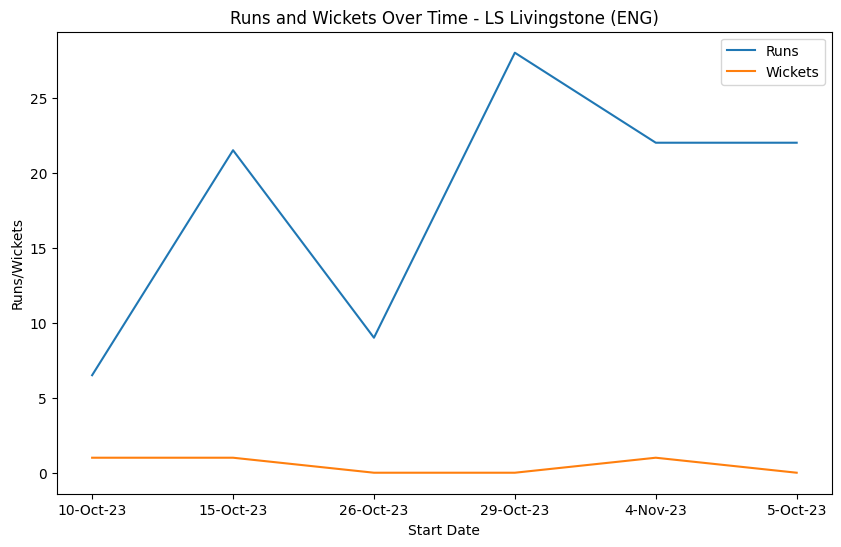

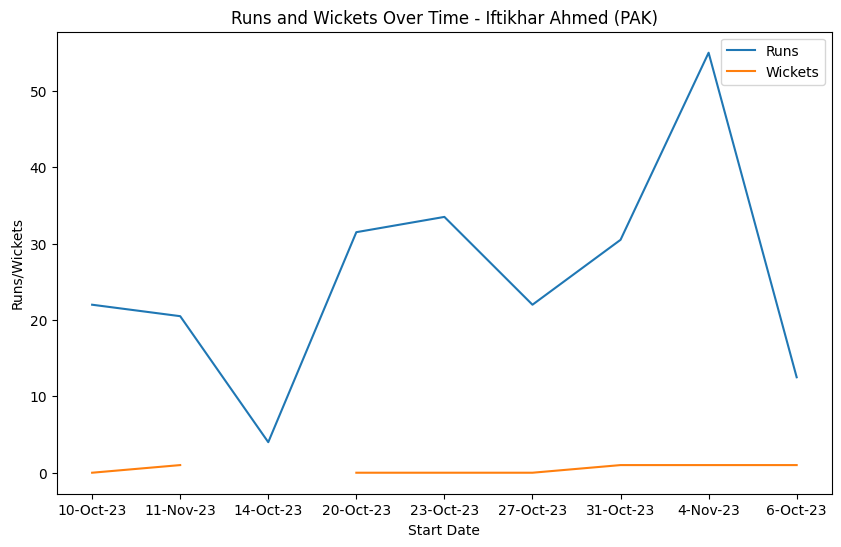

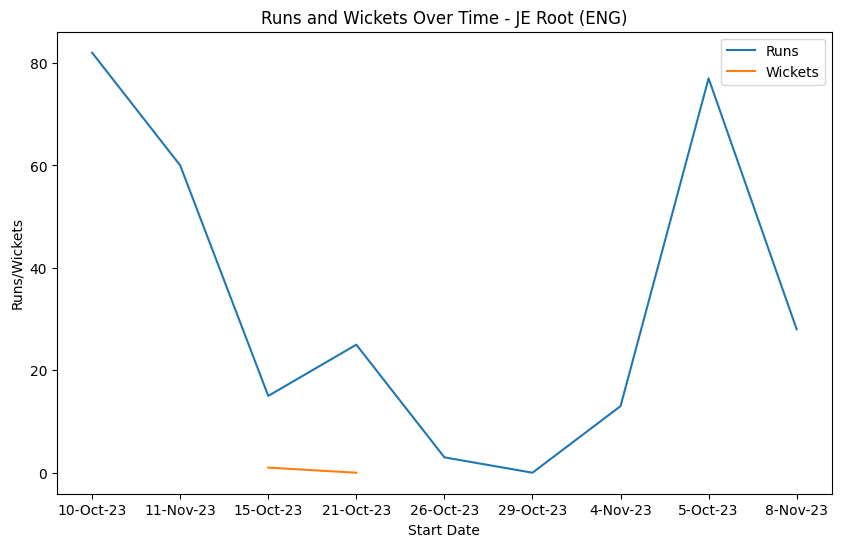

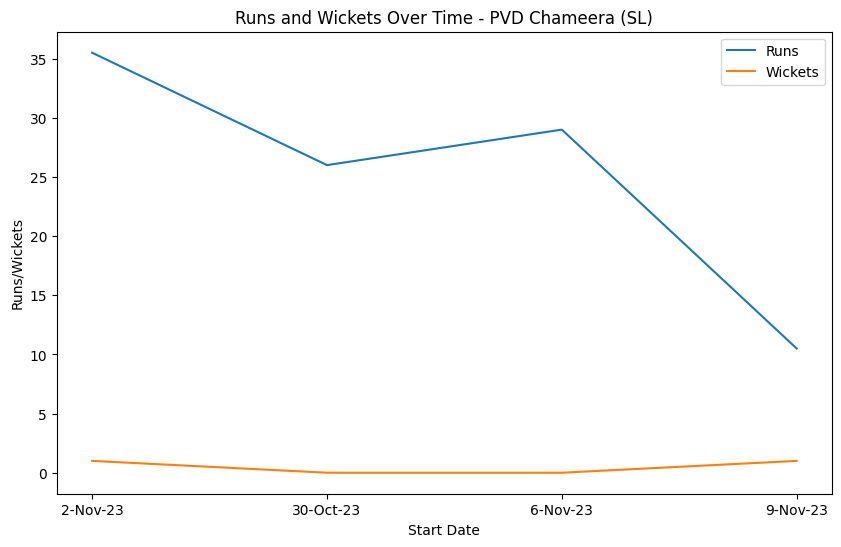

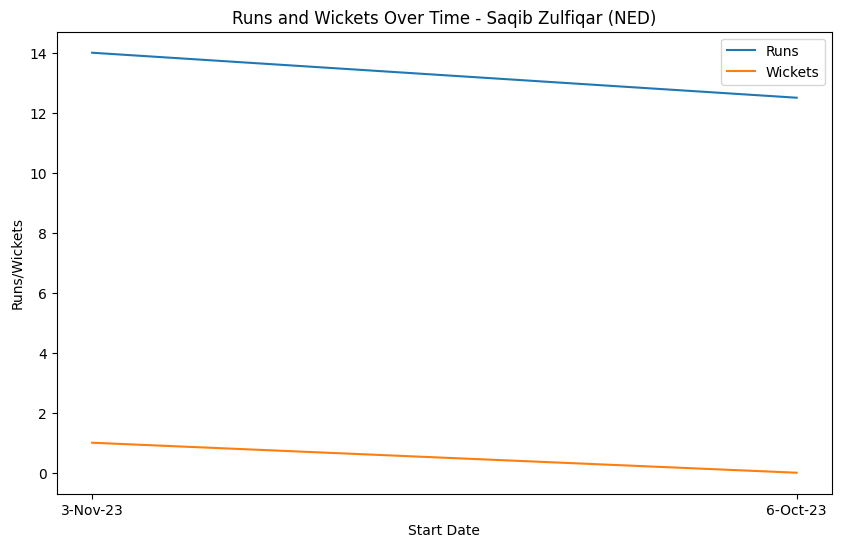

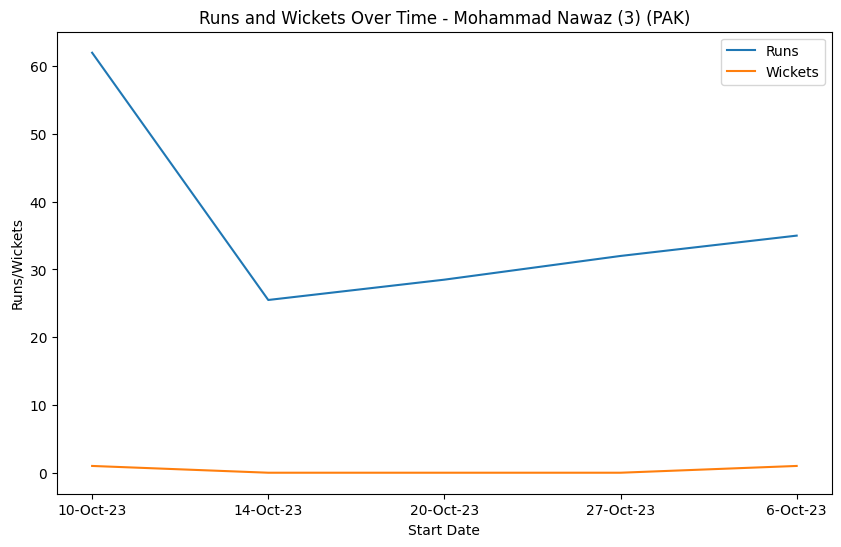

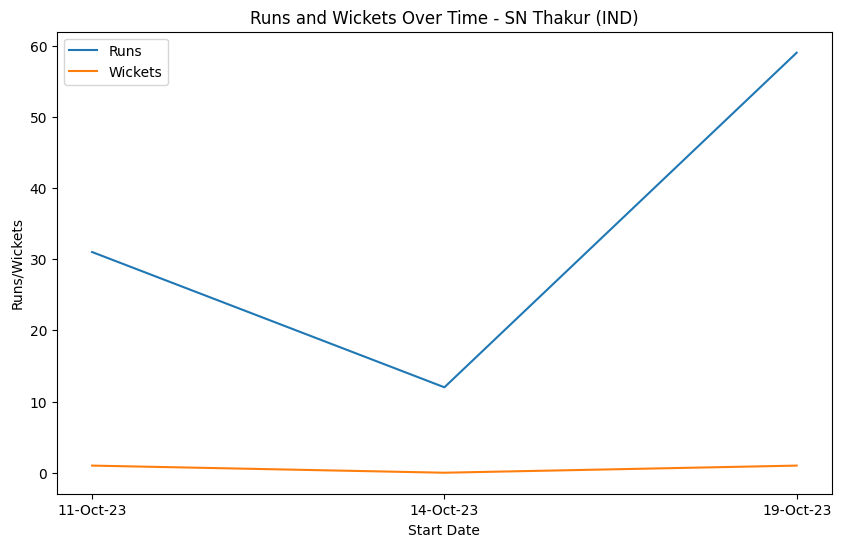

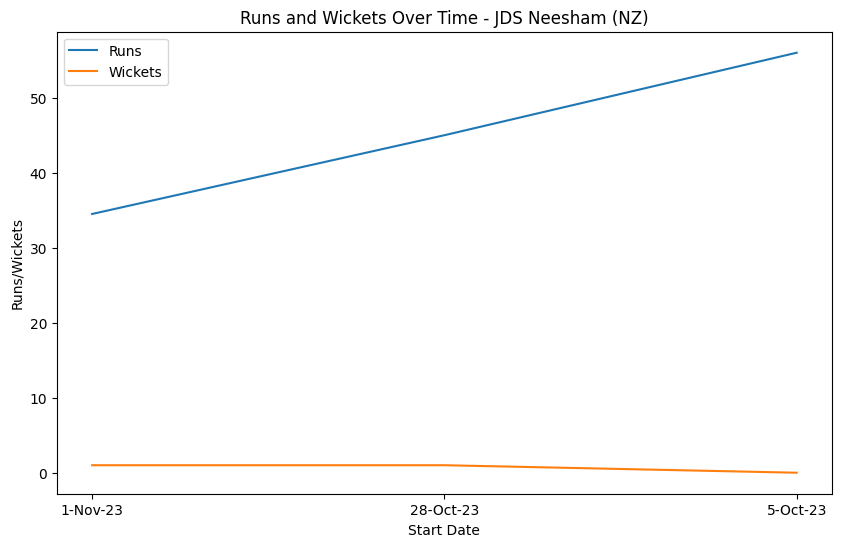

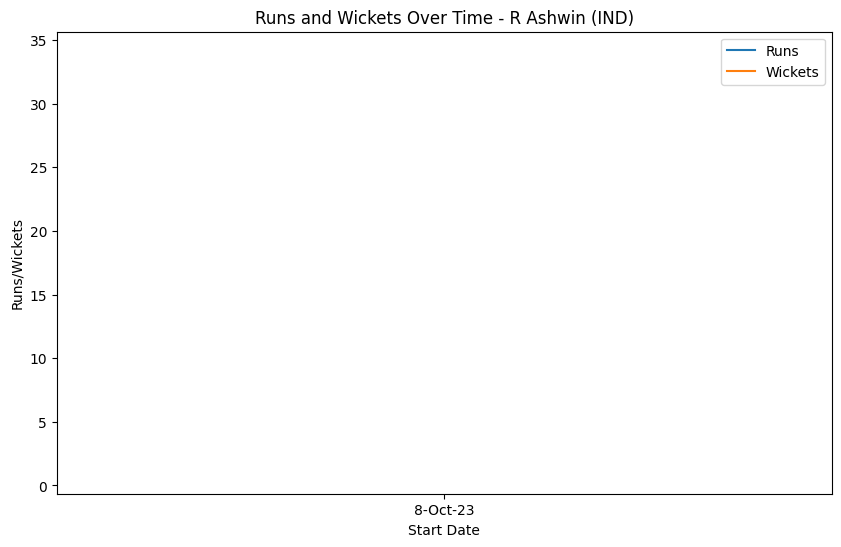

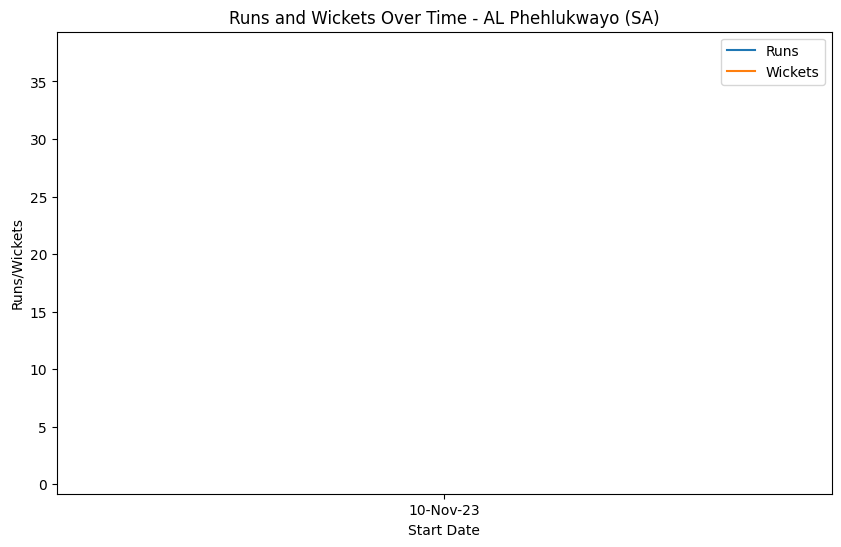

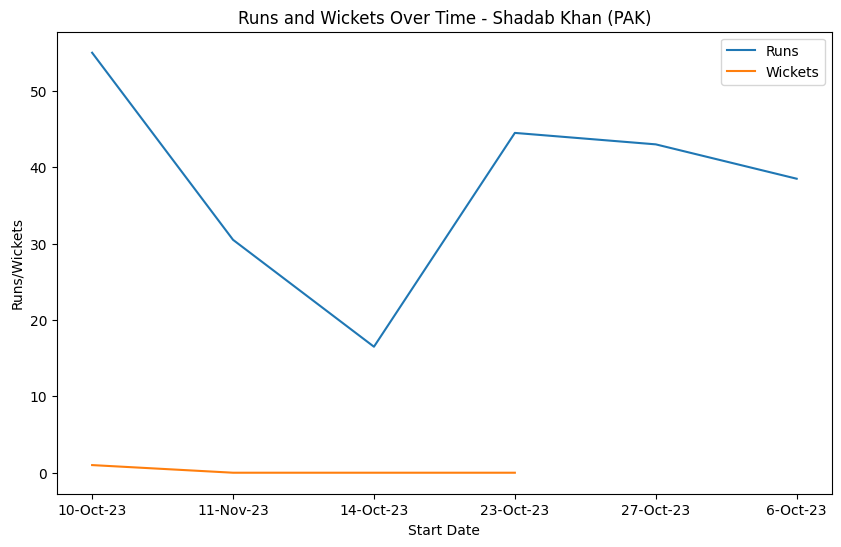

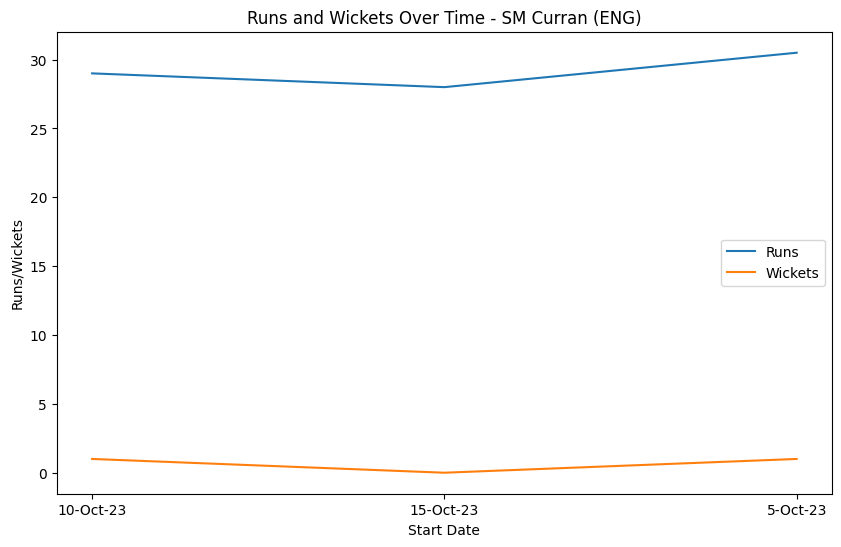

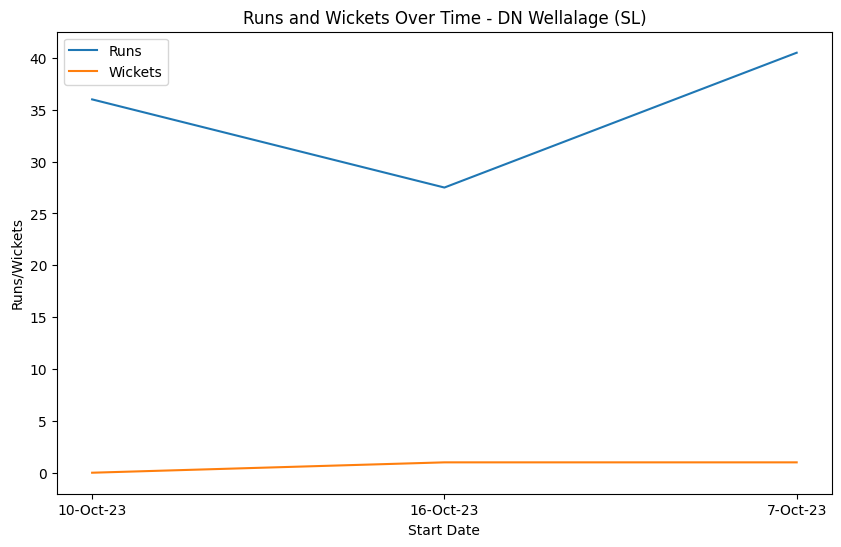

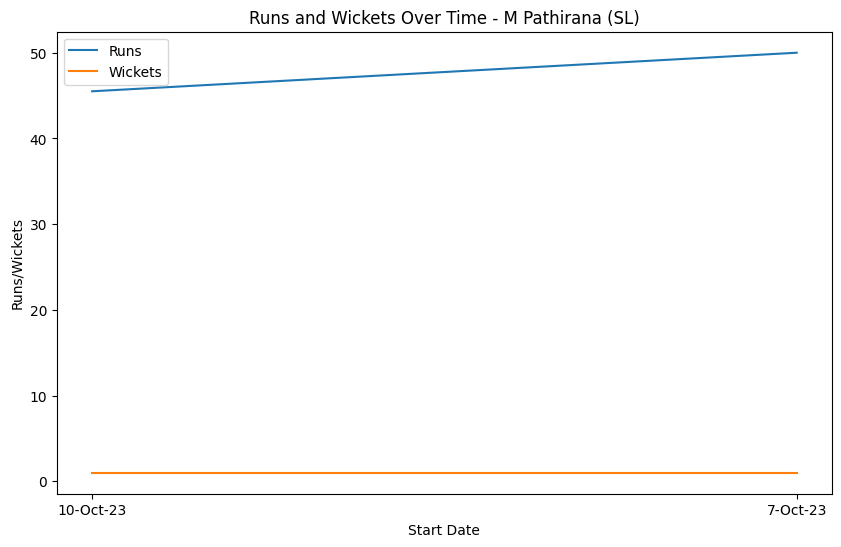

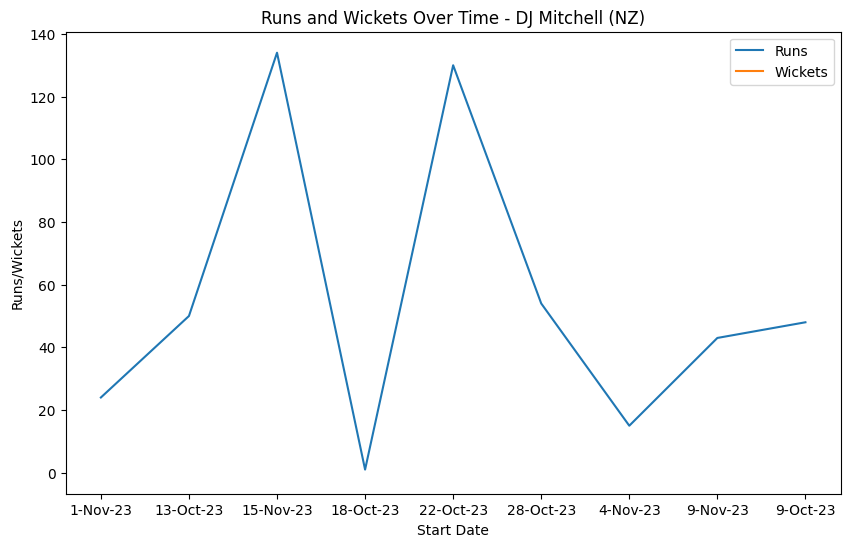

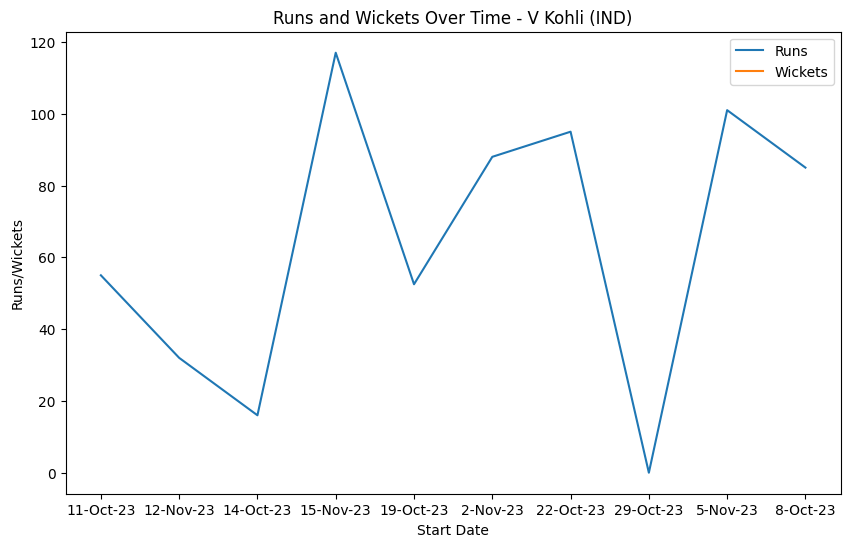

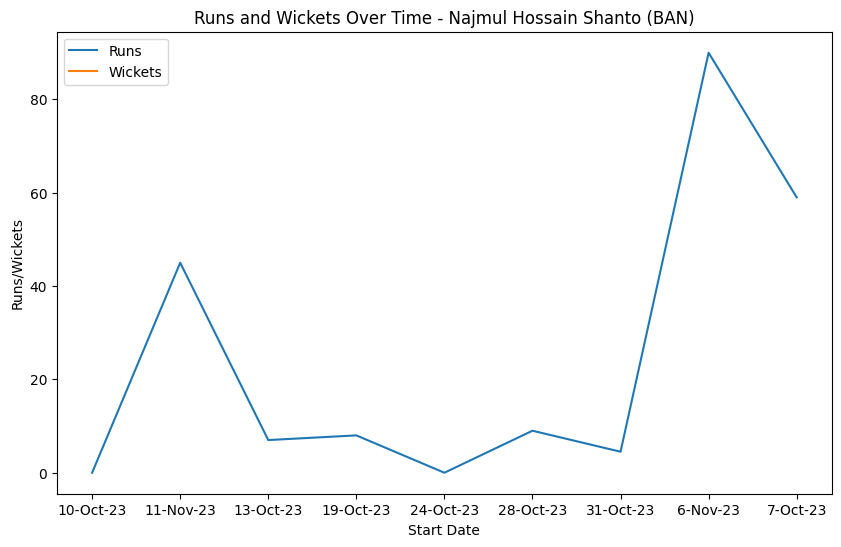

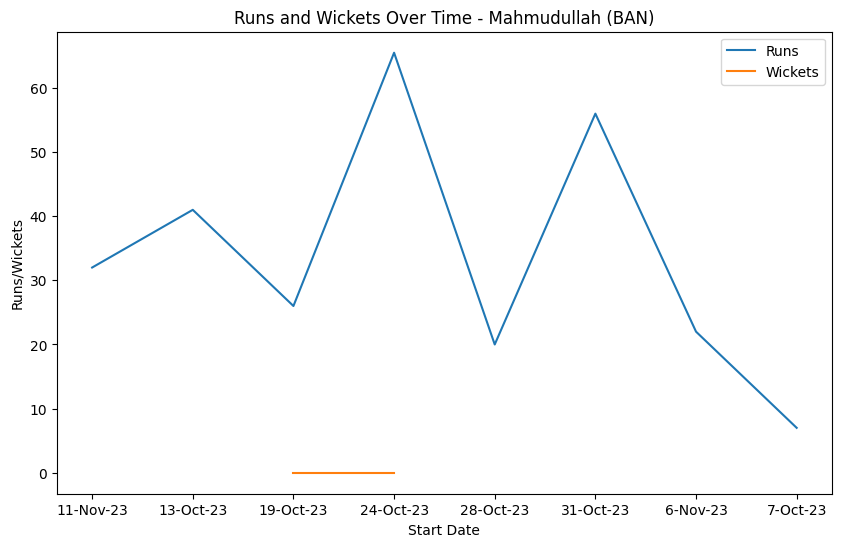

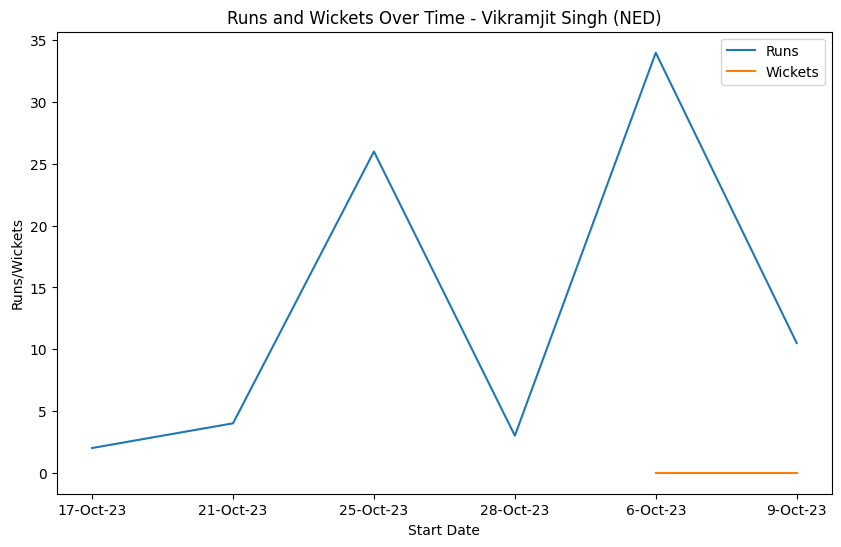

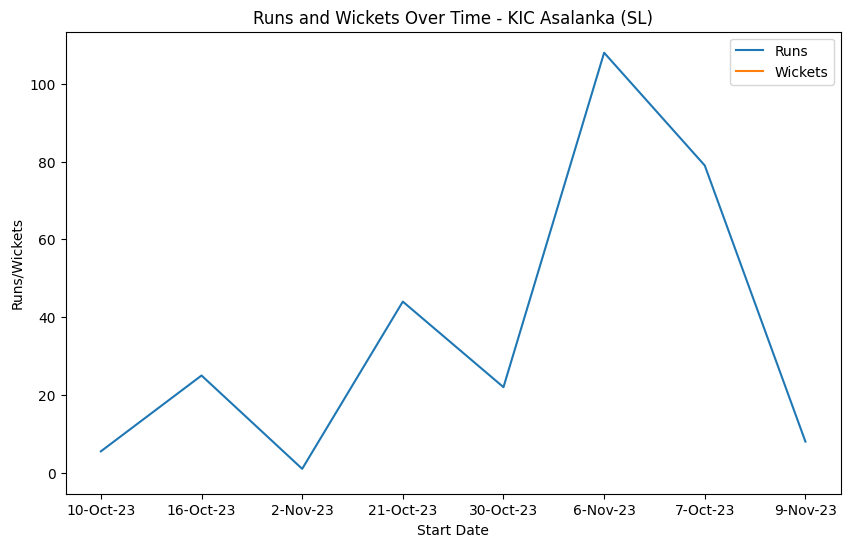

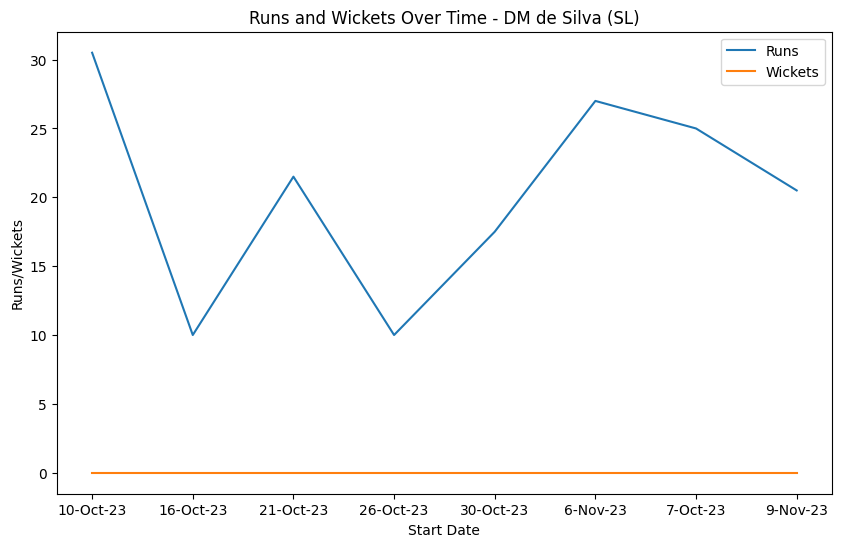

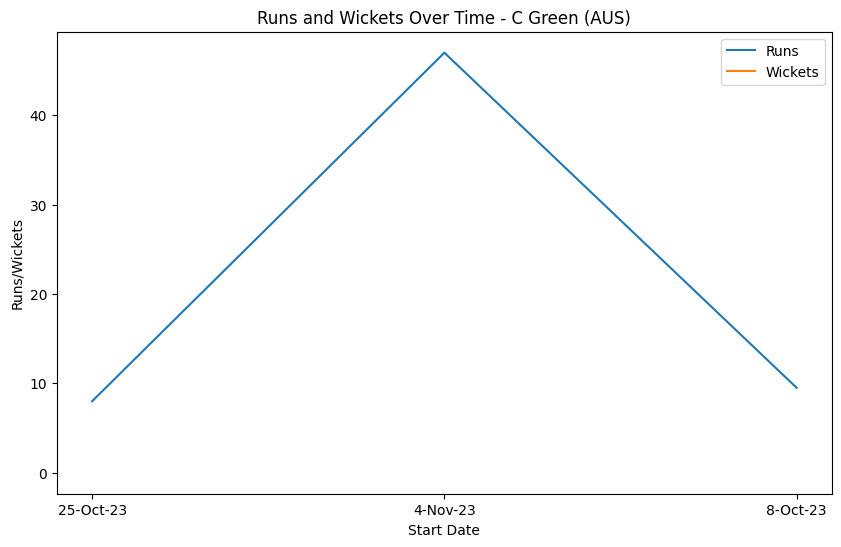

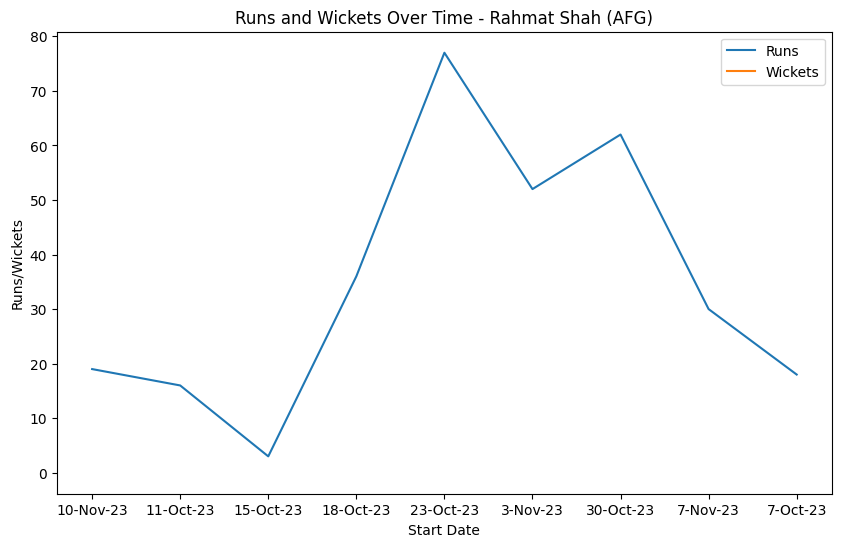

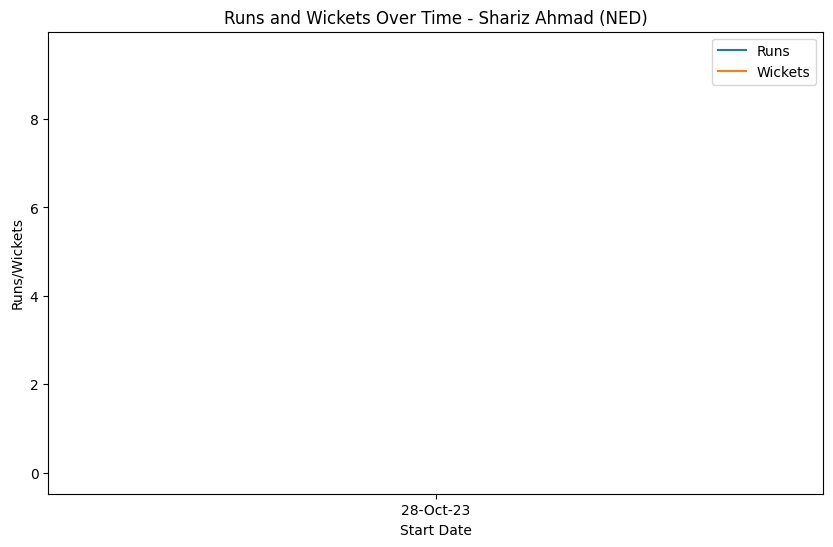

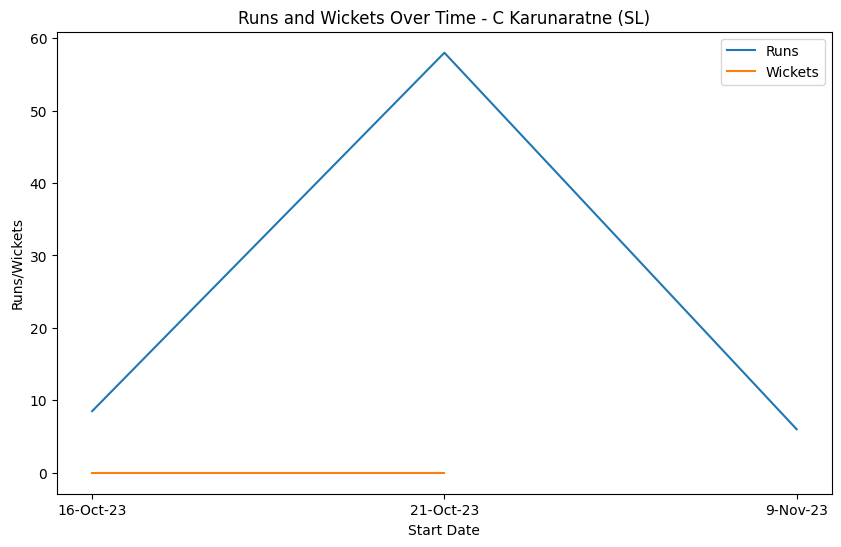

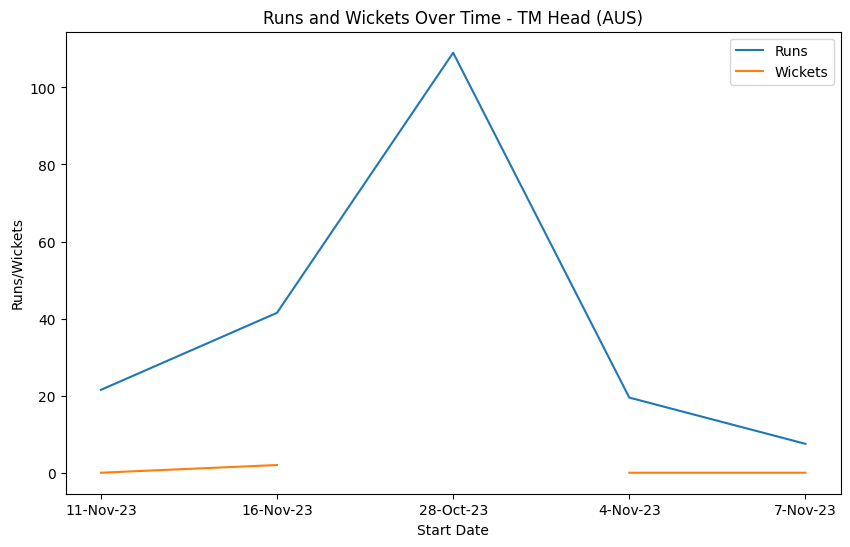

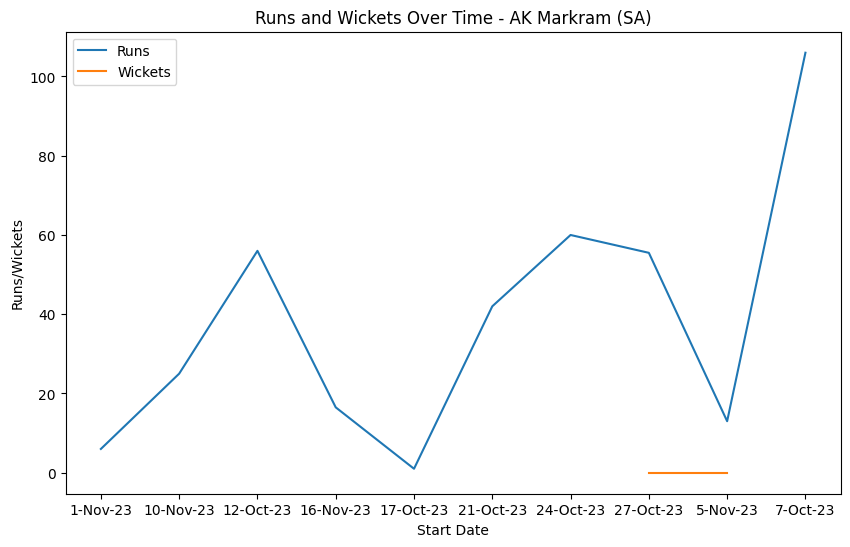

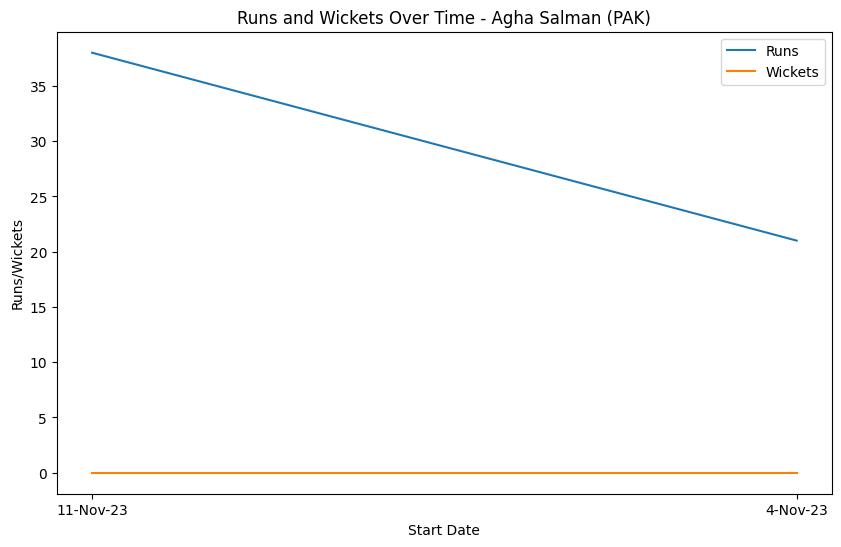

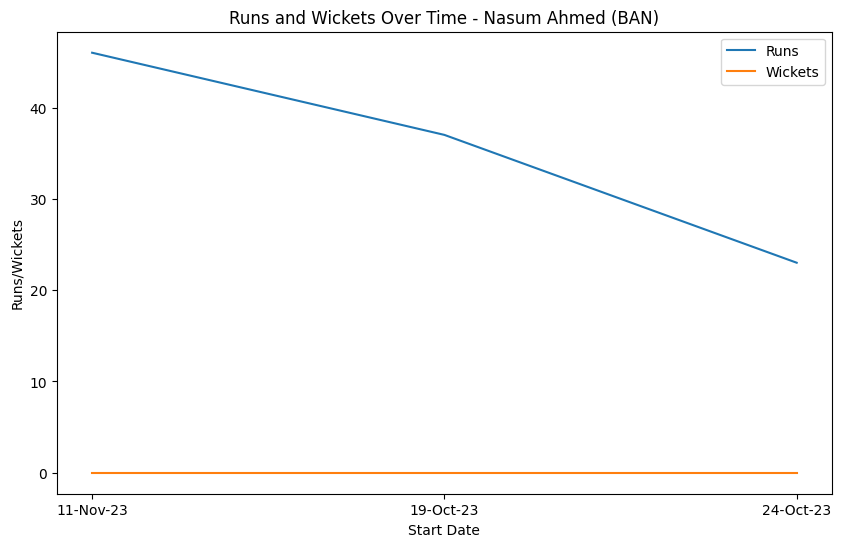

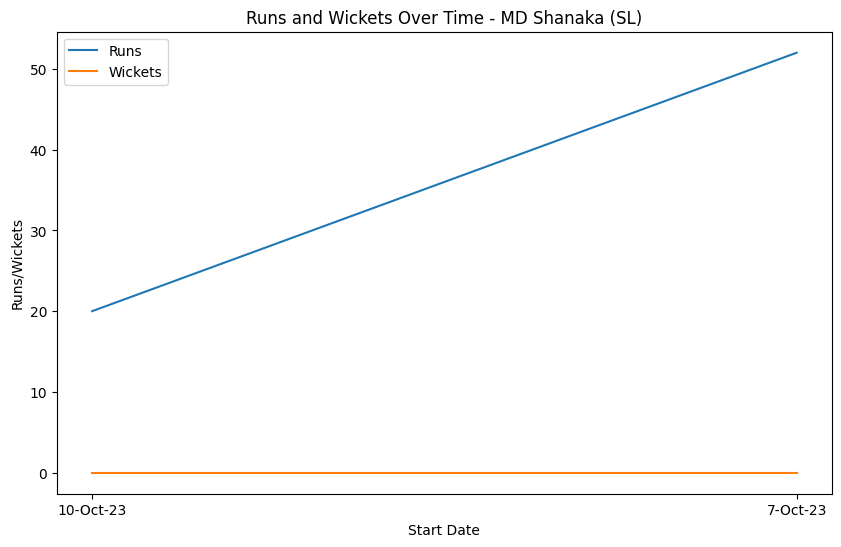

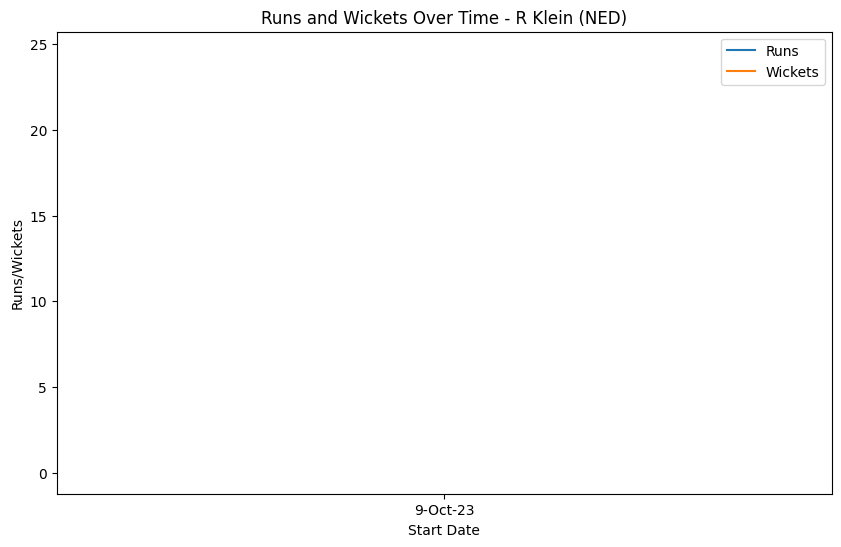

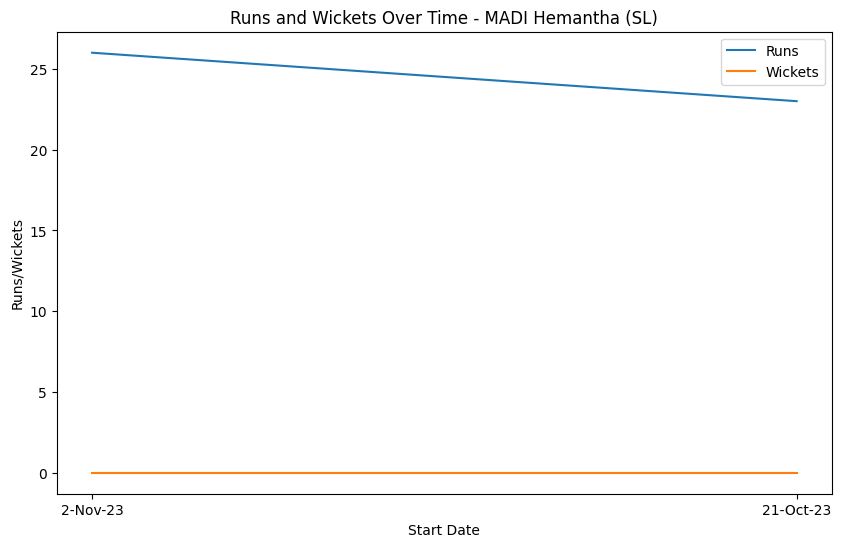

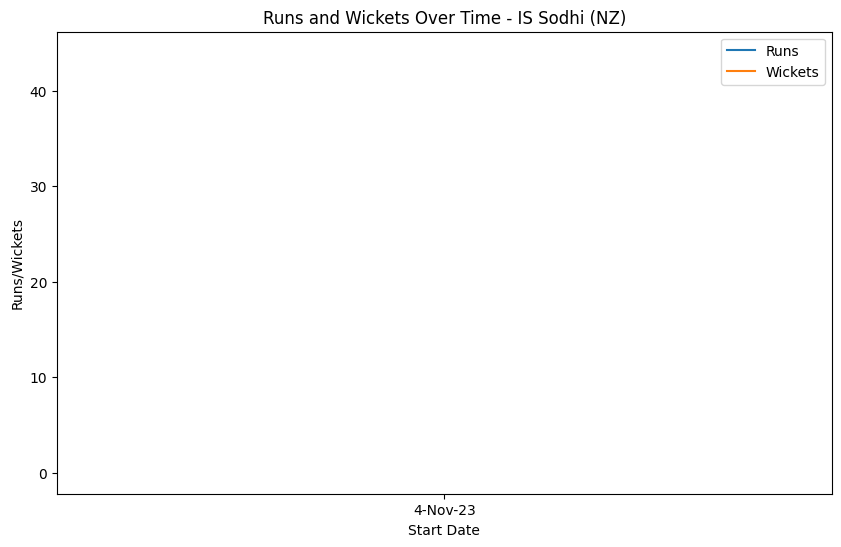

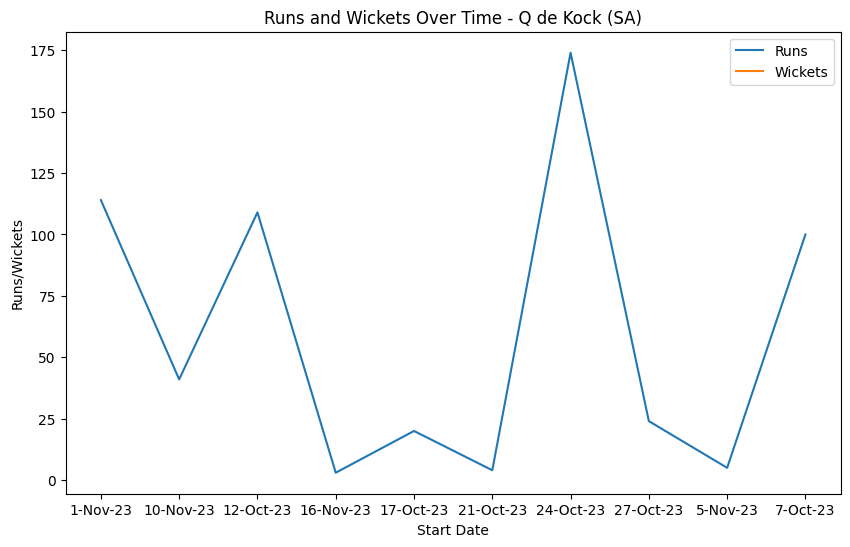

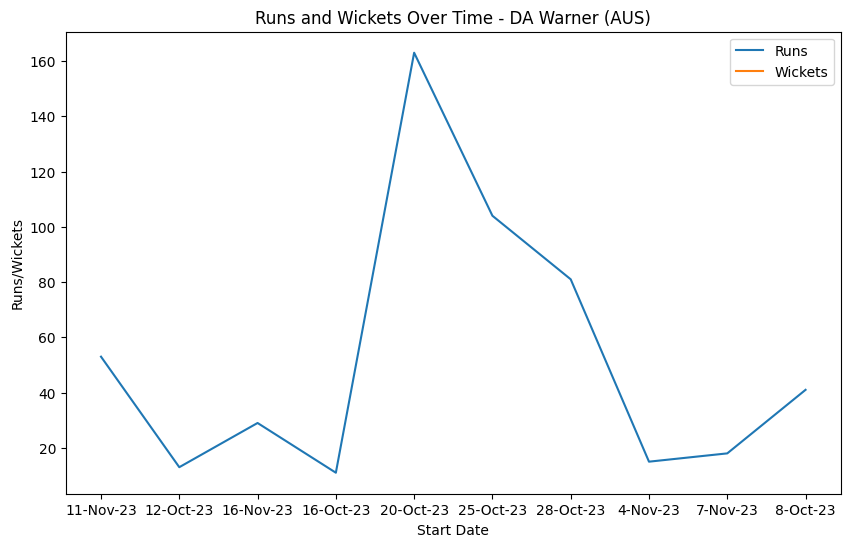

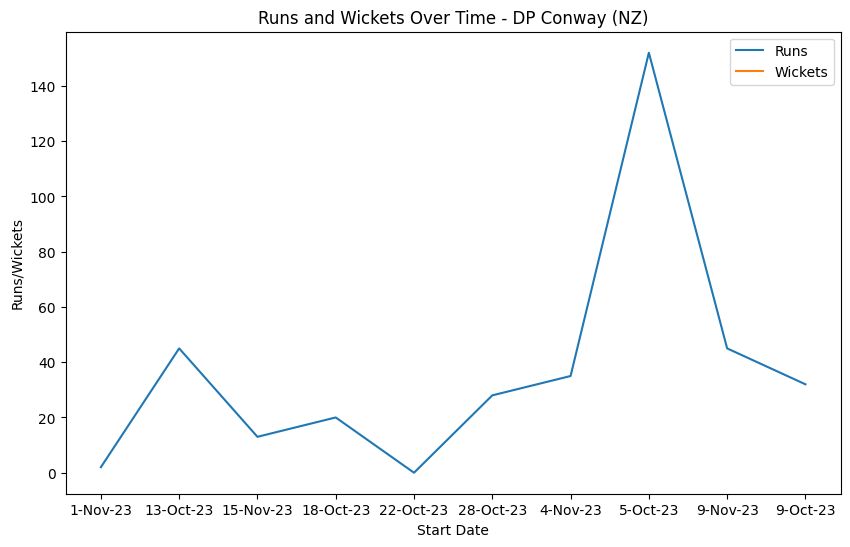

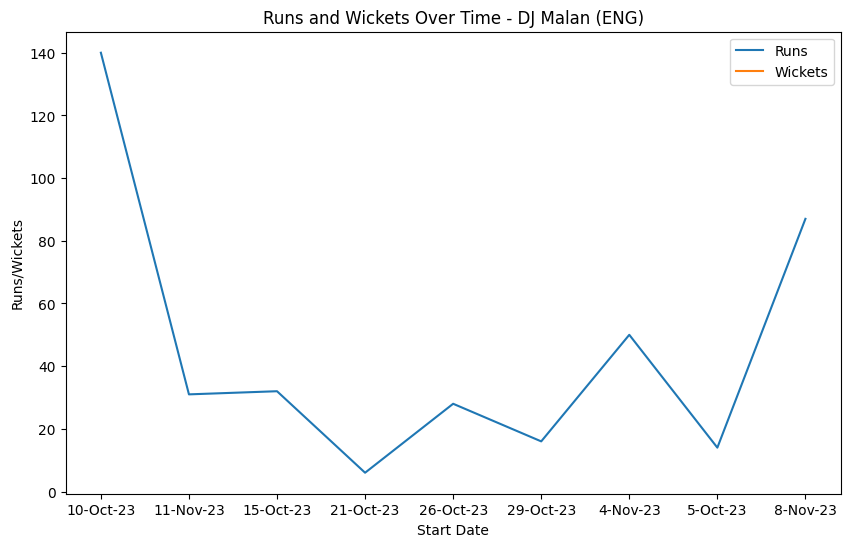

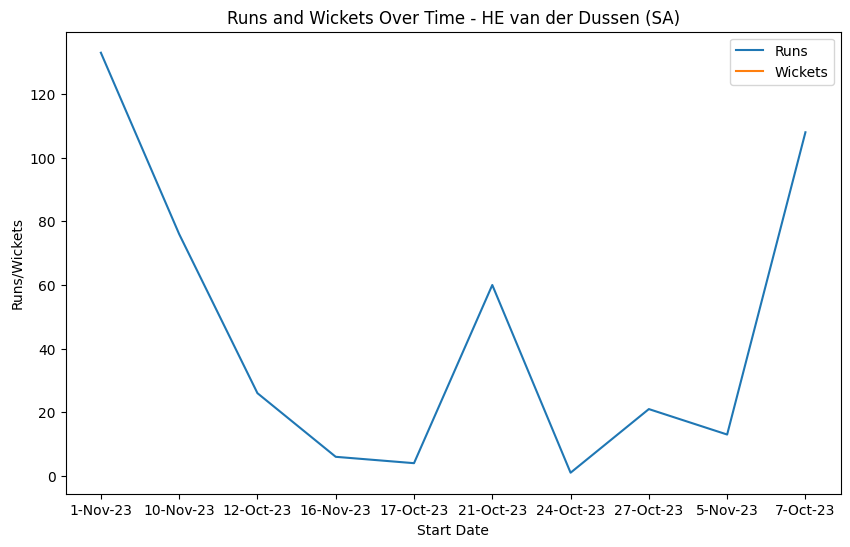

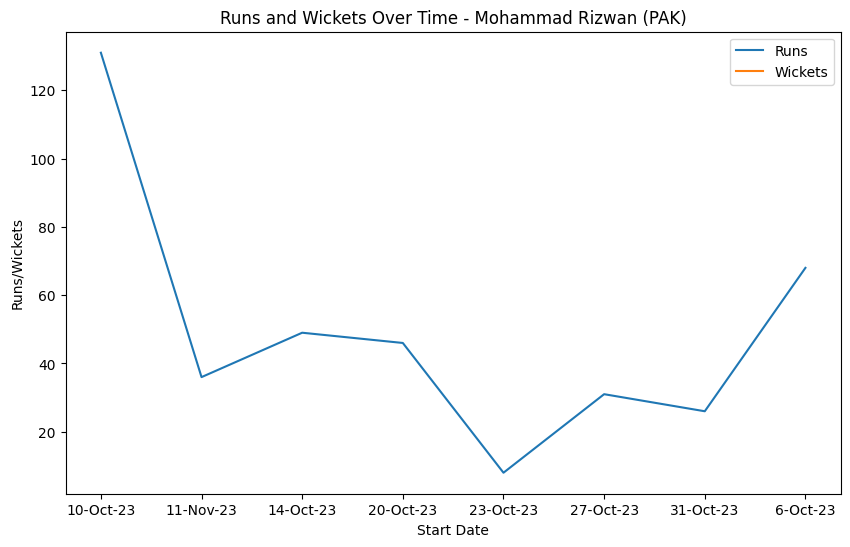

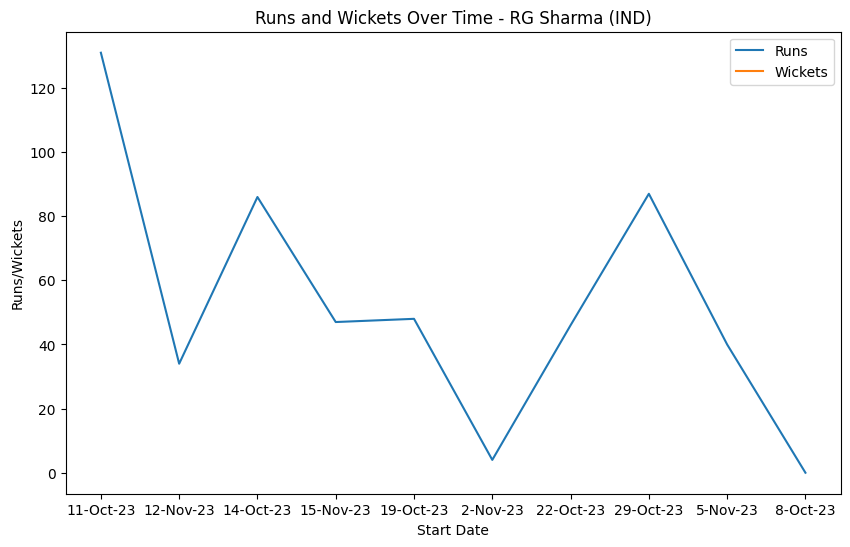

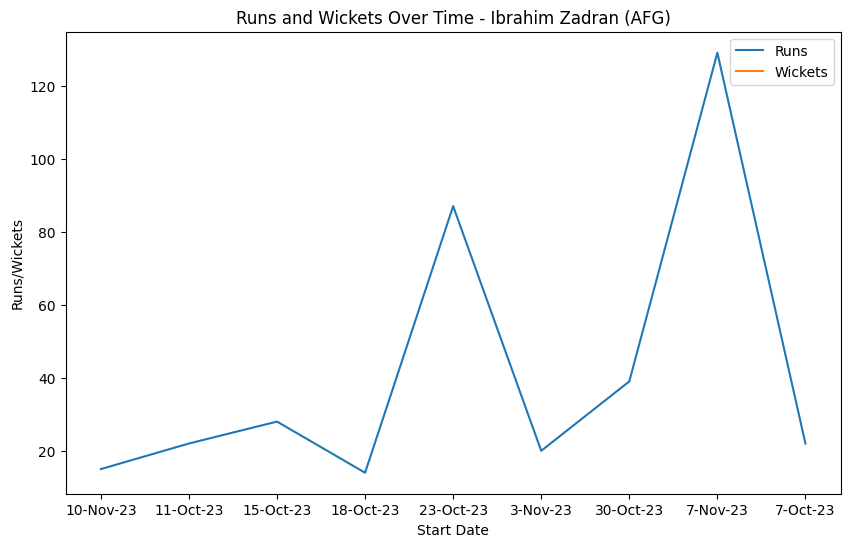

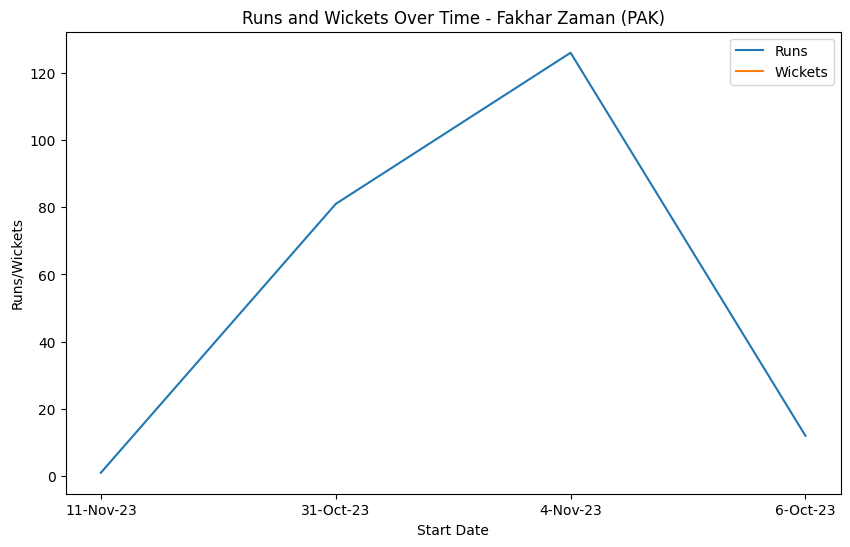

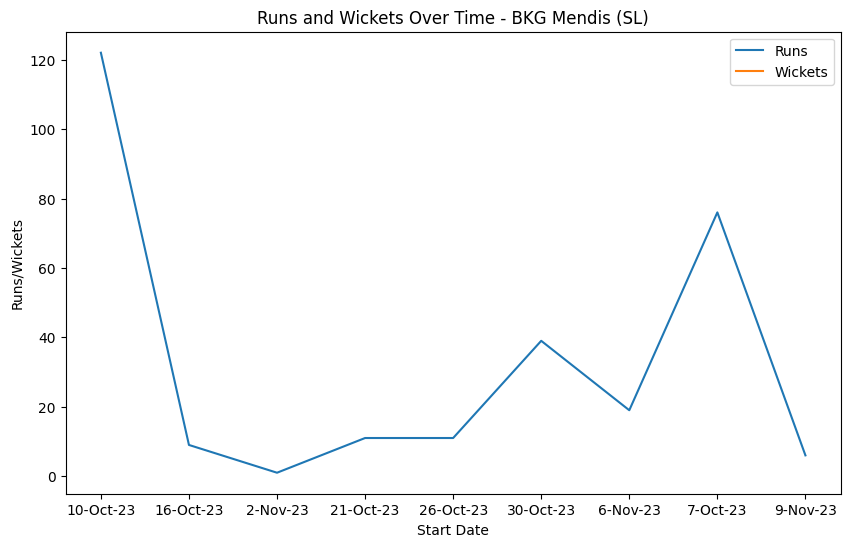

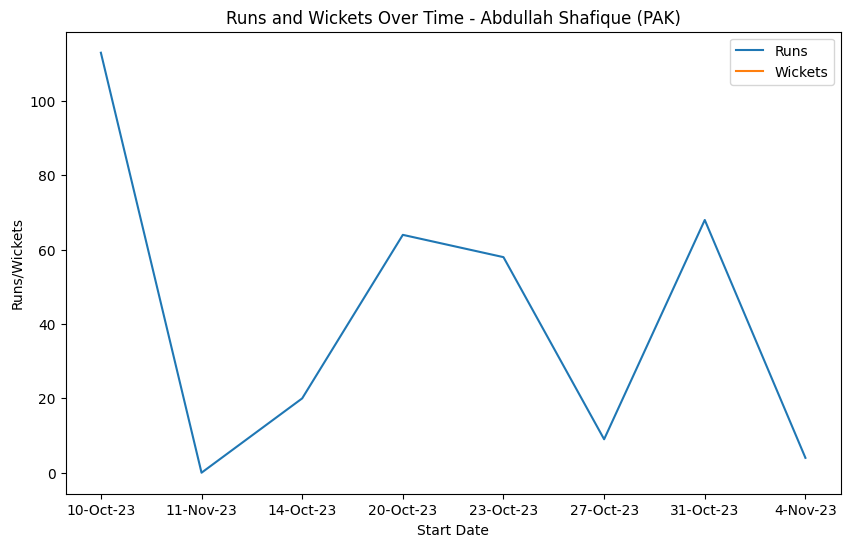

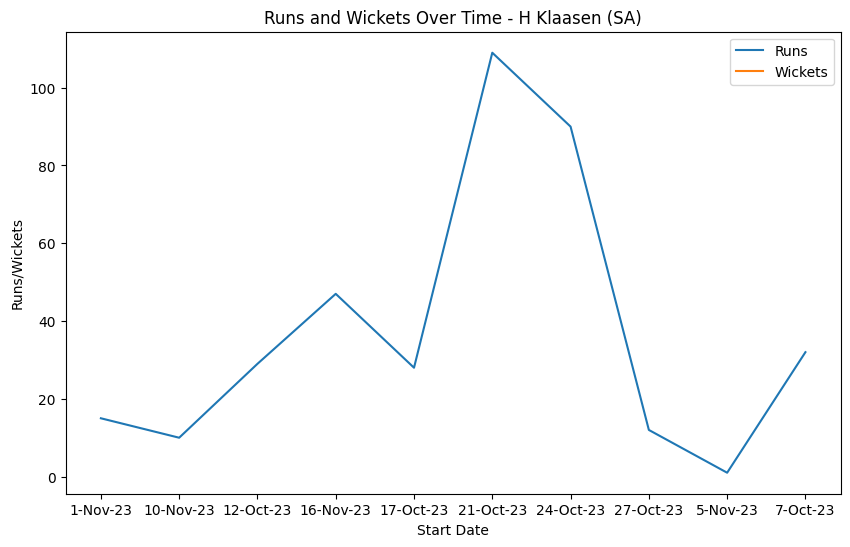

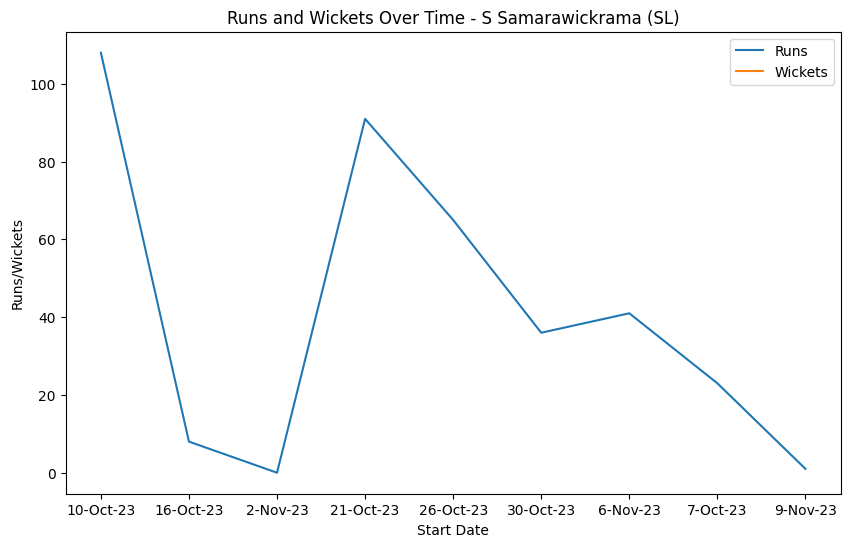

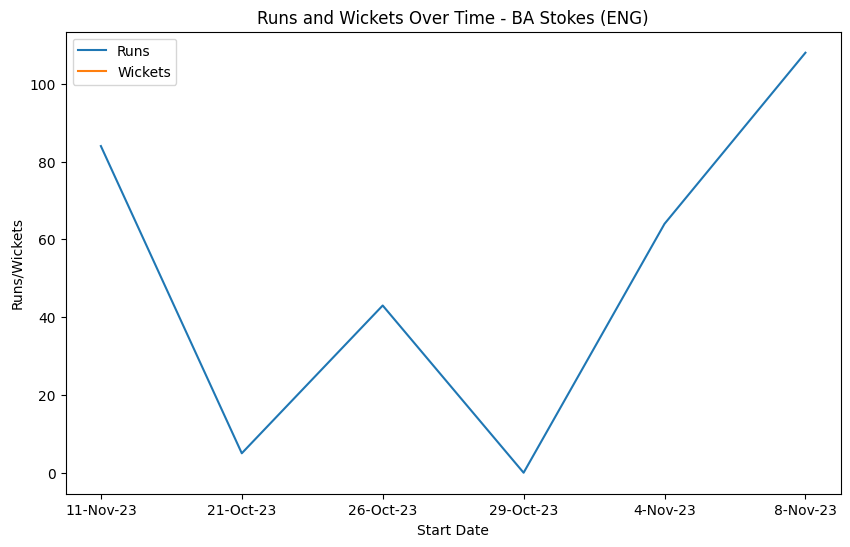

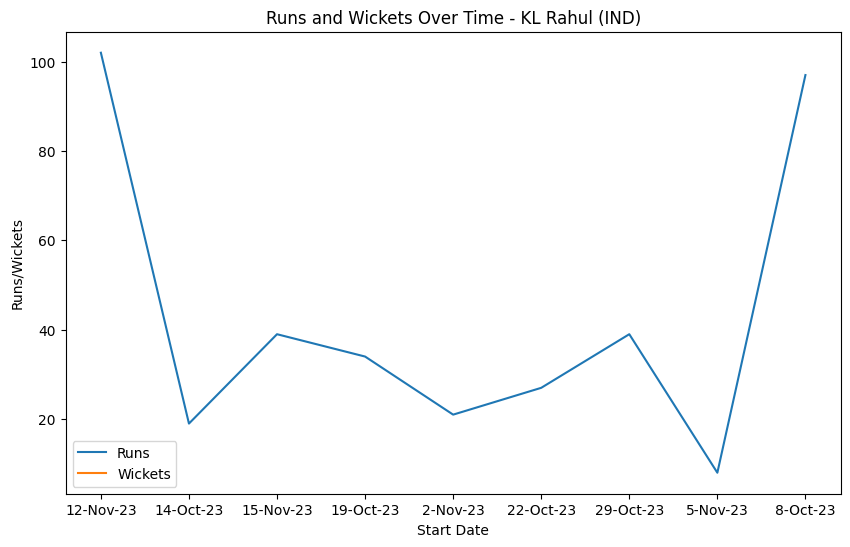

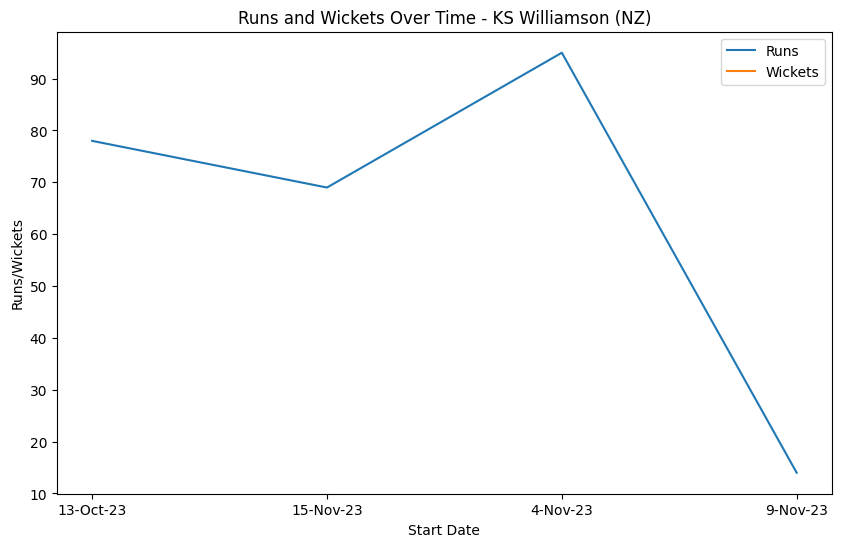

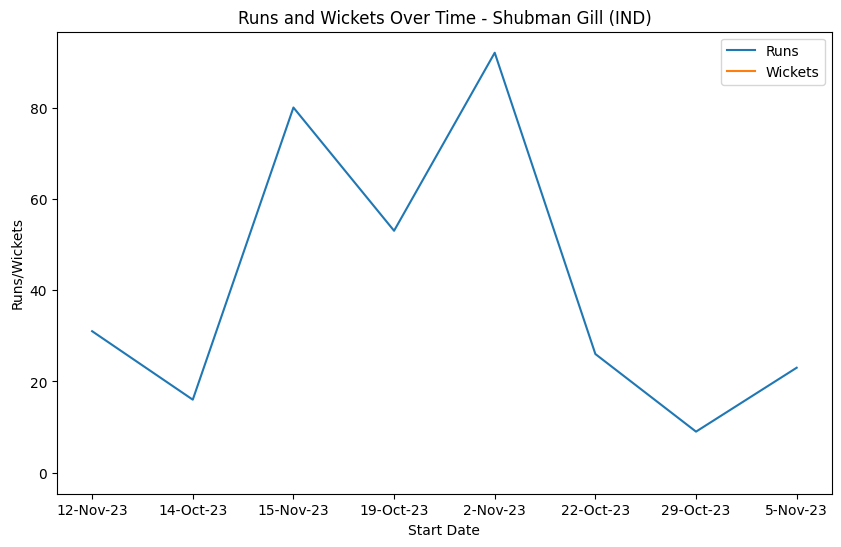

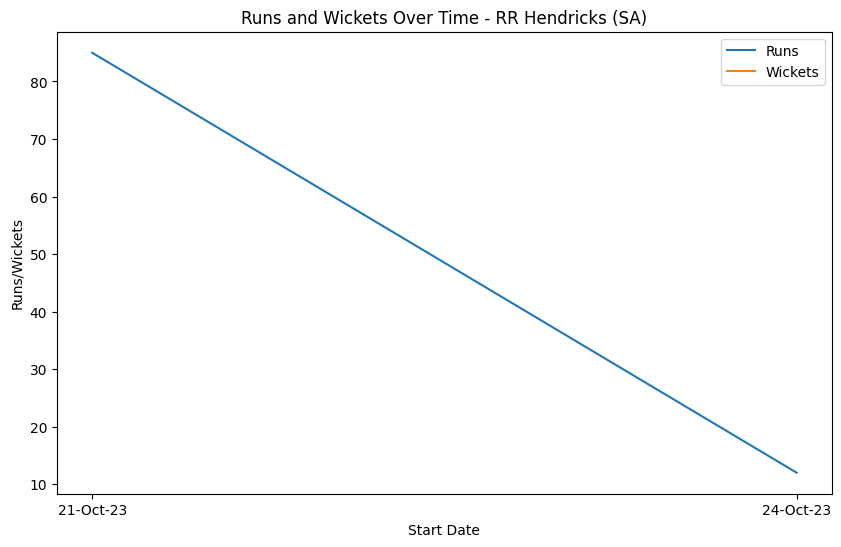

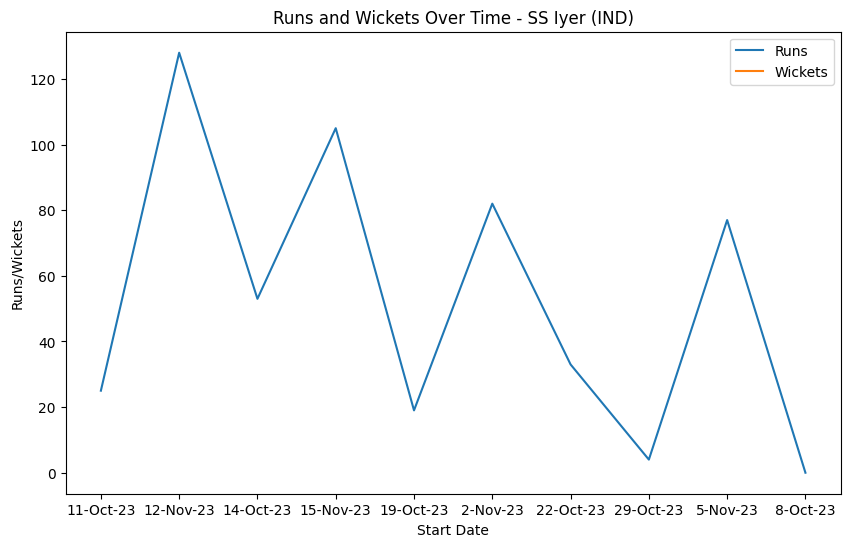

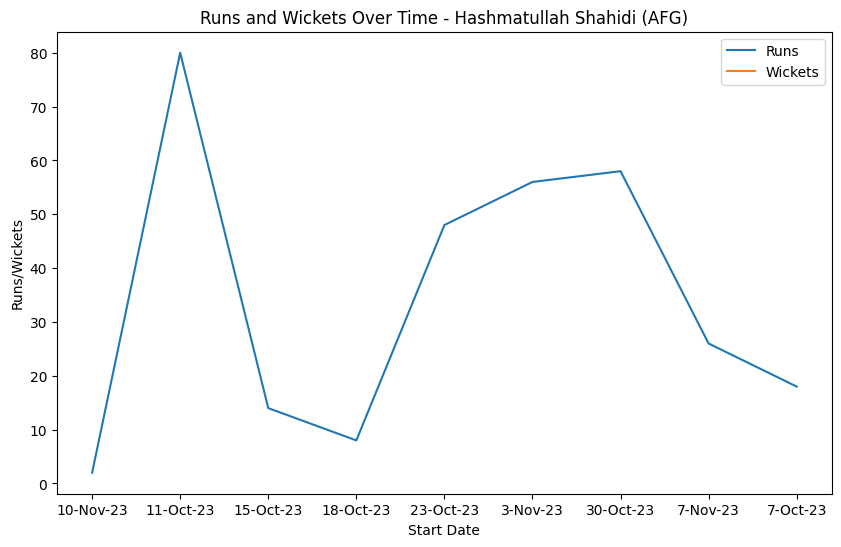

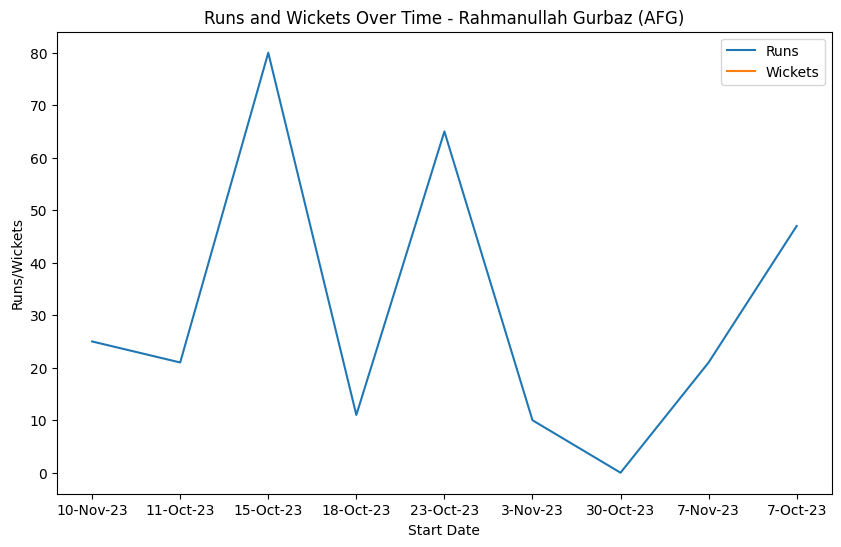

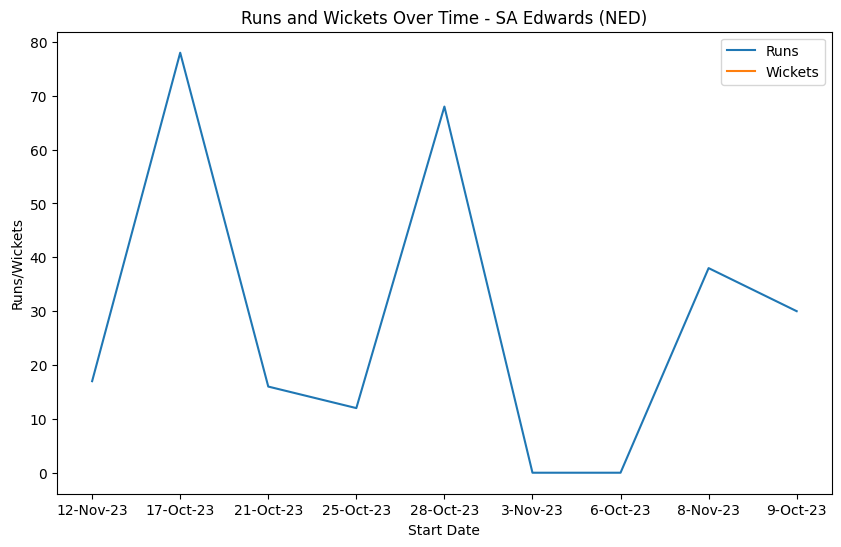

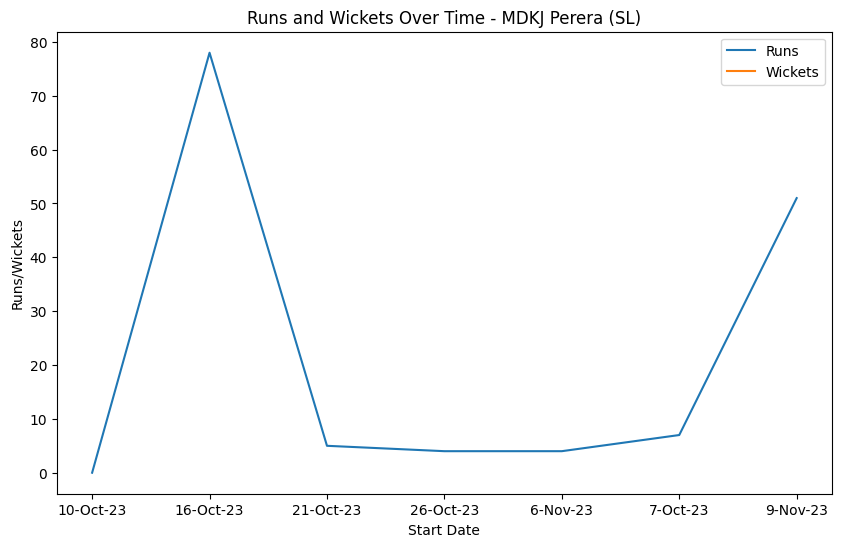

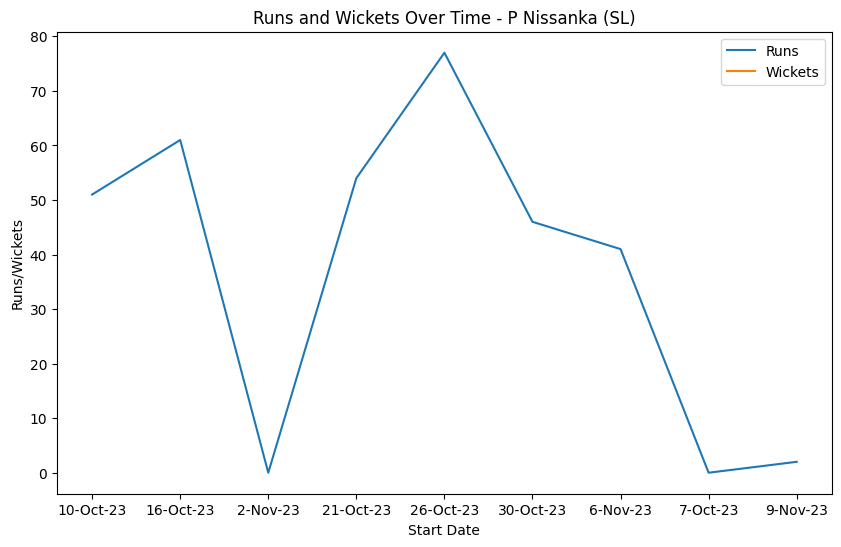

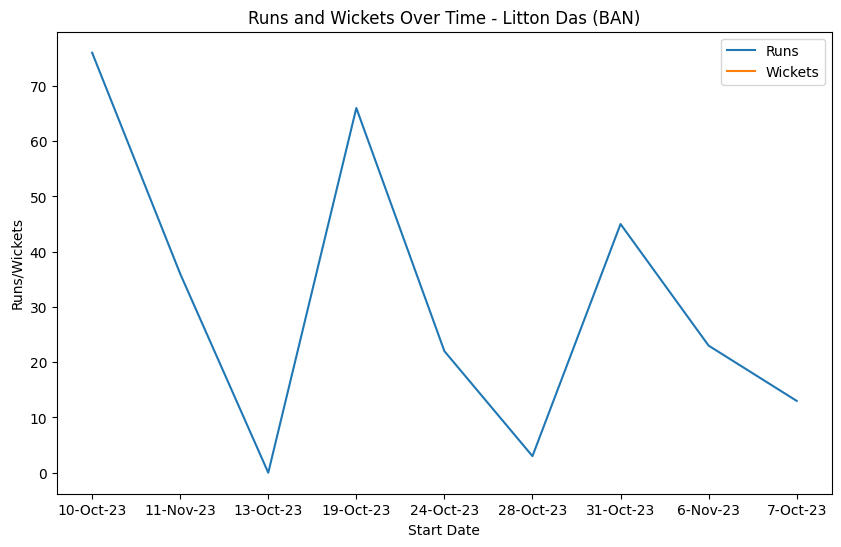

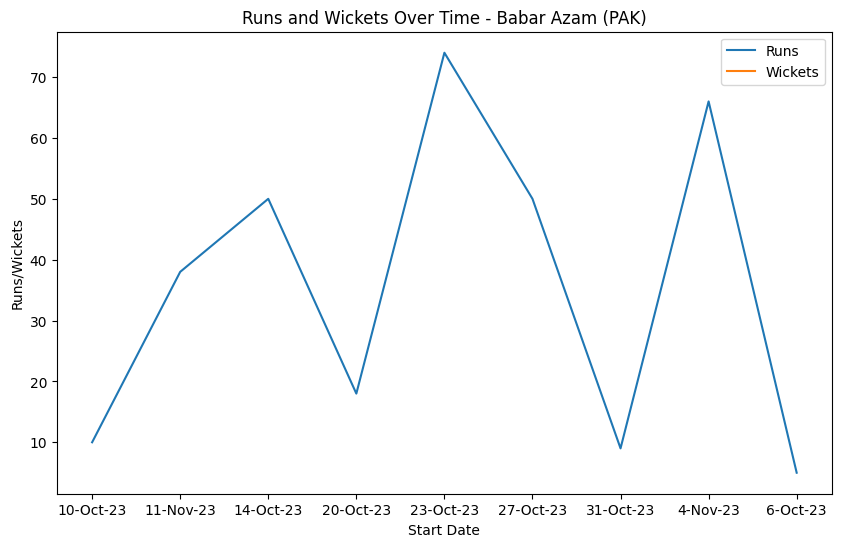

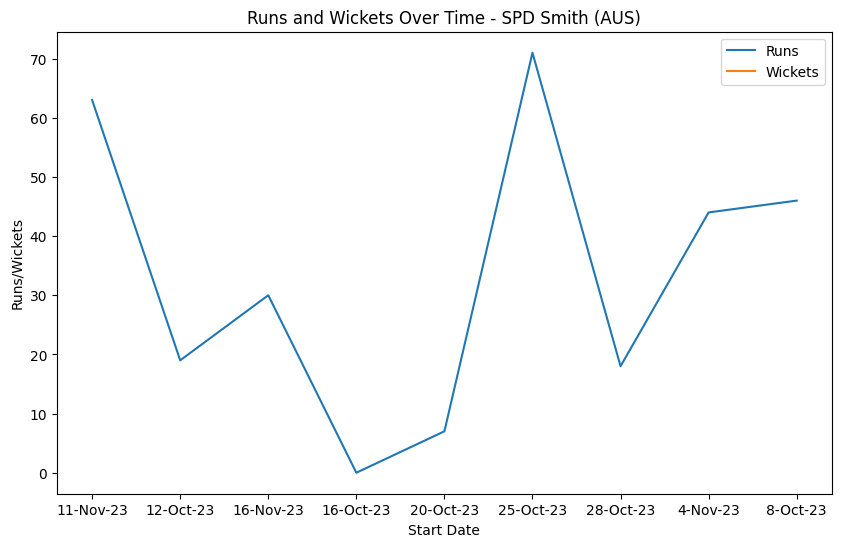

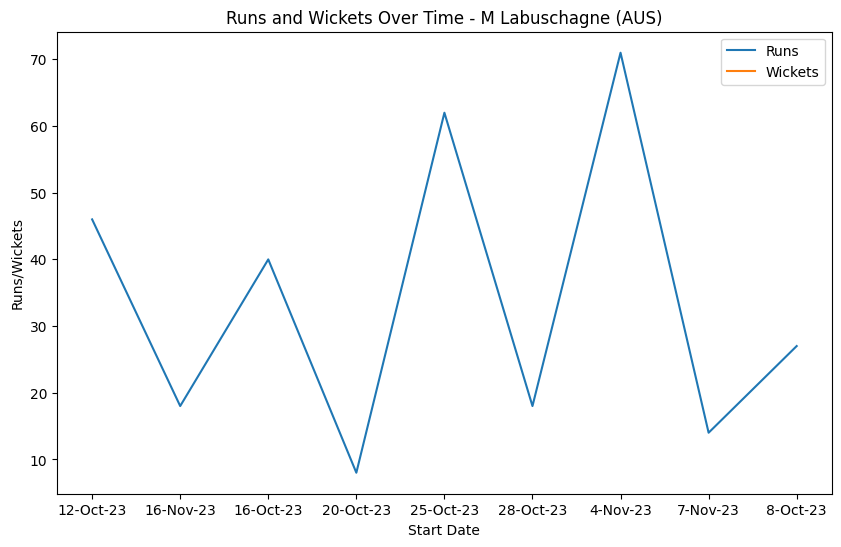

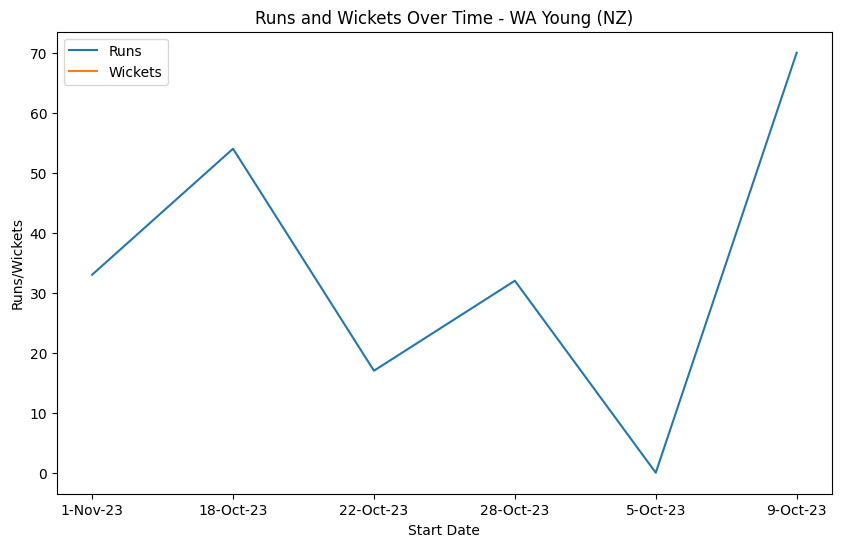

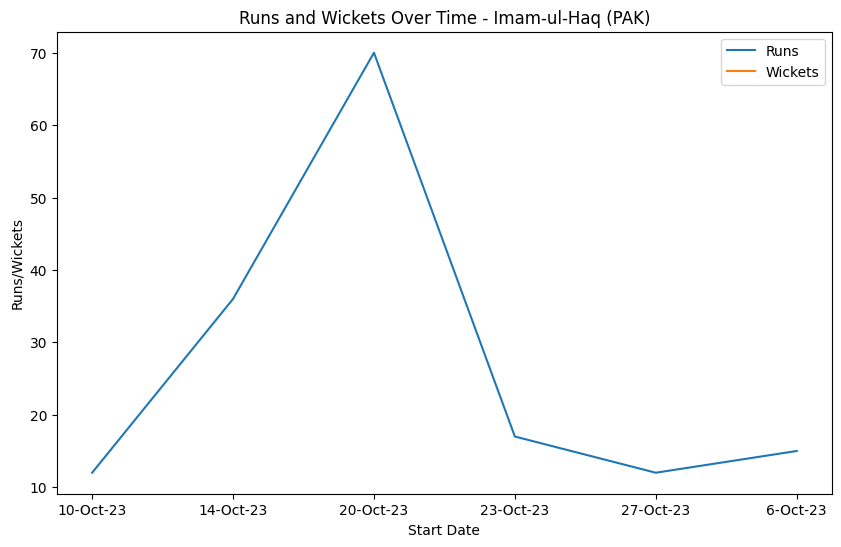

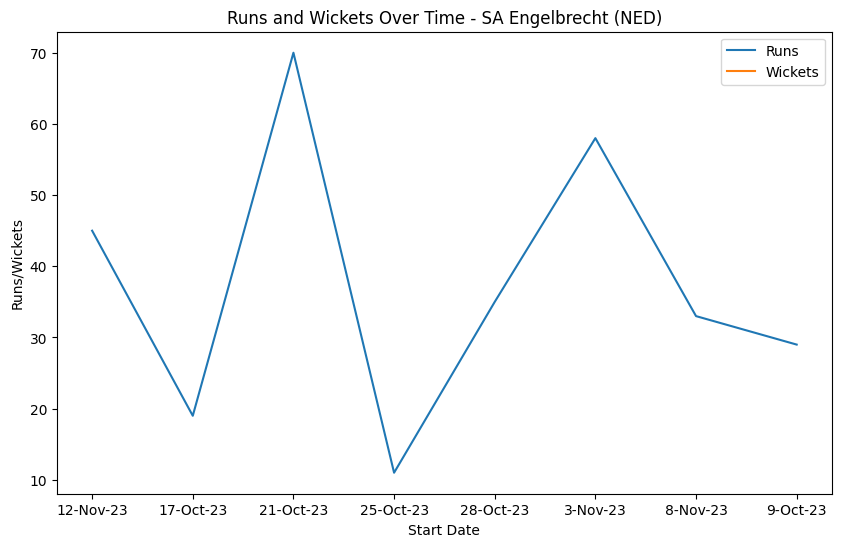

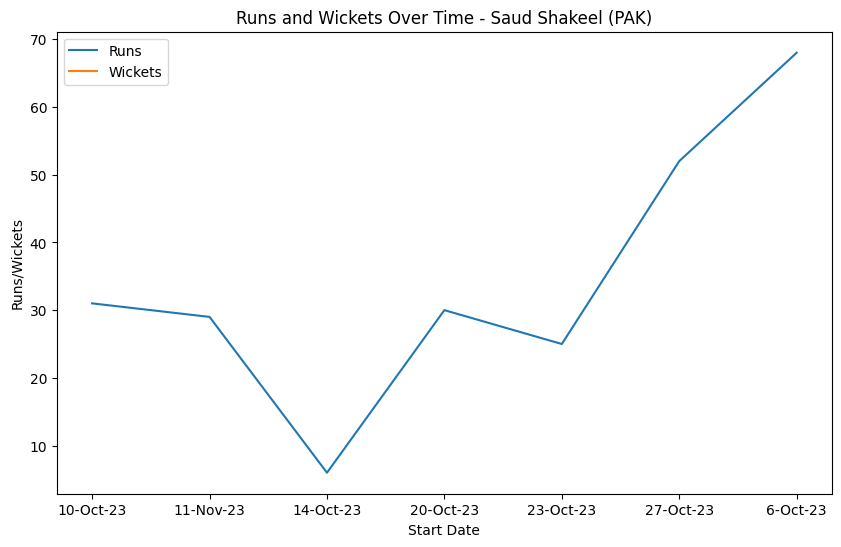

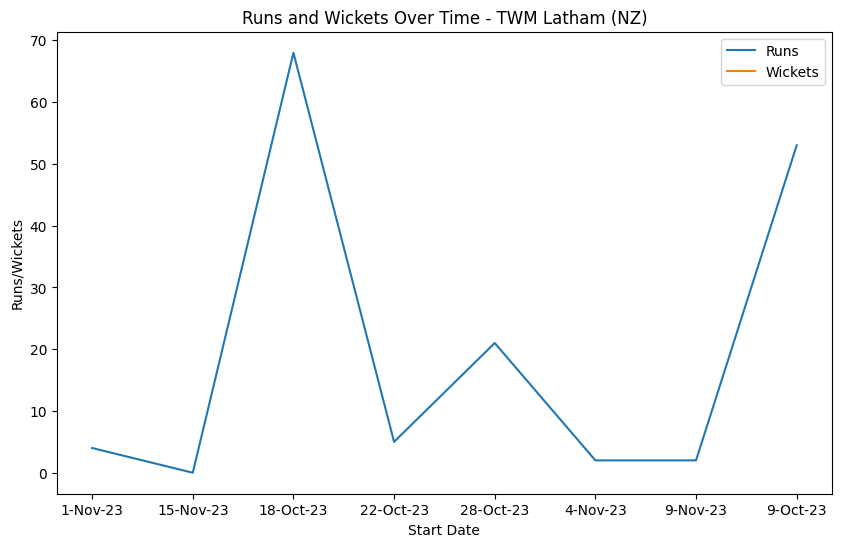

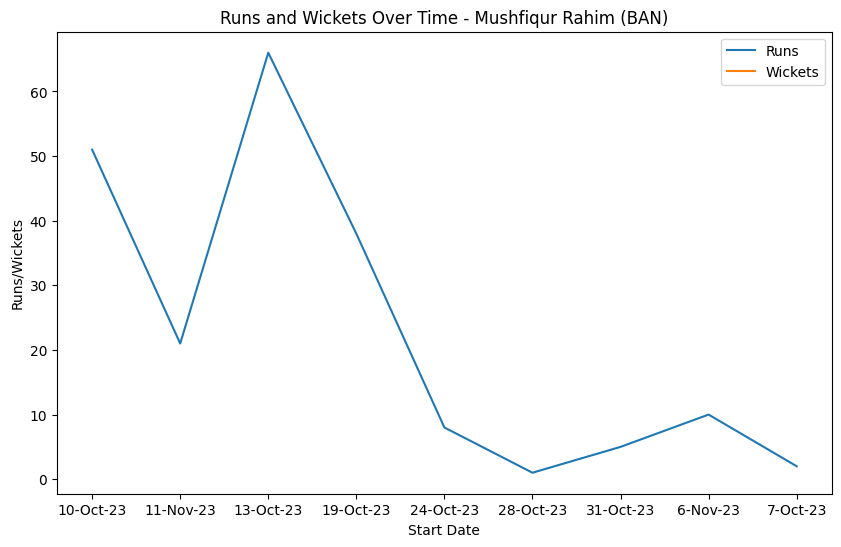

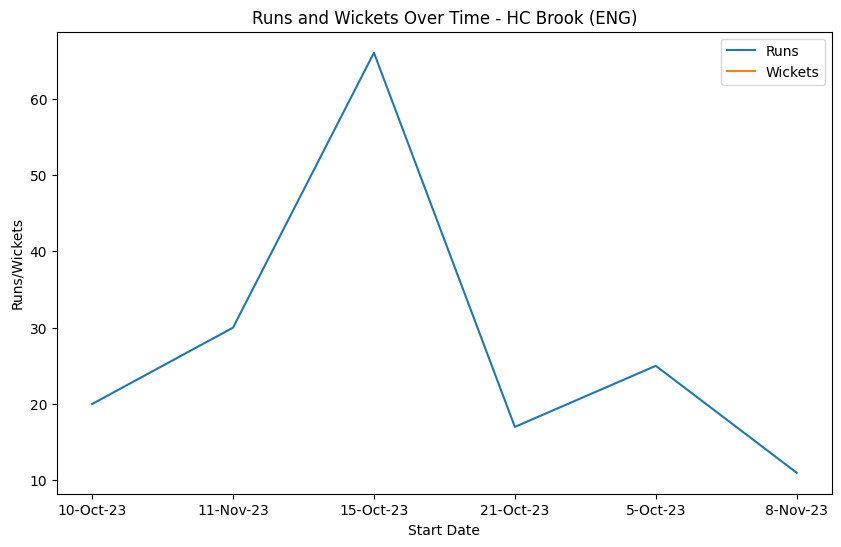

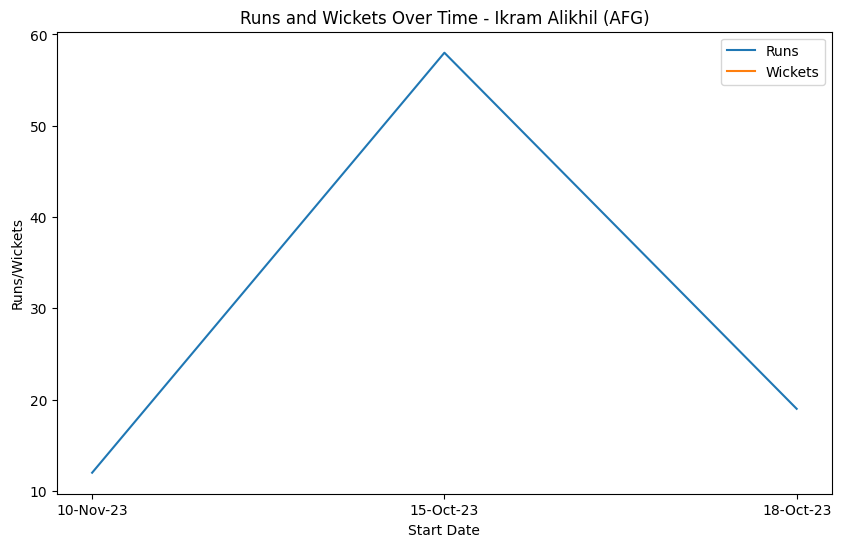

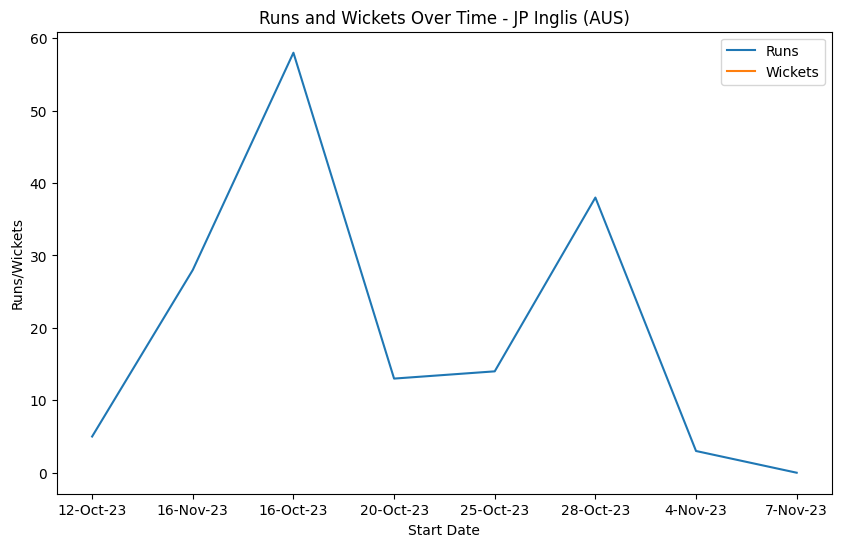

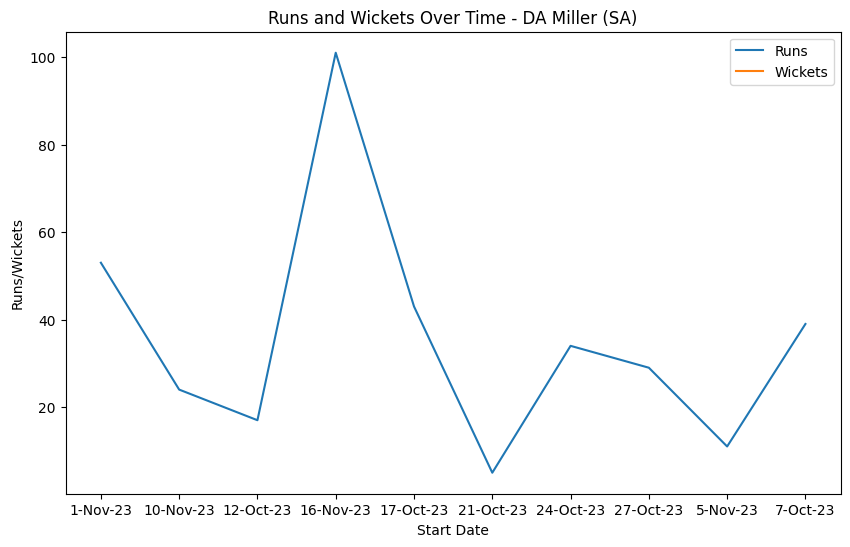

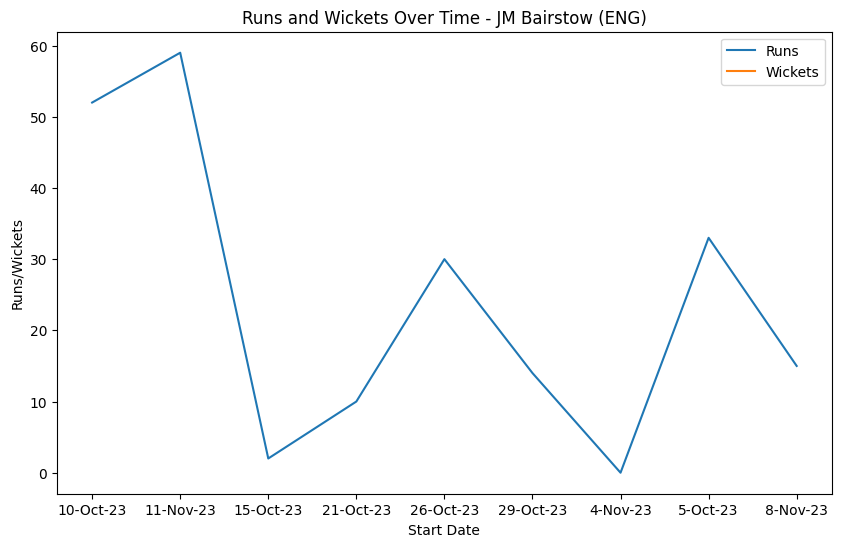

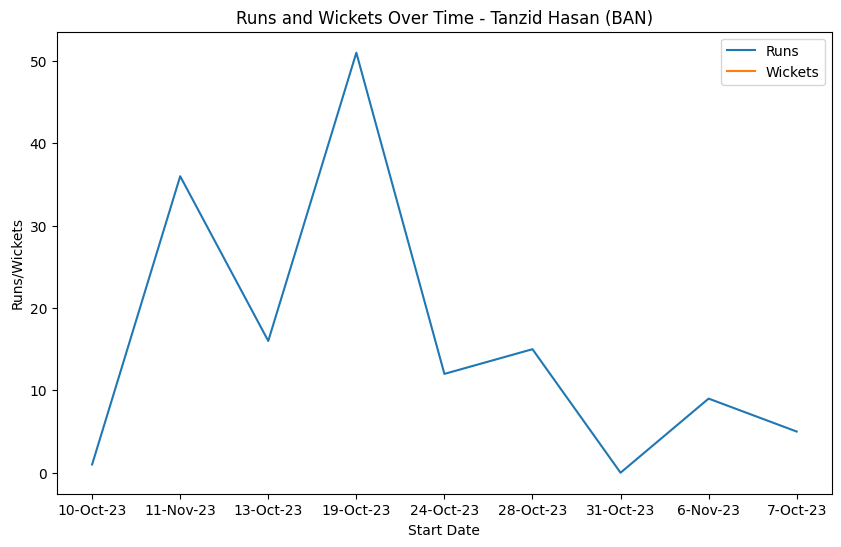

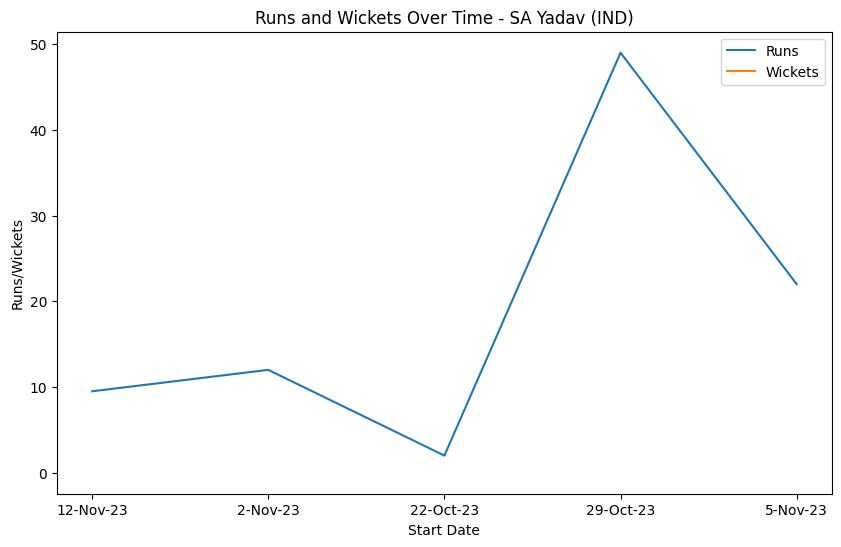

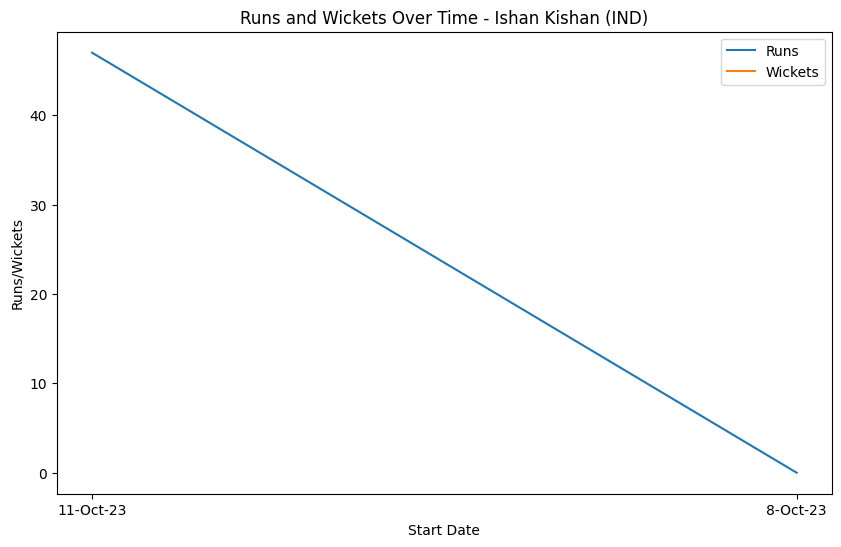

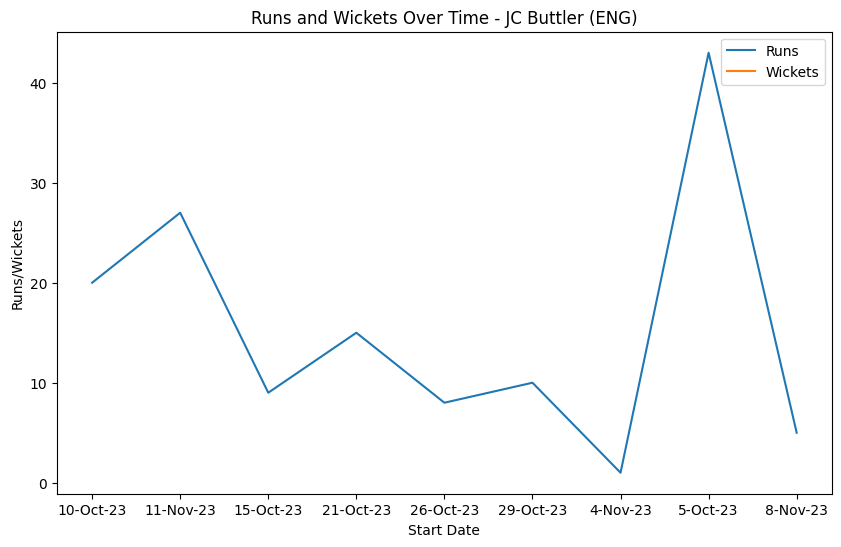

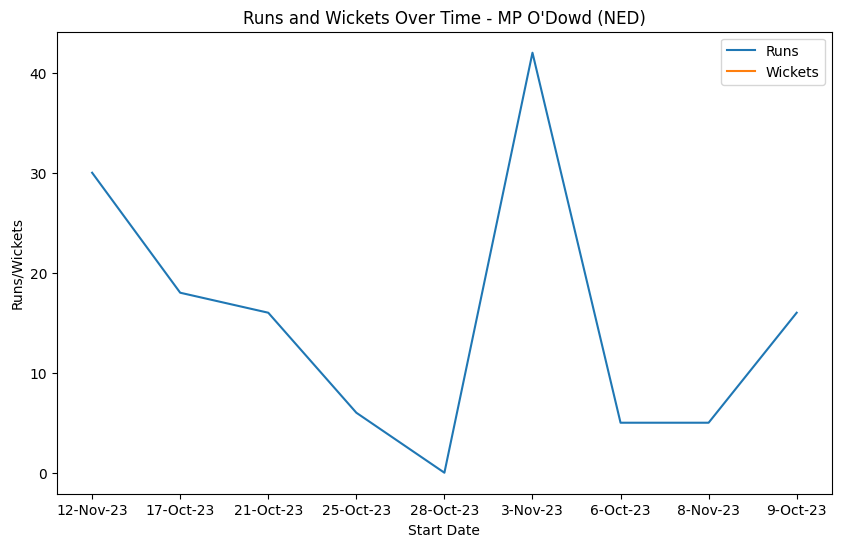

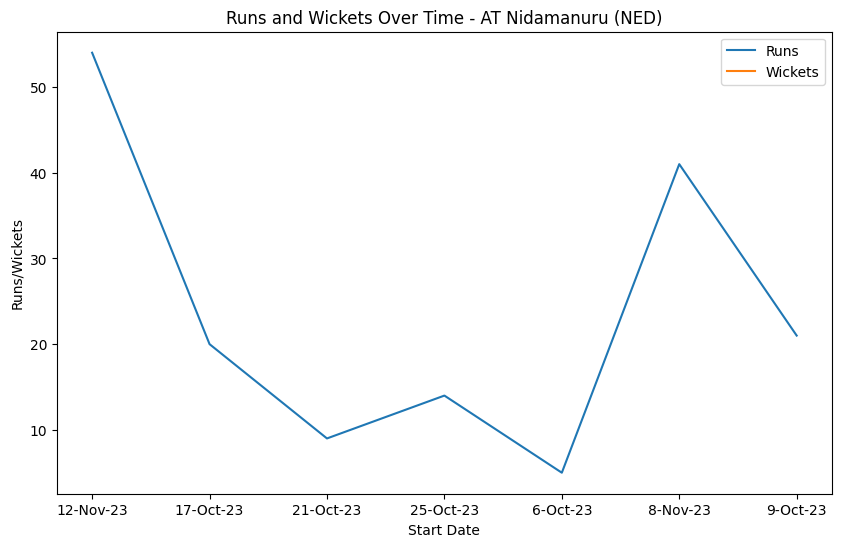

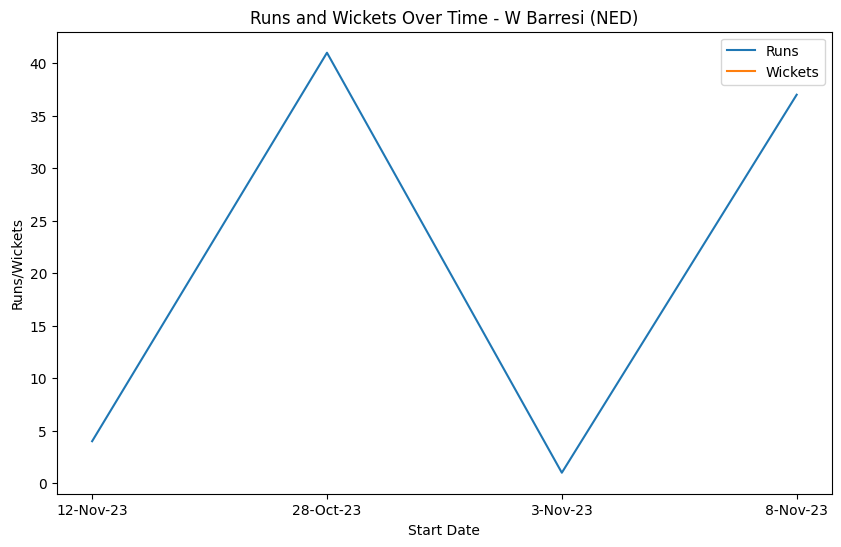

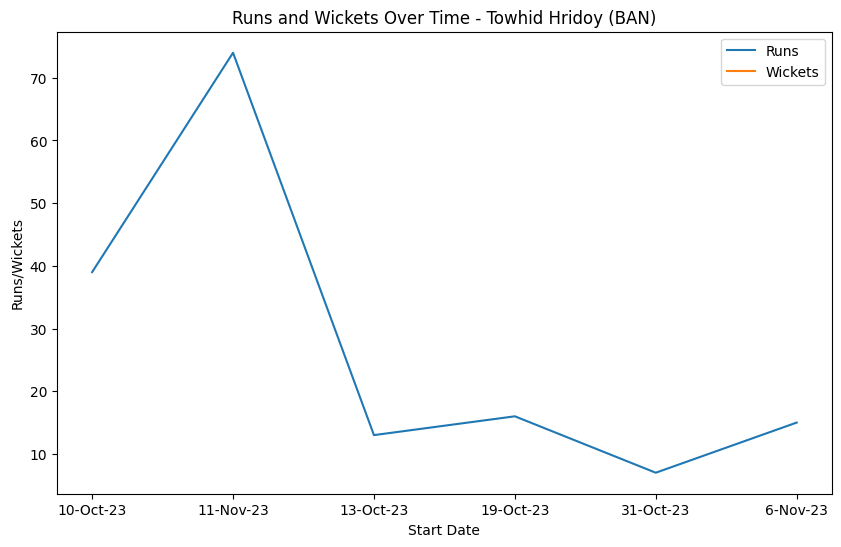

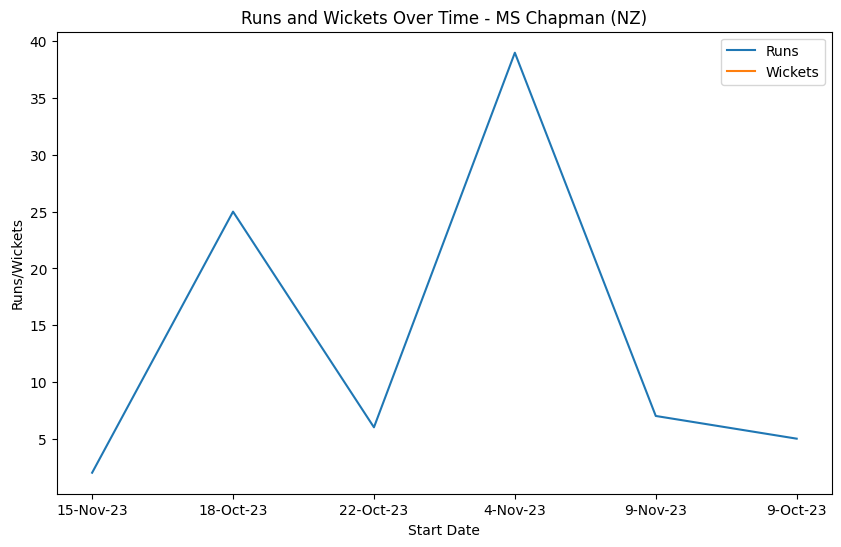

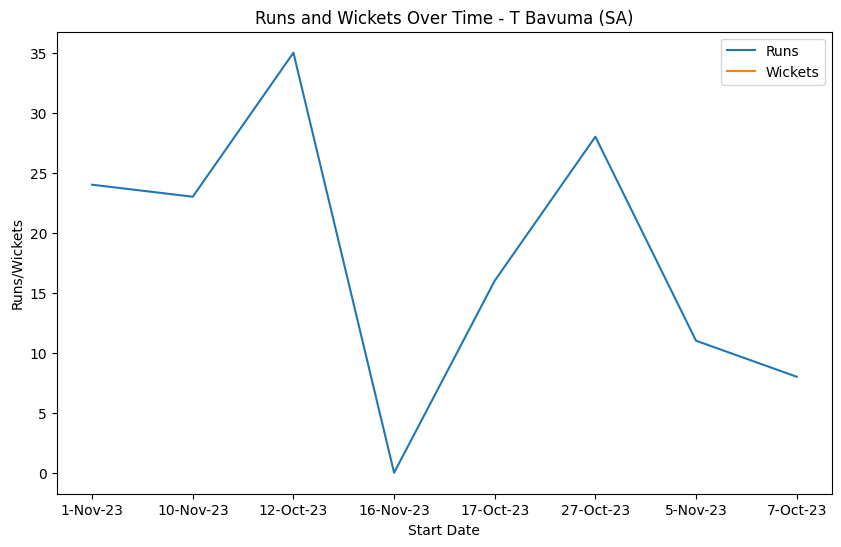

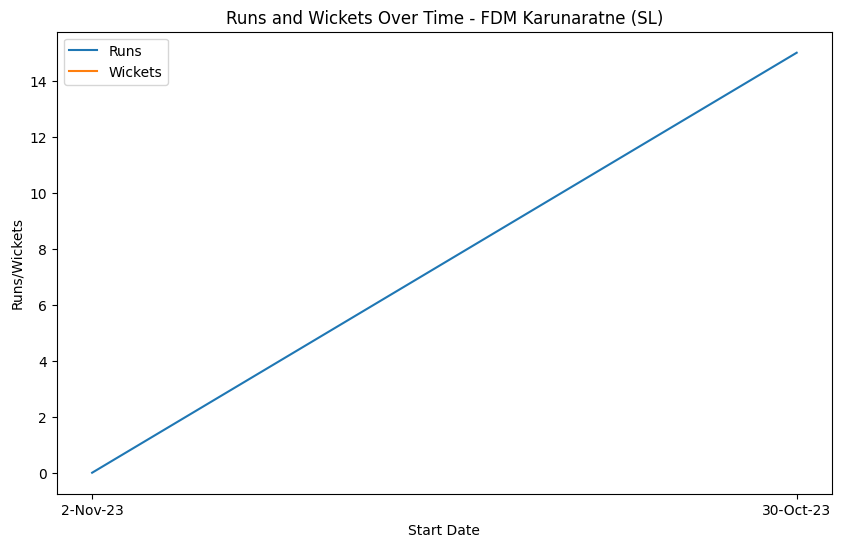

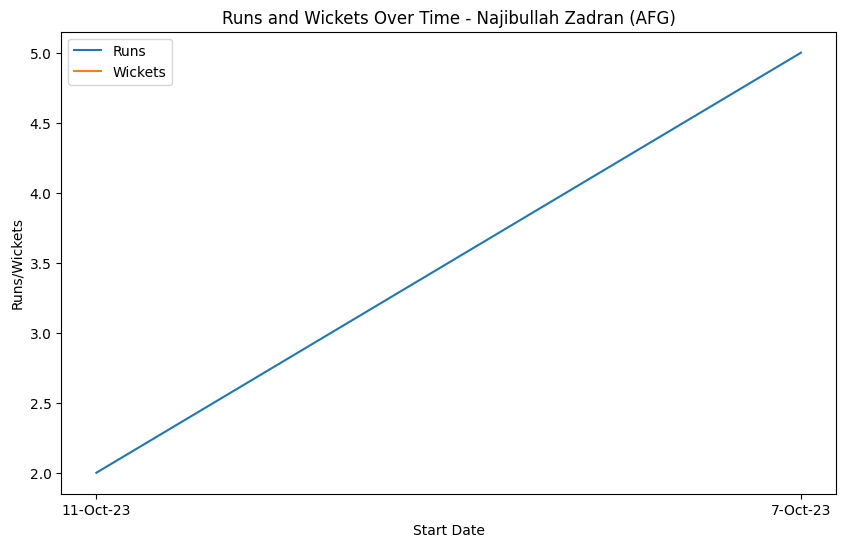

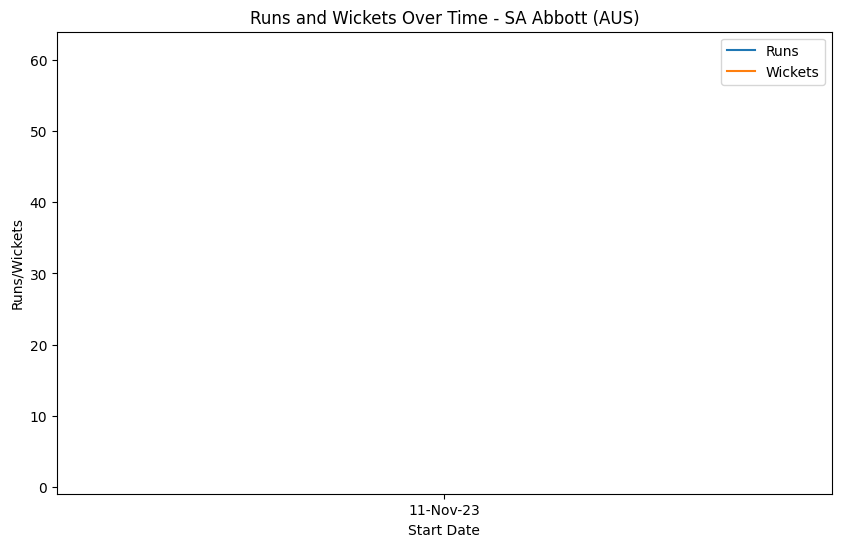

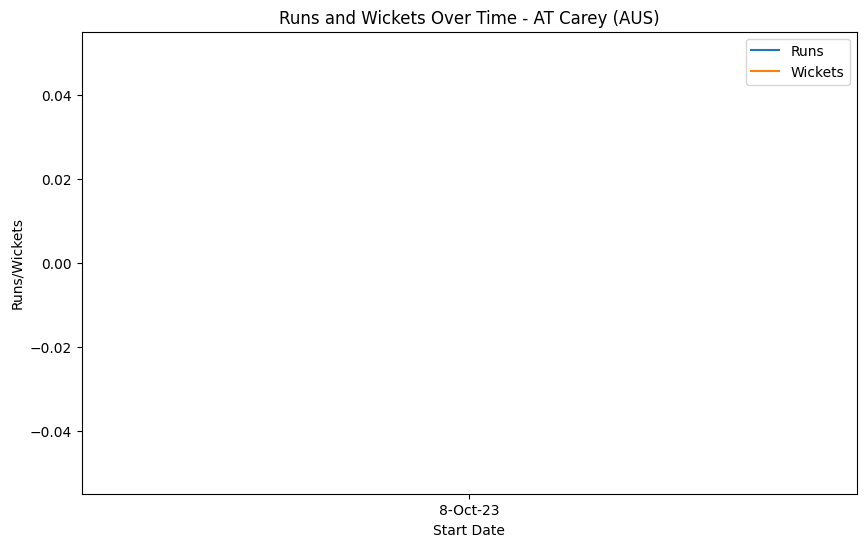

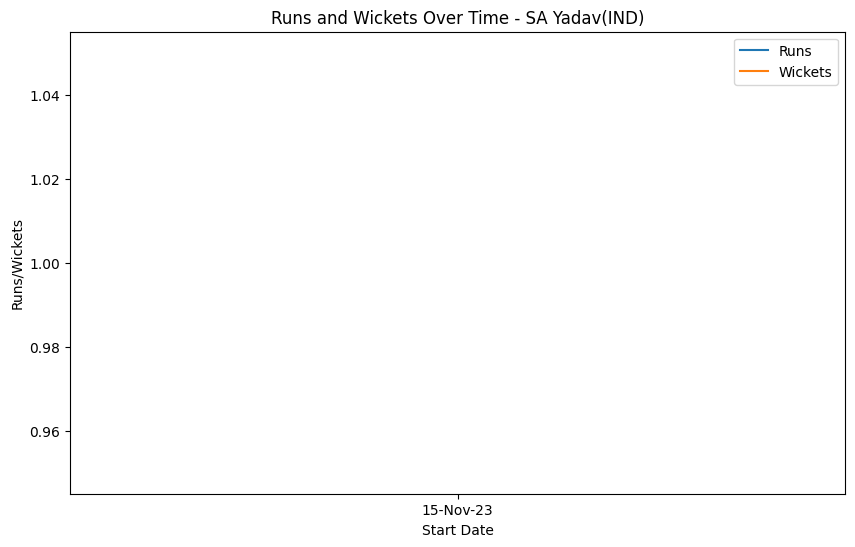

In [16]:
# Task 4: Temporal Analysis

import matplotlib.pyplot as plt

# Iterate over each unique team
for team_name in df['team'].unique():
    # Time Series for a Team
    team_timeseries = df[df['team'] == team_name].groupby('start_date').agg({
        'runs': 'mean',
        'wkts': 'mean'
    })

    # Plot time series data for the team
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(team_timeseries.index, team_timeseries['runs'], label='Runs')
    plt.plot(team_timeseries.index, team_timeseries['wkts'], label='Wickets')
    plt.xlabel('Start Date')
    plt.ylabel('Runs/Wickets')
    plt.title(f'Runs and Wickets Over Time - {team_name}')
    plt.legend()
    plt.show()

# Iterate over each unique player
for player_name in df['player'].unique():
    # Time Series for a Player
    player_timeseries = df[df['player'] == player_name].groupby('start_date').agg({
        'runs': 'mean',
        'wkts': 'mean'
    })

    # Plot time series data for the player
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(player_timeseries.index, player_timeseries['runs'], label='Runs')
    plt.plot(player_timeseries.index, player_timeseries['wkts'], label='Wickets')
    plt.xlabel('Start Date')
    plt.ylabel('Runs/Wickets')
    plt.title(f'Runs and Wickets Over Time - {player_name}')
    plt.legend()
    plt.show()